# Load the data, split into windows, and split into a list of speeches
## then pickle it

In [1]:
import importlib
import pickle as pkl
import matplotlib.pyplot as plt
import numpy as np
import ndd
import dill
import sparse
import sys
from pympler import asizeof

%load_ext autoreload
%autoreload 2


import load_data as ld
import add_metadata as am
import process_speeches as ps
import word_counting as wc
import context_distribs as cd
import display as d
import network_ops as no
import distances as dist

"""
importlib.reload(ld)
importlib.reload(ps)
importlib.reload(wc)
importlib.reload(cd)
importlib.reload(d)
importlib.reload(dist)
importlib.reload(no)
"""

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/victorvikram/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


'\nimportlib.reload(ld)\nimportlib.reload(ps)\nimportlib.reload(wc)\nimportlib.reload(cd)\nimportlib.reload(d)\nimportlib.reload(dist)\nimportlib.reload(no)\n'

# load data

In [2]:
data_dirs = ["/home/victorvikram/big-datasets/hein-bound", "/home/victorvikram/big-datasets/hein-daily"]
speeches = ld.read_hein_text_files_to_df(data_dirs, min_word_count=20) #, prob=0.05)
speeches.head()

['/home/victorvikram/big-datasets/hein-bound/speeches_043.txt', '/home/victorvikram/big-datasets/hein-bound/speeches_044.txt', '/home/victorvikram/big-datasets/hein-bound/speeches_045.txt', '/home/victorvikram/big-datasets/hein-bound/speeches_046.txt', '/home/victorvikram/big-datasets/hein-bound/speeches_047.txt', '/home/victorvikram/big-datasets/hein-bound/speeches_048.txt', '/home/victorvikram/big-datasets/hein-bound/speeches_049.txt', '/home/victorvikram/big-datasets/hein-bound/speeches_050.txt', '/home/victorvikram/big-datasets/hein-bound/speeches_051.txt', '/home/victorvikram/big-datasets/hein-bound/speeches_052.txt', '/home/victorvikram/big-datasets/hein-bound/speeches_053.txt', '/home/victorvikram/big-datasets/hein-bound/speeches_054.txt', '/home/victorvikram/big-datasets/hein-bound/speeches_055.txt', '/home/victorvikram/big-datasets/hein-bound/speeches_056.txt', '/home/victorvikram/big-datasets/hein-bound/speeches_057.txt', '/home/victorvikram/big-datasets/hein-bound/speeches_0

Skipping line 367: '|' expected after '"'
Skipping line 689: '|' expected after '"'
Skipping line 1196: '|' expected after '"'
Skipping line 1292: '|' expected after '"'
Skipping line 4193: '|' expected after '"'
Skipping line 5260: '|' expected after '"'
Skipping line 6787: '|' expected after '"'
Skipping line 7825: '|' expected after '"'
Skipping line 8852: '|' expected after '"'
Skipping line 8920: '|' expected after '"'
Skipping line 9629: '|' expected after '"'
Skipping line 10254: '|' expected after '"'
Skipping line 10291: '|' expected after '"'
Skipping line 10714: '|' expected after '"'
Skipping line 11558: '|' expected after '"'
Skipping line 12726: '|' expected after '"'
Skipping line 12903: '|' expected after '"'
Skipping line 13021: '|' expected after '"'
Skipping line 13045: '|' expected after '"'
Skipping line 13103: '|' expected after '"'
Skipping line 13180: '|' expected after '"'
Skipping line 13268: '|' expected after '"'
Skipping line 13418: '|' expected after '"'
S

/home/victorvikram/big-datasets/hein-bound/speeches_044.txt /home/victorvikram/big-datasets/hein-bound/044_SpeakerMap.txt /home/victorvikram/big-datasets/hein-bound/descr_044.txt


Skipping line 173: '|' expected after '"'
Skipping line 1328: '|' expected after '"'
Skipping line 3484: '|' expected after '"'
Skipping line 4045: '|' expected after '"'
Skipping line 4059: '|' expected after '"'
Skipping line 4544: '|' expected after '"'
Skipping line 4860: '|' expected after '"'
Skipping line 5200: '|' expected after '"'
Skipping line 5787: '|' expected after '"'
Skipping line 7089: '|' expected after '"'
Skipping line 7358: '|' expected after '"'
Skipping line 8147: '|' expected after '"'
Skipping line 8526: '|' expected after '"'
Skipping line 9210: '|' expected after '"'
Skipping line 9430: '|' expected after '"'
Skipping line 9432: '|' expected after '"'
Skipping line 11008: '|' expected after '"'
Skipping line 12991: '|' expected after '"'
Skipping line 13388: '|' expected after '"'
Skipping line 13759: '|' expected after '"'
Skipping line 17159: '|' expected after '"'
Skipping line 17464: '|' expected after '"'
Skipping line 17823: '|' expected after '"'
Skipp

/home/victorvikram/big-datasets/hein-bound/speeches_045.txt /home/victorvikram/big-datasets/hein-bound/045_SpeakerMap.txt /home/victorvikram/big-datasets/hein-bound/descr_045.txt


Skipping line 1688: '|' expected after '"'
Skipping line 2282: '|' expected after '"'
Skipping line 3524: '|' expected after '"'
Skipping line 5063: '|' expected after '"'
Skipping line 5171: '|' expected after '"'
Skipping line 5332: '|' expected after '"'
Skipping line 5821: '|' expected after '"'
Skipping line 7140: '|' expected after '"'
Skipping line 8730: '|' expected after '"'
Skipping line 8923: '|' expected after '"'
Skipping line 9167: '|' expected after '"'
Skipping line 9803: '|' expected after '"'
Skipping line 10519: '|' expected after '"'
Skipping line 12017: '|' expected after '"'
Skipping line 12091: '|' expected after '"'
Skipping line 14335: '|' expected after '"'
Skipping line 14336: '|' expected after '"'
Skipping line 14981: '|' expected after '"'
Skipping line 16040: '|' expected after '"'
Skipping line 16746: '|' expected after '"'
Skipping line 18242: '|' expected after '"'
Skipping line 18788: field larger than field limit (131072)
Skipping line 18986: '|' exp

/home/victorvikram/big-datasets/hein-bound/speeches_046.txt /home/victorvikram/big-datasets/hein-bound/046_SpeakerMap.txt /home/victorvikram/big-datasets/hein-bound/descr_046.txt


Skipping line 681: '|' expected after '"'
Skipping line 1001: '|' expected after '"'
Skipping line 2824: '|' expected after '"'
Skipping line 4303: '|' expected after '"'
Skipping line 6776: '|' expected after '"'
Skipping line 7363: '|' expected after '"'
Skipping line 8645: '|' expected after '"'
Skipping line 9103: '|' expected after '"'
Skipping line 12313: '|' expected after '"'
Skipping line 13441: '|' expected after '"'
Skipping line 13443: '|' expected after '"'
Skipping line 14432: '|' expected after '"'
Skipping line 14562: '|' expected after '"'
Skipping line 18152: '|' expected after '"'
Skipping line 18960: '|' expected after '"'
Skipping line 18974: '|' expected after '"'
Skipping line 18999: '|' expected after '"'
Skipping line 20639: '|' expected after '"'
Skipping line 21447: '|' expected after '"'
Skipping line 23678: '|' expected after '"'
Skipping line 23898: '|' expected after '"'
Skipping line 24185: '|' expected after '"'
Skipping line 25322: '|' expected after '

/home/victorvikram/big-datasets/hein-bound/speeches_047.txt /home/victorvikram/big-datasets/hein-bound/047_SpeakerMap.txt /home/victorvikram/big-datasets/hein-bound/descr_047.txt


Skipping line 755: '|' expected after '"'
Skipping line 922: '|' expected after '"'
Skipping line 1979: '|' expected after '"'
Skipping line 4587: '|' expected after '"'
Skipping line 5443: '|' expected after '"'
Skipping line 5463: '|' expected after '"'
Skipping line 5981: '|' expected after '"'
Skipping line 9221: '|' expected after '"'
Skipping line 10010: '|' expected after '"'
Skipping line 11750: '|' expected after '"'
Skipping line 11810: '|' expected after '"'
Skipping line 14767: '|' expected after '"'
Skipping line 14858: '|' expected after '"'
Skipping line 15722: '|' expected after '"'
Skipping line 16150: '|' expected after '"'
Skipping line 16456: '|' expected after '"'
Skipping line 17298: '|' expected after '"'
Skipping line 19507: '|' expected after '"'
Skipping line 21917: '|' expected after '"'
Skipping line 22407: '|' expected after '"'
Skipping line 22420: '|' expected after '"'
Skipping line 23601: '|' expected after '"'
Skipping line 24537: '|' expected after '"

/home/victorvikram/big-datasets/hein-bound/speeches_048.txt /home/victorvikram/big-datasets/hein-bound/048_SpeakerMap.txt /home/victorvikram/big-datasets/hein-bound/descr_048.txt


Skipping line 1648: '|' expected after '"'
Skipping line 1750: '|' expected after '"'
Skipping line 2220: '|' expected after '"'
Skipping line 2805: '|' expected after '"'
Skipping line 4041: '|' expected after '"'
Skipping line 4194: '|' expected after '"'
Skipping line 5093: field larger than field limit (131072)
Skipping line 5314: '|' expected after '"'
Skipping line 6686: '|' expected after '"'
Skipping line 8505: '|' expected after '"'
Skipping line 9089: '|' expected after '"'
Skipping line 9295: '|' expected after '"'
Skipping line 9668: '|' expected after '"'
Skipping line 10329: '|' expected after '"'
Skipping line 10407: '|' expected after '"'
Skipping line 11223: '|' expected after '"'
Skipping line 14081: '|' expected after '"'
Skipping line 14594: '|' expected after '"'
Skipping line 14833: '|' expected after '"'
Skipping line 16340: '|' expected after '"'
Skipping line 16715: '|' expected after '"'
Skipping line 17061: '|' expected after '"'
Skipping line 17205: '|' expe

Skipping line 26976: Expected 2 fields in line 26976, saw 3
Skipping line 28489: Expected 2 fields in line 28489, saw 3
Skipping line 35835: Expected 2 fields in line 35835, saw 3
Skipping line 45069: Expected 2 fields in line 45069, saw 3
Skipping line 121275: Expected 2 fields in line 121275, saw 5
Skipping line 131306: Expected 2 fields in line 131306, saw 3


/home/victorvikram/big-datasets/hein-bound/speeches_049.txt /home/victorvikram/big-datasets/hein-bound/049_SpeakerMap.txt /home/victorvikram/big-datasets/hein-bound/descr_049.txt


Skipping line 661: '|' expected after '"'
Skipping line 1461: '|' expected after '"'
Skipping line 1574: '|' expected after '"'
Skipping line 2068: '|' expected after '"'
Skipping line 2292: '|' expected after '"'
Skipping line 2318: '|' expected after '"'
Skipping line 2367: '|' expected after '"'
Skipping line 2494: '|' expected after '"'
Skipping line 2564: '|' expected after '"'
Skipping line 4205: '|' expected after '"'
Skipping line 4626: '|' expected after '"'
Skipping line 5125: '|' expected after '"'
Skipping line 5510: '|' expected after '"'
Skipping line 6102: '|' expected after '"'
Skipping line 6166: '|' expected after '"'
Skipping line 7103: '|' expected after '"'
Skipping line 7712: '|' expected after '"'
Skipping line 11209: '|' expected after '"'
Skipping line 11229: '|' expected after '"'
Skipping line 11790: '|' expected after '"'
Skipping line 12744: '|' expected after '"'
Skipping line 14213: '|' expected after '"'
Skipping line 14401: '|' expected after '"'
Skippi

/home/victorvikram/big-datasets/hein-bound/speeches_050.txt /home/victorvikram/big-datasets/hein-bound/050_SpeakerMap.txt /home/victorvikram/big-datasets/hein-bound/descr_050.txt


Skipping line 191: '|' expected after '"'
Skipping line 483: '|' expected after '"'
Skipping line 2924: '|' expected after '"'
Skipping line 5499: '|' expected after '"'
Skipping line 6087: '|' expected after '"'
Skipping line 6972: '|' expected after '"'
Skipping line 7438: '|' expected after '"'
Skipping line 7873: '|' expected after '"'
Skipping line 8276: '|' expected after '"'
Skipping line 9528: '|' expected after '"'
Skipping line 13053: '|' expected after '"'
Skipping line 14150: '|' expected after '"'
Skipping line 14273: '|' expected after '"'
Skipping line 15439: '|' expected after '"'
Skipping line 15614: '|' expected after '"'
Skipping line 18301: '|' expected after '"'
Skipping line 18506: '|' expected after '"'
Skipping line 18693: '|' expected after '"'
Skipping line 23091: '|' expected after '"'
Skipping line 23973: '|' expected after '"'
Skipping line 25354: '|' expected after '"'
Skipping line 25496: '|' expected after '"'
Skipping line 26674: '|' expected after '"'


/home/victorvikram/big-datasets/hein-bound/speeches_051.txt /home/victorvikram/big-datasets/hein-bound/051_SpeakerMap.txt /home/victorvikram/big-datasets/hein-bound/descr_051.txt


Skipping line 278: '|' expected after '"'
Skipping line 2383: field larger than field limit (131072)
Skipping line 3323: '|' expected after '"'
Skipping line 4685: '|' expected after '"'
Skipping line 4905: '|' expected after '"'
Skipping line 7980: '|' expected after '"'
Skipping line 8045: '|' expected after '"'
Skipping line 10224: '|' expected after '"'
Skipping line 10995: '|' expected after '"'
Skipping line 11519: '|' expected after '"'
Skipping line 11864: '|' expected after '"'
Skipping line 12630: '|' expected after '"'
Skipping line 14348: '|' expected after '"'
Skipping line 15564: '|' expected after '"'
Skipping line 15572: '|' expected after '"'
Skipping line 19320: '|' expected after '"'
Skipping line 21398: '|' expected after '"'
Skipping line 22231: '|' expected after '"'
Skipping line 26501: '|' expected after '"'
Skipping line 27503: '|' expected after '"'
Skipping line 27781: '|' expected after '"'
Skipping line 27882: '|' expected after '"'
Skipping line 36446: '|'

Skipping line 211390: '|' expected after '"'
Skipping line 212105: '|' expected after '"'
Skipping line 212680: '|' expected after '"'
Skipping line 215015: '|' expected after '"'
Skipping line 215292: '|' expected after '"'
Skipping line 215413: '|' expected after '"'
Skipping line 215464: '|' expected after '"'
Skipping line 216867: '|' expected after '"'
Skipping line 217830: '|' expected after '"'
Skipping line 219720: '|' expected after '"'
Skipping line 220256: '|' expected after '"'
Skipping line 221248: '|' expected after '"'
Skipping line 223961: '|' expected after '"'
Skipping line 4906: Expected 2 fields in line 4906, saw 3
Skipping line 6058: Expected 2 fields in line 6058, saw 3
Skipping line 19411: Expected 2 fields in line 19411, saw 3
Skipping line 21591: Expected 2 fields in line 21591, saw 3
Skipping line 55124: Expected 2 fields in line 55124, saw 4
Skipping line 56530: Expected 2 fields in line 56530, saw 3
Skipping line 59466: Expected 2 fields in line 59466, saw 3

/home/victorvikram/big-datasets/hein-bound/speeches_052.txt /home/victorvikram/big-datasets/hein-bound/052_SpeakerMap.txt /home/victorvikram/big-datasets/hein-bound/descr_052.txt


Skipping line 1359: '|' expected after '"'
Skipping line 1616: '|' expected after '"'
Skipping line 1622: '|' expected after '"'
Skipping line 3630: '|' expected after '"'
Skipping line 8821: '|' expected after '"'
Skipping line 11445: '|' expected after '"'
Skipping line 11631: '|' expected after '"'
Skipping line 11661: '|' expected after '"'
Skipping line 11718: '|' expected after '"'
Skipping line 11721: '|' expected after '"'
Skipping line 11725: '|' expected after '"'
Skipping line 14137: '|' expected after '"'
Skipping line 14422: '|' expected after '"'
Skipping line 14776: '|' expected after '"'
Skipping line 14845: '|' expected after '"'
Skipping line 15614: '|' expected after '"'
Skipping line 16180: '|' expected after '"'
Skipping line 17346: '|' expected after '"'
Skipping line 21786: '|' expected after '"'
Skipping line 21894: '|' expected after '"'
Skipping line 23917: '|' expected after '"'
Skipping line 24728: '|' expected after '"'
Skipping line 25814: '|' expected aft

/home/victorvikram/big-datasets/hein-bound/speeches_053.txt /home/victorvikram/big-datasets/hein-bound/053_SpeakerMap.txt /home/victorvikram/big-datasets/hein-bound/descr_053.txt


Skipping line 269: '|' expected after '"'
Skipping line 777: '|' expected after '"'
Skipping line 1025: '|' expected after '"'
Skipping line 1375: '|' expected after '"'
Skipping line 3137: '|' expected after '"'
Skipping line 7317: '|' expected after '"'
Skipping line 8440: '|' expected after '"'
Skipping line 9456: '|' expected after '"'
Skipping line 10526: '|' expected after '"'
Skipping line 12755: '|' expected after '"'
Skipping line 14512: '|' expected after '"'
Skipping line 15306: '|' expected after '"'
Skipping line 19088: '|' expected after '"'
Skipping line 19622: '|' expected after '"'
Skipping line 20320: '|' expected after '"'
Skipping line 20379: '|' expected after '"'
Skipping line 20518: '|' expected after '"'
Skipping line 20584: '|' expected after '"'
Skipping line 21570: '|' expected after '"'
Skipping line 22391: '|' expected after '"'
Skipping line 24748: '|' expected after '"'
Skipping line 25158: '|' expected after '"'
Skipping line 26322: '|' expected after '"

Skipping line 206422: '|' expected after '"'
Skipping line 207564: '|' expected after '"'
Skipping line 210558: '|' expected after '"'
Skipping line 210570: '|' expected after '"'
Skipping line 214364: '|' expected after '"'
Skipping line 214384: '|' expected after '"'
Skipping line 215085: '|' expected after '"'
Skipping line 215274: '|' expected after '"'
Skipping line 216442: '|' expected after '"'
Skipping line 217942: '|' expected after '"'
Skipping line 221188: '|' expected after '"'
Skipping line 224287: '|' expected after '"'
Skipping line 224653: '|' expected after '"'
Skipping line 226217: '|' expected after '"'
Skipping line 6674: Expected 2 fields in line 6674, saw 3
Skipping line 43325: Expected 2 fields in line 43325, saw 3
Skipping line 85115: Expected 2 fields in line 85115, saw 3
Skipping line 87722: Expected 2 fields in line 87722, saw 3
Skipping line 91041: Expected 2 fields in line 91041, saw 3
Skipping line 104931: Expected 2 fields in line 104931, saw 3
Skipping l

/home/victorvikram/big-datasets/hein-bound/speeches_054.txt /home/victorvikram/big-datasets/hein-bound/054_SpeakerMap.txt /home/victorvikram/big-datasets/hein-bound/descr_054.txt


Skipping line 541: '|' expected after '"'
Skipping line 749: '|' expected after '"'
Skipping line 1375: '|' expected after '"'
Skipping line 1387: '|' expected after '"'
Skipping line 1598: '|' expected after '"'
Skipping line 2481: '|' expected after '"'
Skipping line 2482: '|' expected after '"'
Skipping line 4640: '|' expected after '"'
Skipping line 4641: '|' expected after '"'
Skipping line 5139: '|' expected after '"'
Skipping line 5140: '|' expected after '"'
Skipping line 5275: '|' expected after '"'
Skipping line 5658: '|' expected after '"'
Skipping line 5686: '|' expected after '"'
Skipping line 9341: '|' expected after '"'
Skipping line 12007: '|' expected after '"'
Skipping line 12267: '|' expected after '"'
Skipping line 12280: '|' expected after '"'
Skipping line 13460: '|' expected after '"'
Skipping line 17650: '|' expected after '"'
Skipping line 17764: '|' expected after '"'
Skipping line 19844: '|' expected after '"'
Skipping line 20387: '|' expected after '"'
Skipp

/home/victorvikram/big-datasets/hein-bound/speeches_055.txt /home/victorvikram/big-datasets/hein-bound/055_SpeakerMap.txt /home/victorvikram/big-datasets/hein-bound/descr_055.txt


Skipping line 279: '|' expected after '"'
Skipping line 284: '|' expected after '"'
Skipping line 869: '|' expected after '"'
Skipping line 1245: '|' expected after '"'
Skipping line 2525: '|' expected after '"'
Skipping line 5473: '|' expected after '"'
Skipping line 6018: '|' expected after '"'
Skipping line 6424: '|' expected after '"'
Skipping line 7033: '|' expected after '"'
Skipping line 7606: '|' expected after '"'
Skipping line 8385: '|' expected after '"'
Skipping line 10206: '|' expected after '"'
Skipping line 10518: '|' expected after '"'
Skipping line 13357: '|' expected after '"'
Skipping line 16418: '|' expected after '"'
Skipping line 16946: '|' expected after '"'
Skipping line 17156: '|' expected after '"'
Skipping line 17354: '|' expected after '"'
Skipping line 17374: '|' expected after '"'
Skipping line 18990: '|' expected after '"'
Skipping line 22530: '|' expected after '"'
Skipping line 22877: '|' expected after '"'
Skipping line 24184: '|' expected after '"'
Sk

/home/victorvikram/big-datasets/hein-bound/speeches_056.txt /home/victorvikram/big-datasets/hein-bound/056_SpeakerMap.txt /home/victorvikram/big-datasets/hein-bound/descr_056.txt


Skipping line 1875: '|' expected after '"'
Skipping line 3271: '|' expected after '"'
Skipping line 4738: '|' expected after '"'
Skipping line 5216: '|' expected after '"'
Skipping line 5401: '|' expected after '"'
Skipping line 7505: '|' expected after '"'
Skipping line 9289: '|' expected after '"'
Skipping line 10727: '|' expected after '"'
Skipping line 11916: '|' expected after '"'
Skipping line 14368: '|' expected after '"'
Skipping line 14940: '|' expected after '"'
Skipping line 18052: '|' expected after '"'
Skipping line 18367: '|' expected after '"'
Skipping line 18428: '|' expected after '"'
Skipping line 19031: '|' expected after '"'
Skipping line 19854: '|' expected after '"'
Skipping line 20088: '|' expected after '"'
Skipping line 21720: '|' expected after '"'
Skipping line 23700: '|' expected after '"'
Skipping line 23988: '|' expected after '"'
Skipping line 24693: '|' expected after '"'
Skipping line 25018: '|' expected after '"'
Skipping line 25333: '|' expected after

/home/victorvikram/big-datasets/hein-bound/speeches_057.txt /home/victorvikram/big-datasets/hein-bound/057_SpeakerMap.txt /home/victorvikram/big-datasets/hein-bound/descr_057.txt


Skipping line 318: '|' expected after '"'
Skipping line 1231: '|' expected after '"'
Skipping line 1345: '|' expected after '"'
Skipping line 1650: '|' expected after '"'
Skipping line 1986: '|' expected after '"'
Skipping line 2052: '|' expected after '"'
Skipping line 2336: '|' expected after '"'
Skipping line 4388: '|' expected after '"'
Skipping line 4584: '|' expected after '"'
Skipping line 6167: '|' expected after '"'
Skipping line 8515: '|' expected after '"'
Skipping line 11359: '|' expected after '"'
Skipping line 11823: '|' expected after '"'
Skipping line 13012: '|' expected after '"'
Skipping line 13652: '|' expected after '"'
Skipping line 16795: '|' expected after '"'
Skipping line 16796: '|' expected after '"'
Skipping line 17173: '|' expected after '"'
Skipping line 17686: '|' expected after '"'
Skipping line 19743: '|' expected after '"'
Skipping line 21914: '|' expected after '"'
Skipping line 24045: '|' expected after '"'
Skipping line 24245: '|' expected after '"'


/home/victorvikram/big-datasets/hein-bound/speeches_058.txt /home/victorvikram/big-datasets/hein-bound/058_SpeakerMap.txt /home/victorvikram/big-datasets/hein-bound/descr_058.txt


Skipping line 268: '|' expected after '"'
Skipping line 2390: '|' expected after '"'
Skipping line 2394: '|' expected after '"'
Skipping line 4999: '|' expected after '"'
Skipping line 5071: '|' expected after '"'
Skipping line 5410: '|' expected after '"'
Skipping line 5613: '|' expected after '"'
Skipping line 5662: '|' expected after '"'
Skipping line 6134: '|' expected after '"'
Skipping line 6915: '|' expected after '"'
Skipping line 6956: '|' expected after '"'
Skipping line 7469: '|' expected after '"'
Skipping line 8521: '|' expected after '"'
Skipping line 10997: '|' expected after '"'
Skipping line 12680: '|' expected after '"'
Skipping line 13042: '|' expected after '"'
Skipping line 15124: '|' expected after '"'
Skipping line 17048: '|' expected after '"'
Skipping line 17322: '|' expected after '"'
Skipping line 17387: '|' expected after '"'
Skipping line 17417: '|' expected after '"'
Skipping line 20270: '|' expected after '"'
Skipping line 20337: '|' expected after '"'
Sk

/home/victorvikram/big-datasets/hein-bound/speeches_059.txt /home/victorvikram/big-datasets/hein-bound/059_SpeakerMap.txt /home/victorvikram/big-datasets/hein-bound/descr_059.txt


Skipping line 1262: '|' expected after '"'
Skipping line 1273: '|' expected after '"'
Skipping line 2128: '|' expected after '"'
Skipping line 2687: '|' expected after '"'
Skipping line 2971: '|' expected after '"'
Skipping line 2993: '|' expected after '"'
Skipping line 3549: '|' expected after '"'
Skipping line 4477: '|' expected after '"'
Skipping line 4479: '|' expected after '"'
Skipping line 4802: '|' expected after '"'
Skipping line 5908: '|' expected after '"'
Skipping line 5950: '|' expected after '"'
Skipping line 6857: '|' expected after '"'
Skipping line 8329: '|' expected after '"'
Skipping line 8823: '|' expected after '"'
Skipping line 8844: '|' expected after '"'
Skipping line 9704: '|' expected after '"'
Skipping line 9724: '|' expected after '"'
Skipping line 9725: '|' expected after '"'
Skipping line 9803: '|' expected after '"'
Skipping line 9828: '|' expected after '"'
Skipping line 9893: '|' expected after '"'
Skipping line 11862: '|' expected after '"'
Skipping l

Skipping line 179815: '|' expected after '"'
Skipping line 181181: '|' expected after '"'
Skipping line 181907: '|' expected after '"'
Skipping line 182357: '|' expected after '"'
Skipping line 31459: Expected 2 fields in line 31459, saw 3
Skipping line 60460: Expected 2 fields in line 60460, saw 3
Skipping line 140060: Expected 2 fields in line 140060, saw 3
Skipping line 140773: Expected 2 fields in line 140773, saw 3
Skipping line 140910: Expected 2 fields in line 140910, saw 4
Skipping line 142650: Expected 2 fields in line 142650, saw 4
Skipping line 151140: Expected 2 fields in line 151140, saw 5
Skipping line 152540: Expected 2 fields in line 152540, saw 3
Skipping line 161526: Expected 2 fields in line 161526, saw 3
Skipping line 163004: Expected 2 fields in line 163004, saw 4
Skipping line 163055: Expected 2 fields in line 163055, saw 3
Skipping line 165568: Expected 2 fields in line 165568, saw 3
Skipping line 165603: Expected 2 fields in line 165603, saw 3
Skipping line 1656

/home/victorvikram/big-datasets/hein-bound/speeches_060.txt /home/victorvikram/big-datasets/hein-bound/060_SpeakerMap.txt /home/victorvikram/big-datasets/hein-bound/descr_060.txt


Skipping line 2097: '|' expected after '"'
Skipping line 2185: '|' expected after '"'
Skipping line 4302: '|' expected after '"'
Skipping line 5337: '|' expected after '"'
Skipping line 6776: '|' expected after '"'
Skipping line 6848: '|' expected after '"'
Skipping line 7802: '|' expected after '"'
Skipping line 7962: '|' expected after '"'
Skipping line 8694: '|' expected after '"'
Skipping line 8771: '|' expected after '"'
Skipping line 9587: '|' expected after '"'
Skipping line 10249: '|' expected after '"'
Skipping line 10765: '|' expected after '"'
Skipping line 11953: '|' expected after '"'
Skipping line 12047: '|' expected after '"'
Skipping line 12686: '|' expected after '"'
Skipping line 13922: '|' expected after '"'
Skipping line 14217: '|' expected after '"'
Skipping line 14933: '|' expected after '"'
Skipping line 17964: '|' expected after '"'
Skipping line 19136: '|' expected after '"'
Skipping line 19543: '|' expected after '"'
Skipping line 22686: '|' expected after '"'

/home/victorvikram/big-datasets/hein-bound/speeches_061.txt /home/victorvikram/big-datasets/hein-bound/061_SpeakerMap.txt /home/victorvikram/big-datasets/hein-bound/descr_061.txt


Skipping line 951: '|' expected after '"'
Skipping line 1643: '|' expected after '"'
Skipping line 4116: '|' expected after '"'
Skipping line 5148: '|' expected after '"'
Skipping line 6362: '|' expected after '"'
Skipping line 6809: '|' expected after '"'
Skipping line 7620: '|' expected after '"'
Skipping line 9754: '|' expected after '"'
Skipping line 13793: '|' expected after '"'
Skipping line 15937: '|' expected after '"'
Skipping line 16549: '|' expected after '"'
Skipping line 17644: '|' expected after '"'
Skipping line 17915: '|' expected after '"'
Skipping line 18770: '|' expected after '"'
Skipping line 19847: '|' expected after '"'
Skipping line 21431: '|' expected after '"'
Skipping line 21432: '|' expected after '"'
Skipping line 21654: '|' expected after '"'
Skipping line 23212: '|' expected after '"'
Skipping line 23749: '|' expected after '"'
Skipping line 24404: '|' expected after '"'
Skipping line 24989: '|' expected after '"'
Skipping line 26194: '|' expected after '

Skipping line 260245: '|' expected after '"'
Skipping line 260323: '|' expected after '"'
Skipping line 261756: '|' expected after '"'
Skipping line 267065: '|' expected after '"'
Skipping line 267423: '|' expected after '"'
Skipping line 268298: '|' expected after '"'
Skipping line 270439: '|' expected after '"'
Skipping line 270698: '|' expected after '"'
Skipping line 270701: '|' expected after '"'
Skipping line 273520: '|' expected after '"'
Skipping line 274699: '|' expected after '"'
Skipping line 9987: Expected 2 fields in line 9987, saw 3
Skipping line 59580: Expected 2 fields in line 59580, saw 3
Skipping line 192723: Expected 2 fields in line 192723, saw 3
Skipping line 236623: Expected 2 fields in line 236623, saw 3


/home/victorvikram/big-datasets/hein-bound/speeches_062.txt /home/victorvikram/big-datasets/hein-bound/062_SpeakerMap.txt /home/victorvikram/big-datasets/hein-bound/descr_062.txt


Skipping line 730: '|' expected after '"'
Skipping line 3534: '|' expected after '"'
Skipping line 4223: '|' expected after '"'
Skipping line 7299: '|' expected after '"'
Skipping line 8024: '|' expected after '"'
Skipping line 13365: '|' expected after '"'
Skipping line 15940: '|' expected after '"'
Skipping line 15968: '|' expected after '"'
Skipping line 22304: '|' expected after '"'
Skipping line 23640: '|' expected after '"'
Skipping line 27701: '|' expected after '"'
Skipping line 28314: '|' expected after '"'
Skipping line 28983: '|' expected after '"'
Skipping line 29578: '|' expected after '"'
Skipping line 30787: '|' expected after '"'
Skipping line 32541: '|' expected after '"'
Skipping line 37405: '|' expected after '"'
Skipping line 39376: '|' expected after '"'
Skipping line 40716: '|' expected after '"'
Skipping line 44493: '|' expected after '"'
Skipping line 45425: '|' expected after '"'
Skipping line 46238: '|' expected after '"'
Skipping line 46862: '|' expected afte

Skipping line 305290: '|' expected after '"'
Skipping line 307154: '|' expected after '"'
Skipping line 308511: '|' expected after '"'
Skipping line 310737: '|' expected after '"'
Skipping line 311296: '|' expected after '"'
Skipping line 312427: '|' expected after '"'
Skipping line 313845: '|' expected after '"'
Skipping line 317902: '|' expected after '"'
Skipping line 318497: '|' expected after '"'
Skipping line 318585: '|' expected after '"'
Skipping line 318995: '|' expected after '"'
Skipping line 319537: '|' expected after '"'
Skipping line 319800: '|' expected after '"'
Skipping line 319867: '|' expected after '"'
Skipping line 320271: '|' expected after '"'
Skipping line 320979: '|' expected after '"'
Skipping line 326284: '|' expected after '"'
Skipping line 332037: '|' expected after '"'
Skipping line 332679: '|' expected after '"'
Skipping line 333225: '|' expected after '"'
Skipping line 333241: '|' expected after '"'
Skipping line 333719: '|' expected after '"'
Skipping l

/home/victorvikram/big-datasets/hein-bound/speeches_063.txt /home/victorvikram/big-datasets/hein-bound/063_SpeakerMap.txt /home/victorvikram/big-datasets/hein-bound/descr_063.txt


Skipping line 678: '|' expected after '"'
Skipping line 2750: '|' expected after '"'
Skipping line 6268: '|' expected after '"'
Skipping line 6677: '|' expected after '"'
Skipping line 6858: '|' expected after '"'
Skipping line 7630: '|' expected after '"'
Skipping line 8945: '|' expected after '"'
Skipping line 10470: '|' expected after '"'
Skipping line 12012: '|' expected after '"'
Skipping line 12264: '|' expected after '"'
Skipping line 14087: '|' expected after '"'
Skipping line 14396: '|' expected after '"'
Skipping line 15689: '|' expected after '"'
Skipping line 16084: '|' expected after '"'
Skipping line 17310: '|' expected after '"'
Skipping line 18293: '|' expected after '"'
Skipping line 18902: '|' expected after '"'
Skipping line 23088: '|' expected after '"'
Skipping line 24766: '|' expected after '"'
Skipping line 25356: '|' expected after '"'
Skipping line 26294: '|' expected after '"'
Skipping line 28967: '|' expected after '"'
Skipping line 29690: '|' expected after 

Skipping line 329714: '|' expected after '"'
Skipping line 330254: '|' expected after '"'
Skipping line 330285: '|' expected after '"'
Skipping line 330361: '|' expected after '"'
Skipping line 331002: '|' expected after '"'
Skipping line 331377: '|' expected after '"'
Skipping line 331663: '|' expected after '"'
Skipping line 333180: '|' expected after '"'
Skipping line 333622: '|' expected after '"'
Skipping line 333877: '|' expected after '"'
Skipping line 334154: '|' expected after '"'
Skipping line 335610: '|' expected after '"'
Skipping line 337309: '|' expected after '"'
Skipping line 338343: '|' expected after '"'
Skipping line 338846: '|' expected after '"'
Skipping line 339320: '|' expected after '"'
Skipping line 339512: '|' expected after '"'
Skipping line 340326: '|' expected after '"'
Skipping line 340509: '|' expected after '"'
Skipping line 340881: '|' expected after '"'
Skipping line 341029: '|' expected after '"'
Skipping line 342362: '|' expected after '"'
Skipping l

/home/victorvikram/big-datasets/hein-bound/speeches_064.txt /home/victorvikram/big-datasets/hein-bound/064_SpeakerMap.txt /home/victorvikram/big-datasets/hein-bound/descr_064.txt


Skipping line 3388: '|' expected after '"'
Skipping line 6058: '|' expected after '"'
Skipping line 7746: '|' expected after '"'
Skipping line 8878: '|' expected after '"'
Skipping line 9169: '|' expected after '"'
Skipping line 9709: '|' expected after '"'
Skipping line 10427: '|' expected after '"'
Skipping line 11060: '|' expected after '"'
Skipping line 11061: '|' expected after '"'
Skipping line 11062: '|' expected after '"'
Skipping line 11064: '|' expected after '"'
Skipping line 11067: '|' expected after '"'
Skipping line 11071: '|' expected after '"'
Skipping line 11614: '|' expected after '"'
Skipping line 14216: '|' expected after '"'
Skipping line 14463: '|' expected after '"'
Skipping line 14692: '|' expected after '"'
Skipping line 15453: '|' expected after '"'
Skipping line 16436: '|' expected after '"'
Skipping line 18299: '|' expected after '"'
Skipping line 20125: '|' expected after '"'
Skipping line 20745: '|' expected after '"'
Skipping line 21592: '|' expected afte

Skipping line 188746: '|' expected after '"'
Skipping line 189133: '|' expected after '"'
Skipping line 189601: '|' expected after '"'
Skipping line 189933: '|' expected after '"'
Skipping line 191802: '|' expected after '"'
Skipping line 192463: '|' expected after '"'
Skipping line 192610: '|' expected after '"'
Skipping line 194491: '|' expected after '"'
Skipping line 194861: '|' expected after '"'
Skipping line 194903: '|' expected after '"'
Skipping line 195395: '|' expected after '"'
Skipping line 195420: '|' expected after '"'
Skipping line 195724: '|' expected after '"'
Skipping line 196153: '|' expected after '"'
Skipping line 197176: '|' expected after '"'
Skipping line 197900: '|' expected after '"'
Skipping line 199157: '|' expected after '"'
Skipping line 199670: '|' expected after '"'
Skipping line 201391: '|' expected after '"'
Skipping line 201694: '|' expected after '"'
Skipping line 201877: '|' expected after '"'
Skipping line 202034: '|' expected after '"'
Skipping l

/home/victorvikram/big-datasets/hein-bound/speeches_065.txt /home/victorvikram/big-datasets/hein-bound/065_SpeakerMap.txt /home/victorvikram/big-datasets/hein-bound/descr_065.txt


Skipping line 710: '|' expected after '"'
Skipping line 2130: '|' expected after '"'
Skipping line 2289: '|' expected after '"'
Skipping line 5426: '|' expected after '"'
Skipping line 5955: '|' expected after '"'
Skipping line 6990: '|' expected after '"'
Skipping line 7526: '|' expected after '"'
Skipping line 7778: '|' expected after '"'
Skipping line 7823: '|' expected after '"'
Skipping line 8782: '|' expected after '"'
Skipping line 10344: '|' expected after '"'
Skipping line 10674: '|' expected after '"'
Skipping line 11208: '|' expected after '"'
Skipping line 11328: '|' expected after '"'
Skipping line 11333: '|' expected after '"'
Skipping line 11632: '|' expected after '"'
Skipping line 11701: '|' expected after '"'
Skipping line 12227: '|' expected after '"'
Skipping line 12308: '|' expected after '"'
Skipping line 12693: '|' expected after '"'
Skipping line 12808: '|' expected after '"'
Skipping line 12829: '|' expected after '"'
Skipping line 13377: '|' expected after '"'

Skipping line 88948: '|' expected after '"'
Skipping line 90434: '|' expected after '"'
Skipping line 90628: '|' expected after '"'
Skipping line 91595: '|' expected after '"'
Skipping line 91836: '|' expected after '"'
Skipping line 92154: '|' expected after '"'
Skipping line 92223: '|' expected after '"'
Skipping line 93557: '|' expected after '"'
Skipping line 93986: '|' expected after '"'
Skipping line 94573: '|' expected after '"'
Skipping line 94672: '|' expected after '"'
Skipping line 95138: '|' expected after '"'
Skipping line 95428: '|' expected after '"'
Skipping line 96173: '|' expected after '"'
Skipping line 96660: '|' expected after '"'
Skipping line 97343: '|' expected after '"'
Skipping line 97512: '|' expected after '"'
Skipping line 97605: '|' expected after '"'
Skipping line 98967: '|' expected after '"'
Skipping line 99184: '|' expected after '"'
Skipping line 99505: '|' expected after '"'
Skipping line 101215: '|' expected after '"'
Skipping line 101258: '|' expec

Skipping line 225043: '|' expected after '"'
Skipping line 225232: '|' expected after '"'
Skipping line 225803: '|' expected after '"'
Skipping line 226740: '|' expected after '"'
Skipping line 227068: '|' expected after '"'
Skipping line 227076: '|' expected after '"'
Skipping line 227947: '|' expected after '"'
Skipping line 229153: '|' expected after '"'
Skipping line 229725: '|' expected after '"'
Skipping line 232287: '|' expected after '"'
Skipping line 232648: '|' expected after '"'
Skipping line 232867: '|' expected after '"'
Skipping line 233066: '|' expected after '"'
Skipping line 233870: '|' expected after '"'
Skipping line 233904: '|' expected after '"'
Skipping line 234246: '|' expected after '"'
Skipping line 236097: '|' expected after '"'
Skipping line 236762: '|' expected after '"'
Skipping line 237109: '|' expected after '"'
Skipping line 238220: '|' expected after '"'
Skipping line 238428: '|' expected after '"'
Skipping line 239609: '|' expected after '"'
Skipping l

/home/victorvikram/big-datasets/hein-bound/speeches_066.txt /home/victorvikram/big-datasets/hein-bound/066_SpeakerMap.txt /home/victorvikram/big-datasets/hein-bound/descr_066.txt


Skipping line 1699: '|' expected after '"'
Skipping line 4053: '|' expected after '"'
Skipping line 5469: '|' expected after '"'
Skipping line 6558: '|' expected after '"'
Skipping line 7252: '|' expected after '"'
Skipping line 8213: '|' expected after '"'
Skipping line 9126: '|' expected after '"'
Skipping line 10626: '|' expected after '"'
Skipping line 10832: '|' expected after '"'
Skipping line 12797: '|' expected after '"'
Skipping line 18369: '|' expected after '"'
Skipping line 18413: '|' expected after '"'
Skipping line 19036: '|' expected after '"'
Skipping line 19286: '|' expected after '"'
Skipping line 22218: '|' expected after '"'
Skipping line 24008: '|' expected after '"'
Skipping line 25808: '|' expected after '"'
Skipping line 26576: '|' expected after '"'
Skipping line 26636: '|' expected after '"'
Skipping line 27977: '|' expected after '"'
Skipping line 34301: '|' expected after '"'
Skipping line 34920: '|' expected after '"'
Skipping line 35761: '|' expected after

Skipping line 149135: '|' expected after '"'
Skipping line 150175: '|' expected after '"'
Skipping line 150808: '|' expected after '"'
Skipping line 150861: '|' expected after '"'
Skipping line 151662: '|' expected after '"'
Skipping line 151779: '|' expected after '"'
Skipping line 151988: '|' expected after '"'
Skipping line 152193: '|' expected after '"'
Skipping line 153140: '|' expected after '"'
Skipping line 153149: '|' expected after '"'
Skipping line 153151: '|' expected after '"'
Skipping line 154810: '|' expected after '"'
Skipping line 157961: '|' expected after '"'
Skipping line 158079: '|' expected after '"'
Skipping line 158170: '|' expected after '"'
Skipping line 158755: '|' expected after '"'
Skipping line 159428: '|' expected after '"'
Skipping line 160553: '|' expected after '"'
Skipping line 160722: '|' expected after '"'
Skipping line 160735: '|' expected after '"'
Skipping line 161539: '|' expected after '"'
Skipping line 162536: '|' expected after '"'
Skipping l

Skipping line 338447: '|' expected after '"'
Skipping line 338500: '|' expected after '"'
Skipping line 339496: '|' expected after '"'
Skipping line 341517: '|' expected after '"'
Skipping line 343621: '|' expected after '"'
Skipping line 32803: Expected 2 fields in line 32803, saw 3
Skipping line 69747: Expected 2 fields in line 69747, saw 3
Skipping line 73091: Expected 2 fields in line 73091, saw 3
Skipping line 74834: Expected 2 fields in line 74834, saw 3
Skipping line 74861: Expected 2 fields in line 74861, saw 3
Skipping line 75003: Expected 2 fields in line 75003, saw 3
Skipping line 75153: Expected 2 fields in line 75153, saw 3
Skipping line 75161: Expected 2 fields in line 75161, saw 3
Skipping line 75715: Expected 2 fields in line 75715, saw 3
Skipping line 76562: Expected 2 fields in line 76562, saw 3
Skipping line 78925: Expected 2 fields in line 78925, saw 3
Skipping line 79756: Expected 2 fields in line 79756, saw 3
Skipping line 81238: Expected 2 fields in line 81238, s

/home/victorvikram/big-datasets/hein-bound/speeches_067.txt /home/victorvikram/big-datasets/hein-bound/067_SpeakerMap.txt /home/victorvikram/big-datasets/hein-bound/descr_067.txt


Skipping line 758: '|' expected after '"'
Skipping line 988: '|' expected after '"'
Skipping line 996: '|' expected after '"'
Skipping line 2233: '|' expected after '"'
Skipping line 2308: '|' expected after '"'
Skipping line 2648: '|' expected after '"'
Skipping line 3409: '|' expected after '"'
Skipping line 3642: '|' expected after '"'
Skipping line 3940: '|' expected after '"'
Skipping line 7148: '|' expected after '"'
Skipping line 8736: '|' expected after '"'
Skipping line 9723: '|' expected after '"'
Skipping line 9774: '|' expected after '"'
Skipping line 12772: '|' expected after '"'
Skipping line 13361: '|' expected after '"'
Skipping line 14492: '|' expected after '"'
Skipping line 14754: '|' expected after '"'
Skipping line 15264: '|' expected after '"'
Skipping line 19344: '|' expected after '"'
Skipping line 20178: '|' expected after '"'
Skipping line 20829: '|' expected after '"'
Skipping line 21483: '|' expected after '"'
Skipping line 24031: '|' expected after '"'
Skip

Skipping line 194201: '|' expected after '"'
Skipping line 195256: '|' expected after '"'
Skipping line 195534: '|' expected after '"'
Skipping line 196792: '|' expected after '"'
Skipping line 198045: '|' expected after '"'
Skipping line 199986: '|' expected after '"'
Skipping line 200123: '|' expected after '"'
Skipping line 200287: '|' expected after '"'
Skipping line 201213: '|' expected after '"'
Skipping line 203936: '|' expected after '"'
Skipping line 205839: '|' expected after '"'
Skipping line 214843: '|' expected after '"'
Skipping line 216742: '|' expected after '"'
Skipping line 218880: '|' expected after '"'
Skipping line 221122: '|' expected after '"'
Skipping line 222968: '|' expected after '"'
Skipping line 223884: '|' expected after '"'
Skipping line 223962: '|' expected after '"'
Skipping line 224516: '|' expected after '"'
Skipping line 225212: '|' expected after '"'
Skipping line 228459: '|' expected after '"'
Skipping line 231775: '|' expected after '"'
Skipping l

/home/victorvikram/big-datasets/hein-bound/speeches_068.txt /home/victorvikram/big-datasets/hein-bound/068_SpeakerMap.txt /home/victorvikram/big-datasets/hein-bound/descr_068.txt


Skipping line 2954: '|' expected after '"'
Skipping line 4593: '|' expected after '"'
Skipping line 6879: '|' expected after '"'
Skipping line 7565: '|' expected after '"'
Skipping line 10940: '|' expected after '"'
Skipping line 13535: '|' expected after '"'
Skipping line 15510: '|' expected after '"'
Skipping line 19369: '|' expected after '"'
Skipping line 21842: '|' expected after '"'
Skipping line 22902: '|' expected after '"'
Skipping line 25179: '|' expected after '"'
Skipping line 28485: '|' expected after '"'
Skipping line 36745: '|' expected after '"'
Skipping line 44967: '|' expected after '"'
Skipping line 45902: '|' expected after '"'
Skipping line 45963: '|' expected after '"'
Skipping line 51694: '|' expected after '"'
Skipping line 57408: '|' expected after '"'
Skipping line 58328: '|' expected after '"'
Skipping line 61209: '|' expected after '"'
Skipping line 63081: '|' expected after '"'
Skipping line 65311: '|' expected after '"'
Skipping line 68028: '|' expected af

/home/victorvikram/big-datasets/hein-bound/speeches_069.txt /home/victorvikram/big-datasets/hein-bound/069_SpeakerMap.txt /home/victorvikram/big-datasets/hein-bound/descr_069.txt


Skipping line 9563: '|' expected after '"'
Skipping line 11616: '|' expected after '"'
Skipping line 12383: '|' expected after '"'
Skipping line 12978: '|' expected after '"'
Skipping line 13482: '|' expected after '"'
Skipping line 13550: '|' expected after '"'
Skipping line 14886: '|' expected after '"'
Skipping line 15981: '|' expected after '"'
Skipping line 21897: '|' expected after '"'
Skipping line 24511: '|' expected after '"'
Skipping line 25484: '|' expected after '"'
Skipping line 25875: '|' expected after '"'
Skipping line 26838: '|' expected after '"'
Skipping line 28107: '|' expected after '"'
Skipping line 30643: '|' expected after '"'
Skipping line 32806: '|' expected after '"'
Skipping line 34665: '|' expected after '"'
Skipping line 37557: '|' expected after '"'
Skipping line 38233: '|' expected after '"'
Skipping line 38281: '|' expected after '"'
Skipping line 51936: '|' expected after '"'
Skipping line 55071: '|' expected after '"'
Skipping line 55271: '|' expected

/home/victorvikram/big-datasets/hein-bound/speeches_070.txt /home/victorvikram/big-datasets/hein-bound/070_SpeakerMap.txt /home/victorvikram/big-datasets/hein-bound/descr_070.txt


Skipping line 3500: '|' expected after '"'
Skipping line 10351: '|' expected after '"'
Skipping line 12262: '|' expected after '"'
Skipping line 12430: '|' expected after '"'
Skipping line 18611: '|' expected after '"'
Skipping line 19484: '|' expected after '"'
Skipping line 21438: '|' expected after '"'
Skipping line 22937: '|' expected after '"'
Skipping line 26370: '|' expected after '"'
Skipping line 27698: '|' expected after '"'
Skipping line 28638: '|' expected after '"'
Skipping line 32016: '|' expected after '"'
Skipping line 33220: '|' expected after '"'
Skipping line 36919: '|' expected after '"'
Skipping line 41633: '|' expected after '"'
Skipping line 52164: '|' expected after '"'
Skipping line 52490: '|' expected after '"'
Skipping line 53141: '|' expected after '"'
Skipping line 53413: '|' expected after '"'
Skipping line 53736: '|' expected after '"'
Skipping line 56774: '|' expected after '"'
Skipping line 65640: '|' expected after '"'
Skipping line 67842: '|' expected

/home/victorvikram/big-datasets/hein-bound/speeches_071.txt /home/victorvikram/big-datasets/hein-bound/071_SpeakerMap.txt /home/victorvikram/big-datasets/hein-bound/descr_071.txt


Skipping line 1919: '|' expected after '"'
Skipping line 2661: '|' expected after '"'
Skipping line 4715: '|' expected after '"'
Skipping line 5760: '|' expected after '"'
Skipping line 6636: '|' expected after '"'
Skipping line 7389: '|' expected after '"'
Skipping line 12211: '|' expected after '"'
Skipping line 13883: '|' expected after '"'
Skipping line 15601: '|' expected after '"'
Skipping line 19396: '|' expected after '"'
Skipping line 20724: '|' expected after '"'
Skipping line 21339: '|' expected after '"'
Skipping line 23250: '|' expected after '"'
Skipping line 23318: '|' expected after '"'
Skipping line 23664: '|' expected after '"'
Skipping line 25182: '|' expected after '"'
Skipping line 28015: '|' expected after '"'
Skipping line 28257: '|' expected after '"'
Skipping line 28268: '|' expected after '"'
Skipping line 28563: '|' expected after '"'
Skipping line 30914: '|' expected after '"'
Skipping line 31994: '|' expected after '"'
Skipping line 36615: '|' expected afte

/home/victorvikram/big-datasets/hein-bound/speeches_072.txt /home/victorvikram/big-datasets/hein-bound/072_SpeakerMap.txt /home/victorvikram/big-datasets/hein-bound/descr_072.txt


Skipping line 1547: field larger than field limit (131072)
Skipping line 8046: '|' expected after '"'
Skipping line 18959: '|' expected after '"'
Skipping line 20063: '|' expected after '"'
Skipping line 20211: '|' expected after '"'
Skipping line 22095: '|' expected after '"'
Skipping line 24649: '|' expected after '"'
Skipping line 29977: '|' expected after '"'
Skipping line 36039: '|' expected after '"'
Skipping line 36083: '|' expected after '"'
Skipping line 40668: '|' expected after '"'
Skipping line 43522: '|' expected after '"'
Skipping line 43989: '|' expected after '"'
Skipping line 61619: '|' expected after '"'
Skipping line 64782: '|' expected after '"'
Skipping line 65862: '|' expected after '"'
Skipping line 68652: '|' expected after '"'
Skipping line 70562: '|' expected after '"'
Skipping line 70621: '|' expected after '"'
Skipping line 70744: '|' expected after '"'
Skipping line 72452: '|' expected after '"'
Skipping line 76180: '|' expected after '"'
Skipping line 8556

/home/victorvikram/big-datasets/hein-bound/speeches_073.txt /home/victorvikram/big-datasets/hein-bound/073_SpeakerMap.txt /home/victorvikram/big-datasets/hein-bound/descr_073.txt


Skipping line 5782: '|' expected after '"'
Skipping line 6264: '|' expected after '"'
Skipping line 7294: '|' expected after '"'
Skipping line 7621: '|' expected after '"'
Skipping line 9695: '|' expected after '"'
Skipping line 12098: '|' expected after '"'
Skipping line 14431: '|' expected after '"'
Skipping line 25792: '|' expected after '"'
Skipping line 28141: '|' expected after '"'
Skipping line 31491: '|' expected after '"'
Skipping line 32352: '|' expected after '"'
Skipping line 34143: '|' expected after '"'
Skipping line 41019: '|' expected after '"'
Skipping line 44519: '|' expected after '"'
Skipping line 47945: '|' expected after '"'
Skipping line 50016: '|' expected after '"'
Skipping line 50999: '|' expected after '"'
Skipping line 51506: '|' expected after '"'
Skipping line 52538: '|' expected after '"'
Skipping line 56422: '|' expected after '"'
Skipping line 69842: '|' expected after '"'
Skipping line 70315: '|' expected after '"'
Skipping line 73562: '|' expected aft

/home/victorvikram/big-datasets/hein-bound/speeches_074.txt /home/victorvikram/big-datasets/hein-bound/074_SpeakerMap.txt /home/victorvikram/big-datasets/hein-bound/descr_074.txt


Skipping line 2734: '|' expected after '"'
Skipping line 7393: '|' expected after '"'
Skipping line 11178: '|' expected after '"'
Skipping line 17310: '|' expected after '"'
Skipping line 17363: '|' expected after '"'
Skipping line 23808: '|' expected after '"'
Skipping line 24726: '|' expected after '"'
Skipping line 26146: '|' expected after '"'
Skipping line 35204: '|' expected after '"'
Skipping line 35206: '|' expected after '"'
Skipping line 38264: '|' expected after '"'
Skipping line 40180: '|' expected after '"'
Skipping line 42011: '|' expected after '"'
Skipping line 48091: '|' expected after '"'
Skipping line 50670: '|' expected after '"'
Skipping line 51754: '|' expected after '"'
Skipping line 57496: '|' expected after '"'
Skipping line 58050: '|' expected after '"'
Skipping line 62246: '|' expected after '"'
Skipping line 63709: '|' expected after '"'
Skipping line 68446: '|' expected after '"'
Skipping line 70983: '|' expected after '"'
Skipping line 78174: '|' expected 

/home/victorvikram/big-datasets/hein-bound/speeches_075.txt /home/victorvikram/big-datasets/hein-bound/075_SpeakerMap.txt /home/victorvikram/big-datasets/hein-bound/descr_075.txt


Skipping line 3339: '|' expected after '"'
Skipping line 4977: '|' expected after '"'
Skipping line 7506: '|' expected after '"'
Skipping line 14762: '|' expected after '"'
Skipping line 18444: '|' expected after '"'
Skipping line 21856: '|' expected after '"'
Skipping line 22805: '|' expected after '"'
Skipping line 24282: '|' expected after '"'
Skipping line 26248: '|' expected after '"'
Skipping line 26610: '|' expected after '"'
Skipping line 26830: '|' expected after '"'
Skipping line 30156: '|' expected after '"'
Skipping line 37537: '|' expected after '"'
Skipping line 42929: '|' expected after '"'
Skipping line 50979: '|' expected after '"'
Skipping line 57054: '|' expected after '"'
Skipping line 58191: '|' expected after '"'
Skipping line 64032: '|' expected after '"'
Skipping line 66533: '|' expected after '"'
Skipping line 67033: '|' expected after '"'
Skipping line 67257: '|' expected after '"'
Skipping line 68818: '|' expected after '"'
Skipping line 72382: '|' expected a

/home/victorvikram/big-datasets/hein-bound/speeches_076.txt /home/victorvikram/big-datasets/hein-bound/076_SpeakerMap.txt /home/victorvikram/big-datasets/hein-bound/descr_076.txt


Skipping line 19588: '|' expected after '"'
Skipping line 22143: '|' expected after '"'
Skipping line 23193: '|' expected after '"'
Skipping line 23797: '|' expected after '"'
Skipping line 25174: '|' expected after '"'
Skipping line 28558: '|' expected after '"'
Skipping line 28820: '|' expected after '"'
Skipping line 29772: '|' expected after '"'
Skipping line 34991: '|' expected after '"'
Skipping line 35955: '|' expected after '"'
Skipping line 37458: '|' expected after '"'
Skipping line 39467: '|' expected after '"'
Skipping line 41685: '|' expected after '"'
Skipping line 43830: '|' expected after '"'
Skipping line 45042: '|' expected after '"'
Skipping line 47452: '|' expected after '"'
Skipping line 50123: '|' expected after '"'
Skipping line 53480: '|' expected after '"'
Skipping line 60827: '|' expected after '"'
Skipping line 63084: '|' expected after '"'
Skipping line 63103: '|' expected after '"'
Skipping line 69164: '|' expected after '"'
Skipping line 71369: '|' expecte

/home/victorvikram/big-datasets/hein-bound/speeches_077.txt /home/victorvikram/big-datasets/hein-bound/077_SpeakerMap.txt /home/victorvikram/big-datasets/hein-bound/descr_077.txt


Skipping line 4374: '|' expected after '"'
Skipping line 11176: '|' expected after '"'
Skipping line 11760: '|' expected after '"'
Skipping line 14615: '|' expected after '"'
Skipping line 15969: '|' expected after '"'
Skipping line 16806: '|' expected after '"'
Skipping line 24321: '|' expected after '"'
Skipping line 30013: '|' expected after '"'
Skipping line 33034: '|' expected after '"'
Skipping line 33174: '|' expected after '"'
Skipping line 33646: '|' expected after '"'
Skipping line 34605: '|' expected after '"'
Skipping line 40621: '|' expected after '"'
Skipping line 40738: '|' expected after '"'
Skipping line 45079: '|' expected after '"'
Skipping line 45641: '|' expected after '"'
Skipping line 45780: '|' expected after '"'
Skipping line 46855: '|' expected after '"'
Skipping line 46951: '|' expected after '"'
Skipping line 49334: '|' expected after '"'
Skipping line 60332: '|' expected after '"'
Skipping line 62674: '|' expected after '"'
Skipping line 63768: '|' expected

/home/victorvikram/big-datasets/hein-bound/speeches_078.txt /home/victorvikram/big-datasets/hein-bound/078_SpeakerMap.txt /home/victorvikram/big-datasets/hein-bound/descr_078.txt


Skipping line 5086: '|' expected after '"'
Skipping line 9110: '|' expected after '"'
Skipping line 11141: '|' expected after '"'
Skipping line 24099: '|' expected after '"'
Skipping line 28716: '|' expected after '"'
Skipping line 32542: '|' expected after '"'
Skipping line 37149: '|' expected after '"'
Skipping line 46975: '|' expected after '"'
Skipping line 47660: '|' expected after '"'
Skipping line 54622: '|' expected after '"'
Skipping line 61951: '|' expected after '"'
Skipping line 62313: '|' expected after '"'
Skipping line 63645: '|' expected after '"'
Skipping line 65023: '|' expected after '"'
Skipping line 65482: '|' expected after '"'
Skipping line 66244: '|' expected after '"'
Skipping line 66499: '|' expected after '"'
Skipping line 68388: '|' expected after '"'
Skipping line 71994: '|' expected after '"'
Skipping line 72066: '|' expected after '"'
Skipping line 72523: '|' expected after '"'
Skipping line 76425: '|' expected after '"'
Skipping line 78926: '|' expected 

/home/victorvikram/big-datasets/hein-bound/speeches_079.txt /home/victorvikram/big-datasets/hein-bound/079_SpeakerMap.txt /home/victorvikram/big-datasets/hein-bound/descr_079.txt


Skipping line 3498: '|' expected after '"'
Skipping line 3554: '|' expected after '"'
Skipping line 4449: '|' expected after '"'
Skipping line 5234: '|' expected after '"'
Skipping line 5647: '|' expected after '"'
Skipping line 10602: '|' expected after '"'
Skipping line 13430: '|' expected after '"'
Skipping line 16681: '|' expected after '"'
Skipping line 21475: '|' expected after '"'
Skipping line 21505: '|' expected after '"'
Skipping line 27813: '|' expected after '"'
Skipping line 28796: '|' expected after '"'
Skipping line 34997: '|' expected after '"'
Skipping line 39950: '|' expected after '"'
Skipping line 49037: '|' expected after '"'
Skipping line 52078: '|' expected after '"'
Skipping line 54052: '|' expected after '"'
Skipping line 55821: '|' expected after '"'
Skipping line 58884: '|' expected after '"'
Skipping line 60737: '|' expected after '"'
Skipping line 61833: '|' expected after '"'
Skipping line 62321: '|' expected after '"'
Skipping line 63606: '|' expected aft

/home/victorvikram/big-datasets/hein-bound/speeches_080.txt /home/victorvikram/big-datasets/hein-bound/080_SpeakerMap.txt /home/victorvikram/big-datasets/hein-bound/descr_080.txt


Skipping line 116: '|' expected after '"'
Skipping line 122: '|' expected after '"'
Skipping line 1582: '|' expected after '"'
Skipping line 3296: '|' expected after '"'
Skipping line 3719: '|' expected after '"'
Skipping line 5087: '|' expected after '"'
Skipping line 5692: '|' expected after '"'
Skipping line 8444: '|' expected after '"'
Skipping line 9426: '|' expected after '"'
Skipping line 17435: '|' expected after '"'
Skipping line 21585: '|' expected after '"'
Skipping line 22963: '|' expected after '"'
Skipping line 26209: '|' expected after '"'
Skipping line 32751: '|' expected after '"'
Skipping line 37455: '|' expected after '"'
Skipping line 43320: '|' expected after '"'
Skipping line 43385: '|' expected after '"'
Skipping line 43819: '|' expected after '"'
Skipping line 47919: '|' expected after '"'
Skipping line 49011: '|' expected after '"'
Skipping line 49080: '|' expected after '"'
Skipping line 50393: '|' expected after '"'
Skipping line 50395: '|' expected after '"'

/home/victorvikram/big-datasets/hein-bound/speeches_081.txt /home/victorvikram/big-datasets/hein-bound/081_SpeakerMap.txt /home/victorvikram/big-datasets/hein-bound/descr_081.txt


Skipping line 1747: '|' expected after '"'
Skipping line 1881: '|' expected after '"'
Skipping line 2037: '|' expected after '"'
Skipping line 7445: '|' expected after '"'
Skipping line 9414: '|' expected after '"'
Skipping line 10119: '|' expected after '"'
Skipping line 10120: '|' expected after '"'
Skipping line 10536: '|' expected after '"'
Skipping line 14142: '|' expected after '"'
Skipping line 15030: '|' expected after '"'
Skipping line 19591: '|' expected after '"'
Skipping line 24076: '|' expected after '"'
Skipping line 24902: '|' expected after '"'
Skipping line 25558: '|' expected after '"'
Skipping line 26767: '|' expected after '"'
Skipping line 30730: '|' expected after '"'
Skipping line 34840: '|' expected after '"'
Skipping line 36134: '|' expected after '"'
Skipping line 41082: '|' expected after '"'
Skipping line 41570: '|' expected after '"'
Skipping line 44358: '|' expected after '"'
Skipping line 52274: '|' expected after '"'
Skipping line 53733: '|' expected aft

/home/victorvikram/big-datasets/hein-bound/speeches_082.txt /home/victorvikram/big-datasets/hein-bound/082_SpeakerMap.txt /home/victorvikram/big-datasets/hein-bound/descr_082.txt


Skipping line 824: '|' expected after '"'
Skipping line 1658: '|' expected after '"'
Skipping line 1659: '|' expected after '"'
Skipping line 4351: '|' expected after '"'
Skipping line 7974: '|' expected after '"'
Skipping line 8276: '|' expected after '"'
Skipping line 9477: '|' expected after '"'
Skipping line 20044: '|' expected after '"'
Skipping line 23286: '|' expected after '"'
Skipping line 35096: '|' expected after '"'
Skipping line 35176: '|' expected after '"'
Skipping line 43947: '|' expected after '"'
Skipping line 45390: '|' expected after '"'
Skipping line 51043: '|' expected after '"'
Skipping line 57353: '|' expected after '"'
Skipping line 58430: '|' expected after '"'
Skipping line 62218: '|' expected after '"'
Skipping line 65391: '|' expected after '"'
Skipping line 65392: '|' expected after '"'
Skipping line 65393: '|' expected after '"'
Skipping line 67597: '|' expected after '"'
Skipping line 75364: '|' expected after '"'
Skipping line 78203: '|' expected after 

/home/victorvikram/big-datasets/hein-bound/speeches_083.txt /home/victorvikram/big-datasets/hein-bound/083_SpeakerMap.txt /home/victorvikram/big-datasets/hein-bound/descr_083.txt


Skipping line 4097: '|' expected after '"'
Skipping line 5895: '|' expected after '"'
Skipping line 6821: '|' expected after '"'
Skipping line 8645: '|' expected after '"'
Skipping line 8736: '|' expected after '"'
Skipping line 12674: '|' expected after '"'
Skipping line 17532: '|' expected after '"'
Skipping line 19106: '|' expected after '"'
Skipping line 23528: '|' expected after '"'
Skipping line 29580: '|' expected after '"'
Skipping line 30018: '|' expected after '"'
Skipping line 31121: '|' expected after '"'
Skipping line 31307: '|' expected after '"'
Skipping line 33197: '|' expected after '"'
Skipping line 36294: '|' expected after '"'
Skipping line 37658: '|' expected after '"'
Skipping line 40300: '|' expected after '"'
Skipping line 41970: '|' expected after '"'
Skipping line 45237: '|' expected after '"'
Skipping line 56105: '|' expected after '"'
Skipping line 57409: '|' expected after '"'
Skipping line 59851: '|' expected after '"'
Skipping line 60342: '|' expected aft

Skipping line 252470: '|' expected after '"'
Skipping line 272494: '|' expected after '"'
Skipping line 274130: '|' expected after '"'
Skipping line 275707: '|' expected after '"'
Skipping line 276162: '|' expected after '"'
Skipping line 276163: '|' expected after '"'
Skipping line 276164: '|' expected after '"'
Skipping line 96399: Expected 2 fields in line 96399, saw 3
Skipping line 96418: Expected 2 fields in line 96418, saw 3
Skipping line 108215: Expected 2 fields in line 108215, saw 3


/home/victorvikram/big-datasets/hein-bound/speeches_084.txt /home/victorvikram/big-datasets/hein-bound/084_SpeakerMap.txt /home/victorvikram/big-datasets/hein-bound/descr_084.txt


Skipping line 7091: '|' expected after '"'
Skipping line 8323: '|' expected after '"'
Skipping line 9926: '|' expected after '"'
Skipping line 9939: '|' expected after '"'
Skipping line 12281: '|' expected after '"'
Skipping line 12374: '|' expected after '"'
Skipping line 12375: '|' expected after '"'
Skipping line 15950: '|' expected after '"'
Skipping line 18052: '|' expected after '"'
Skipping line 18799: '|' expected after '"'
Skipping line 18876: '|' expected after '"'
Skipping line 19022: '|' expected after '"'
Skipping line 21005: '|' expected after '"'
Skipping line 21607: '|' expected after '"'
Skipping line 26651: '|' expected after '"'
Skipping line 26991: '|' expected after '"'
Skipping line 35943: '|' expected after '"'
Skipping line 39031: '|' expected after '"'
Skipping line 60069: '|' expected after '"'
Skipping line 60071: '|' expected after '"'
Skipping line 64455: '|' expected after '"'
Skipping line 68188: '|' expected after '"'
Skipping line 69683: '|' expected af

/home/victorvikram/big-datasets/hein-bound/speeches_085.txt /home/victorvikram/big-datasets/hein-bound/085_SpeakerMap.txt /home/victorvikram/big-datasets/hein-bound/descr_085.txt


Skipping line 232: '|' expected after '"'
Skipping line 4960: '|' expected after '"'
Skipping line 7848: '|' expected after '"'
Skipping line 9877: '|' expected after '"'
Skipping line 10498: '|' expected after '"'
Skipping line 14547: '|' expected after '"'
Skipping line 14548: '|' expected after '"'
Skipping line 26550: '|' expected after '"'
Skipping line 29590: '|' expected after '"'
Skipping line 29591: '|' expected after '"'
Skipping line 29592: '|' expected after '"'
Skipping line 29670: '|' expected after '"'
Skipping line 33031: '|' expected after '"'
Skipping line 35482: '|' expected after '"'
Skipping line 35486: '|' expected after '"'
Skipping line 35488: '|' expected after '"'
Skipping line 42824: '|' expected after '"'
Skipping line 42825: '|' expected after '"'
Skipping line 42834: '|' expected after '"'
Skipping line 42855: '|' expected after '"'
Skipping line 42856: '|' expected after '"'
Skipping line 53186: '|' expected after '"'
Skipping line 68226: '|' expected aft

/home/victorvikram/big-datasets/hein-bound/speeches_086.txt /home/victorvikram/big-datasets/hein-bound/086_SpeakerMap.txt /home/victorvikram/big-datasets/hein-bound/descr_086.txt


Skipping line 2756: '|' expected after '"'
Skipping line 3680: '|' expected after '"'
Skipping line 4420: '|' expected after '"'
Skipping line 9229: '|' expected after '"'
Skipping line 27989: '|' expected after '"'
Skipping line 31726: '|' expected after '"'
Skipping line 33929: '|' expected after '"'
Skipping line 37304: '|' expected after '"'
Skipping line 38823: '|' expected after '"'
Skipping line 40146: '|' expected after '"'
Skipping line 40660: '|' expected after '"'
Skipping line 49796: '|' expected after '"'
Skipping line 52543: '|' expected after '"'
Skipping line 55099: '|' expected after '"'
Skipping line 59777: '|' expected after '"'
Skipping line 62132: '|' expected after '"'
Skipping line 65331: '|' expected after '"'
Skipping line 71283: '|' expected after '"'
Skipping line 82561: '|' expected after '"'
Skipping line 84243: '|' expected after '"'
Skipping line 86852: '|' expected after '"'
Skipping line 89595: '|' expected after '"'
Skipping line 89596: '|' expected af

/home/victorvikram/big-datasets/hein-bound/speeches_087.txt /home/victorvikram/big-datasets/hein-bound/087_SpeakerMap.txt /home/victorvikram/big-datasets/hein-bound/descr_087.txt


Skipping line 3994: '|' expected after '"'
Skipping line 8789: '|' expected after '"'
Skipping line 8790: '|' expected after '"'
Skipping line 8791: '|' expected after '"'
Skipping line 8792: '|' expected after '"'
Skipping line 8796: '|' expected after '"'
Skipping line 10812: '|' expected after '"'
Skipping line 10833: '|' expected after '"'
Skipping line 13940: '|' expected after '"'
Skipping line 13998: '|' expected after '"'
Skipping line 15930: '|' expected after '"'
Skipping line 16530: '|' expected after '"'
Skipping line 28314: '|' expected after '"'
Skipping line 29502: '|' expected after '"'
Skipping line 54951: '|' expected after '"'
Skipping line 55707: '|' expected after '"'
Skipping line 58256: '|' expected after '"'
Skipping line 64124: '|' expected after '"'
Skipping line 64145: '|' expected after '"'
Skipping line 69405: '|' expected after '"'
Skipping line 73404: '|' expected after '"'
Skipping line 86024: '|' expected after '"'
Skipping line 97282: '|' expected afte

/home/victorvikram/big-datasets/hein-bound/speeches_088.txt /home/victorvikram/big-datasets/hein-bound/088_SpeakerMap.txt /home/victorvikram/big-datasets/hein-bound/descr_088.txt


Skipping line 9634: '|' expected after '"'
Skipping line 11725: '|' expected after '"'
Skipping line 21260: '|' expected after '"'
Skipping line 38989: '|' expected after '"'
Skipping line 39258: '|' expected after '"'
Skipping line 42919: '|' expected after '"'
Skipping line 49196: '|' expected after '"'
Skipping line 55196: '|' expected after '"'
Skipping line 57240: '|' expected after '"'
Skipping line 57493: '|' expected after '"'
Skipping line 59285: '|' expected after '"'
Skipping line 60881: '|' expected after '"'
Skipping line 62731: '|' expected after '"'
Skipping line 65369: '|' expected after '"'
Skipping line 71834: '|' expected after '"'
Skipping line 76657: '|' expected after '"'
Skipping line 77284: '|' expected after '"'
Skipping line 78409: '|' expected after '"'
Skipping line 78674: '|' expected after '"'
Skipping line 81199: '|' expected after '"'
Skipping line 93697: '|' expected after '"'
Skipping line 94372: '|' expected after '"'
Skipping line 96908: '|' expected

/home/victorvikram/big-datasets/hein-bound/speeches_089.txt /home/victorvikram/big-datasets/hein-bound/089_SpeakerMap.txt /home/victorvikram/big-datasets/hein-bound/descr_089.txt


Skipping line 372: '|' expected after '"'
Skipping line 4655: '|' expected after '"'
Skipping line 4809: '|' expected after '"'
Skipping line 4910: '|' expected after '"'
Skipping line 6819: '|' expected after '"'
Skipping line 10168: '|' expected after '"'
Skipping line 13340: '|' expected after '"'
Skipping line 13342: '|' expected after '"'
Skipping line 13362: '|' expected after '"'
Skipping line 13363: '|' expected after '"'
Skipping line 22558: '|' expected after '"'
Skipping line 23808: '|' expected after '"'
Skipping line 23905: '|' expected after '"'
Skipping line 26971: '|' expected after '"'
Skipping line 27051: '|' expected after '"'
Skipping line 27053: '|' expected after '"'
Skipping line 28844: '|' expected after '"'
Skipping line 34947: '|' expected after '"'
Skipping line 39103: '|' expected after '"'
Skipping line 41501: '|' expected after '"'
Skipping line 49464: '|' expected after '"'
Skipping line 51201: '|' expected after '"'
Skipping line 51202: '|' expected afte

/home/victorvikram/big-datasets/hein-bound/speeches_090.txt /home/victorvikram/big-datasets/hein-bound/090_SpeakerMap.txt /home/victorvikram/big-datasets/hein-bound/descr_090.txt


Skipping line 1040: '|' expected after '"'
Skipping line 6964: '|' expected after '"'
Skipping line 11980: '|' expected after '"'
Skipping line 13926: '|' expected after '"'
Skipping line 15278: '|' expected after '"'
Skipping line 15597: '|' expected after '"'
Skipping line 15787: '|' expected after '"'
Skipping line 16124: '|' expected after '"'
Skipping line 21904: '|' expected after '"'
Skipping line 21929: '|' expected after '"'
Skipping line 23210: '|' expected after '"'
Skipping line 23457: '|' expected after '"'
Skipping line 28286: '|' expected after '"'
Skipping line 28784: '|' expected after '"'
Skipping line 38432: '|' expected after '"'
Skipping line 39906: '|' expected after '"'
Skipping line 51302: '|' expected after '"'
Skipping line 55383: '|' expected after '"'
Skipping line 56017: '|' expected after '"'
Skipping line 69707: '|' expected after '"'
Skipping line 70268: '|' expected after '"'
Skipping line 78069: '|' expected after '"'
Skipping line 78230: '|' expected 

/home/victorvikram/big-datasets/hein-bound/speeches_091.txt /home/victorvikram/big-datasets/hein-bound/091_SpeakerMap.txt /home/victorvikram/big-datasets/hein-bound/descr_091.txt


Skipping line 270: '|' expected after '"'
Skipping line 13927: '|' expected after '"'
Skipping line 21958: '|' expected after '"'
Skipping line 22487: '|' expected after '"'
Skipping line 27072: '|' expected after '"'
Skipping line 27331: '|' expected after '"'
Skipping line 34773: '|' expected after '"'
Skipping line 38637: '|' expected after '"'
Skipping line 41625: '|' expected after '"'
Skipping line 44468: '|' expected after '"'
Skipping line 46849: '|' expected after '"'
Skipping line 50014: '|' expected after '"'
Skipping line 50188: '|' expected after '"'
Skipping line 55025: '|' expected after '"'
Skipping line 55031: '|' expected after '"'
Skipping line 65676: '|' expected after '"'
Skipping line 65797: '|' expected after '"'
Skipping line 72314: '|' expected after '"'
Skipping line 76138: '|' expected after '"'
Skipping line 76404: '|' expected after '"'
Skipping line 81393: '|' expected after '"'
Skipping line 85654: '|' expected after '"'
Skipping line 101806: '|' expected

/home/victorvikram/big-datasets/hein-bound/speeches_092.txt /home/victorvikram/big-datasets/hein-bound/092_SpeakerMap.txt /home/victorvikram/big-datasets/hein-bound/descr_092.txt


Skipping line 5650: '|' expected after '"'
Skipping line 6093: '|' expected after '"'
Skipping line 6095: '|' expected after '"'
Skipping line 6100: '|' expected after '"'
Skipping line 6105: '|' expected after '"'
Skipping line 6106: '|' expected after '"'
Skipping line 9813: '|' expected after '"'
Skipping line 9814: '|' expected after '"'
Skipping line 9815: '|' expected after '"'
Skipping line 9816: '|' expected after '"'
Skipping line 14245: '|' expected after '"'
Skipping line 14428: '|' expected after '"'
Skipping line 18263: '|' expected after '"'
Skipping line 20154: '|' expected after '"'
Skipping line 27395: '|' expected after '"'
Skipping line 27396: '|' expected after '"'
Skipping line 27397: '|' expected after '"'
Skipping line 27399: '|' expected after '"'
Skipping line 27400: '|' expected after '"'
Skipping line 30138: '|' expected after '"'
Skipping line 31242: '|' expected after '"'
Skipping line 35854: '|' expected after '"'
Skipping line 35855: '|' expected after '"

/home/victorvikram/big-datasets/hein-bound/speeches_093.txt /home/victorvikram/big-datasets/hein-bound/093_SpeakerMap.txt /home/victorvikram/big-datasets/hein-bound/descr_093.txt


Skipping line 15789: '|' expected after '"'
Skipping line 18585: '|' expected after '"'
Skipping line 19132: '|' expected after '"'
Skipping line 19133: '|' expected after '"'
Skipping line 19134: '|' expected after '"'
Skipping line 23920: '|' expected after '"'
Skipping line 24424: '|' expected after '"'
Skipping line 24425: '|' expected after '"'
Skipping line 29316: '|' expected after '"'
Skipping line 34137: '|' expected after '"'
Skipping line 34139: '|' expected after '"'
Skipping line 34145: '|' expected after '"'
Skipping line 34150: '|' expected after '"'
Skipping line 34151: '|' expected after '"'
Skipping line 41188: '|' expected after '"'
Skipping line 41588: '|' expected after '"'
Skipping line 50339: '|' expected after '"'
Skipping line 59968: '|' expected after '"'
Skipping line 63497: '|' expected after '"'
Skipping line 66133: '|' expected after '"'
Skipping line 66135: '|' expected after '"'
Skipping line 71972: '|' expected after '"'
Skipping line 86192: '|' expecte

/home/victorvikram/big-datasets/hein-bound/speeches_094.txt /home/victorvikram/big-datasets/hein-bound/094_SpeakerMap.txt /home/victorvikram/big-datasets/hein-bound/descr_094.txt


Skipping line 3008: '|' expected after '"'
Skipping line 3262: '|' expected after '"'
Skipping line 3897: '|' expected after '"'
Skipping line 8375: '|' expected after '"'
Skipping line 8376: '|' expected after '"'
Skipping line 8377: '|' expected after '"'
Skipping line 12663: '|' expected after '"'
Skipping line 15934: '|' expected after '"'
Skipping line 27661: field larger than field limit (131072)
Skipping line 36178: '|' expected after '"'
Skipping line 36217: '|' expected after '"'
Skipping line 40788: '|' expected after '"'
Skipping line 44655: '|' expected after '"'
Skipping line 45760: '|' expected after '"'
Skipping line 45761: '|' expected after '"'
Skipping line 57087: '|' expected after '"'
Skipping line 60256: field larger than field limit (131072)
Skipping line 61954: '|' expected after '"'
Skipping line 63865: '|' expected after '"'
Skipping line 66784: '|' expected after '"'
Skipping line 70965: '|' expected after '"'
Skipping line 75770: '|' expected after '"'
Skippi

/home/victorvikram/big-datasets/hein-bound/speeches_095.txt /home/victorvikram/big-datasets/hein-bound/095_SpeakerMap.txt /home/victorvikram/big-datasets/hein-bound/descr_095.txt


Skipping line 4042: '|' expected after '"'
Skipping line 4859: '|' expected after '"'
Skipping line 5994: '|' expected after '"'
Skipping line 8271: '|' expected after '"'
Skipping line 14462: '|' expected after '"'
Skipping line 20706: '|' expected after '"'
Skipping line 22032: '|' expected after '"'
Skipping line 24624: '|' expected after '"'
Skipping line 28626: '|' expected after '"'
Skipping line 29719: '|' expected after '"'
Skipping line 34880: '|' expected after '"'
Skipping line 47893: '|' expected after '"'
Skipping line 59918: '|' expected after '"'
Skipping line 63658: '|' expected after '"'
Skipping line 63681: '|' expected after '"'
Skipping line 66072: field larger than field limit (131072)
Skipping line 68476: '|' expected after '"'
Skipping line 71079: '|' expected after '"'
Skipping line 71876: '|' expected after '"'
Skipping line 75491: '|' expected after '"'
Skipping line 83108: '|' expected after '"'
Skipping line 91178: '|' expected after '"'
Skipping line 97073:

/home/victorvikram/big-datasets/hein-bound/speeches_096.txt /home/victorvikram/big-datasets/hein-bound/096_SpeakerMap.txt /home/victorvikram/big-datasets/hein-bound/descr_096.txt


Skipping line 2144: '|' expected after '"'
Skipping line 9316: '|' expected after '"'
Skipping line 10573: '|' expected after '"'
Skipping line 12370: '|' expected after '"'
Skipping line 22412: '|' expected after '"'
Skipping line 26923: '|' expected after '"'
Skipping line 32057: '|' expected after '"'
Skipping line 36157: '|' expected after '"'
Skipping line 41918: '|' expected after '"'
Skipping line 49617: '|' expected after '"'
Skipping line 50062: '|' expected after '"'
Skipping line 53993: '|' expected after '"'
Skipping line 53994: '|' expected after '"'
Skipping line 53995: '|' expected after '"'
Skipping line 54756: '|' expected after '"'
Skipping line 65129: '|' expected after '"'
Skipping line 77183: '|' expected after '"'
Skipping line 77184: '|' expected after '"'
Skipping line 77371: '|' expected after '"'
Skipping line 77373: '|' expected after '"'
Skipping line 77374: '|' expected after '"'
Skipping line 86563: '|' expected after '"'
Skipping line 92854: '|' expected 

/home/victorvikram/big-datasets/hein-bound/speeches_097.txt /home/victorvikram/big-datasets/hein-bound/097_SpeakerMap.txt /home/victorvikram/big-datasets/hein-bound/descr_097.txt


Skipping line 1365: '|' expected after '"'
Skipping line 11335: '|' expected after '"'
Skipping line 30678: field larger than field limit (131072)
Skipping line 35911: '|' expected after '"'
Skipping line 47664: '|' expected after '"'
Skipping line 49099: '|' expected after '"'
Skipping line 50234: '|' expected after '"'
Skipping line 67088: '|' expected after '"'
Skipping line 67277: '|' expected after '"'
Skipping line 74212: field larger than field limit (131072)
Skipping line 85575: '|' expected after '"'
Skipping line 86876: '|' expected after '"'
Skipping line 94125: '|' expected after '"'
Skipping line 100763: '|' expected after '"'
Skipping line 116467: '|' expected after '"'
Skipping line 119220: field larger than field limit (131072)
Skipping line 119374: '|' expected after '"'
Skipping line 139729: '|' expected after '"'
Skipping line 143356: '|' expected after '"'
Skipping line 144107: '|' expected after '"'
Skipping line 144926: '|' expected after '"'
Skipping line 144967:

/home/victorvikram/big-datasets/hein-bound/speeches_098.txt /home/victorvikram/big-datasets/hein-bound/098_SpeakerMap.txt /home/victorvikram/big-datasets/hein-bound/descr_098.txt


Skipping line 2582: '|' expected after '"'
Skipping line 5061: '|' expected after '"'
Skipping line 7459: '|' expected after '"'
Skipping line 19549: '|' expected after '"'
Skipping line 22593: '|' expected after '"'
Skipping line 24136: '|' expected after '"'
Skipping line 24137: '|' expected after '"'
Skipping line 26549: '|' expected after '"'
Skipping line 30528: '|' expected after '"'
Skipping line 31212: '|' expected after '"'
Skipping line 69134: '|' expected after '"'
Skipping line 94493: '|' expected after '"'
Skipping line 112652: '|' expected after '"'
Skipping line 114192: '|' expected after '"'
Skipping line 122599: '|' expected after '"'
Skipping line 123514: '|' expected after '"'
Skipping line 129089: '|' expected after '"'
Skipping line 129856: '|' expected after '"'
Skipping line 131887: '|' expected after '"'
Skipping line 138523: '|' expected after '"'
Skipping line 146311: '|' expected after '"'
Skipping line 149751: '|' expected after '"'
Skipping line 155244: '|'

/home/victorvikram/big-datasets/hein-bound/speeches_099.txt /home/victorvikram/big-datasets/hein-bound/099_SpeakerMap.txt /home/victorvikram/big-datasets/hein-bound/descr_099.txt


Skipping line 4332: '|' expected after '"'
Skipping line 5949: '|' expected after '"'
Skipping line 8428: '|' expected after '"'
Skipping line 18578: '|' expected after '"'
Skipping line 22803: '|' expected after '"'
Skipping line 25895: '|' expected after '"'
Skipping line 33231: '|' expected after '"'
Skipping line 43573: '|' expected after '"'
Skipping line 47694: '|' expected after '"'
Skipping line 67461: '|' expected after '"'
Skipping line 70128: '|' expected after '"'
Skipping line 79843: '|' expected after '"'
Skipping line 92986: '|' expected after '"'
Skipping line 93493: '|' expected after '"'
Skipping line 103447: '|' expected after '"'
Skipping line 104018: '|' expected after '"'
Skipping line 118532: '|' expected after '"'
Skipping line 124183: '|' expected after '"'
Skipping line 131710: '|' expected after '"'
Skipping line 133343: '|' expected after '"'
Skipping line 140240: '|' expected after '"'
Skipping line 146831: '|' expected after '"'
Skipping line 150333: '|' e

/home/victorvikram/big-datasets/hein-bound/speeches_100.txt /home/victorvikram/big-datasets/hein-bound/100_SpeakerMap.txt /home/victorvikram/big-datasets/hein-bound/descr_100.txt


Skipping line 23964: '|' expected after '"'
Skipping line 29286: '|' expected after '"'
Skipping line 30968: '|' expected after '"'
Skipping line 38166: '|' expected after '"'
Skipping line 45201: '|' expected after '"'
Skipping line 46960: '|' expected after '"'
Skipping line 46976: '|' expected after '"'
Skipping line 47917: '|' expected after '"'
Skipping line 70130: '|' expected after '"'
Skipping line 85756: '|' expected after '"'
Skipping line 91139: '|' expected after '"'
Skipping line 92656: '|' expected after '"'
Skipping line 102272: '|' expected after '"'
Skipping line 103450: '|' expected after '"'
Skipping line 104598: '|' expected after '"'
Skipping line 105374: '|' expected after '"'
Skipping line 109282: '|' expected after '"'
Skipping line 114785: '|' expected after '"'
Skipping line 116532: '|' expected after '"'
Skipping line 121460: '|' expected after '"'
Skipping line 121461: '|' expected after '"'
Skipping line 127602: '|' expected after '"'
Skipping line 134821: 

/home/victorvikram/big-datasets/hein-bound/speeches_101.txt /home/victorvikram/big-datasets/hein-bound/101_SpeakerMap.txt /home/victorvikram/big-datasets/hein-bound/descr_101.txt


Skipping line 23051: '|' expected after '"'
Skipping line 23072: '|' expected after '"'
Skipping line 25918: '|' expected after '"'
Skipping line 41950: '|' expected after '"'
Skipping line 46298: '|' expected after '"'
Skipping line 56124: '|' expected after '"'
Skipping line 58145: '|' expected after '"'
Skipping line 65970: '|' expected after '"'
Skipping line 73685: '|' expected after '"'
Skipping line 76422: '|' expected after '"'
Skipping line 77471: '|' expected after '"'
Skipping line 83440: '|' expected after '"'
Skipping line 88398: '|' expected after '"'
Skipping line 89043: '|' expected after '"'
Skipping line 89133: '|' expected after '"'
Skipping line 89135: '|' expected after '"'
Skipping line 89136: '|' expected after '"'
Skipping line 89138: '|' expected after '"'
Skipping line 89142: '|' expected after '"'
Skipping line 89145: '|' expected after '"'
Skipping line 89149: '|' expected after '"'
Skipping line 89152: '|' expected after '"'
Skipping line 89354: '|' expecte

/home/victorvikram/big-datasets/hein-bound/speeches_102.txt /home/victorvikram/big-datasets/hein-bound/102_SpeakerMap.txt /home/victorvikram/big-datasets/hein-bound/descr_102.txt


Skipping line 8344: '|' expected after '"'
Skipping line 10555: '|' expected after '"'
Skipping line 11746: '|' expected after '"'
Skipping line 24907: '|' expected after '"'
Skipping line 30168: '|' expected after '"'
Skipping line 32911: '|' expected after '"'
Skipping line 35404: '|' expected after '"'
Skipping line 42172: '|' expected after '"'
Skipping line 43557: '|' expected after '"'
Skipping line 44821: '|' expected after '"'
Skipping line 52240: '|' expected after '"'
Skipping line 56171: '|' expected after '"'
Skipping line 58254: '|' expected after '"'
Skipping line 73456: '|' expected after '"'
Skipping line 87311: '|' expected after '"'
Skipping line 95876: '|' expected after '"'
Skipping line 121076: '|' expected after '"'
Skipping line 126131: '|' expected after '"'
Skipping line 133817: '|' expected after '"'
Skipping line 152129: '|' expected after '"'
Skipping line 153052: '|' expected after '"'
Skipping line 160998: '|' expected after '"'
Skipping line 161000: '|' e

/home/victorvikram/big-datasets/hein-bound/speeches_103.txt /home/victorvikram/big-datasets/hein-bound/103_SpeakerMap.txt /home/victorvikram/big-datasets/hein-bound/descr_103.txt


Skipping line 6859: '|' expected after '"'
Skipping line 11812: '|' expected after '"'
Skipping line 20265: '|' expected after '"'
Skipping line 21570: '|' expected after '"'
Skipping line 27202: '|' expected after '"'
Skipping line 31266: '|' expected after '"'
Skipping line 33964: '|' expected after '"'
Skipping line 36861: '|' expected after '"'
Skipping line 58958: '|' expected after '"'
Skipping line 69447: '|' expected after '"'
Skipping line 72237: '|' expected after '"'
Skipping line 73798: '|' expected after '"'
Skipping line 75122: '|' expected after '"'
Skipping line 76281: '|' expected after '"'
Skipping line 76282: '|' expected after '"'
Skipping line 83918: '|' expected after '"'
Skipping line 88688: '|' expected after '"'
Skipping line 90271: '|' expected after '"'
Skipping line 102413: '|' expected after '"'
Skipping line 114868: '|' expected after '"'
Skipping line 119712: '|' expected after '"'
Skipping line 122325: '|' expected after '"'
Skipping line 122326: '|' exp

/home/victorvikram/big-datasets/hein-bound/speeches_104.txt /home/victorvikram/big-datasets/hein-bound/104_SpeakerMap.txt /home/victorvikram/big-datasets/hein-bound/descr_104.txt


Skipping line 4491: '|' expected after '"'
Skipping line 7142: '|' expected after '"'
Skipping line 19243: '|' expected after '"'
Skipping line 19451: '|' expected after '"'
Skipping line 22148: '|' expected after '"'
Skipping line 34170: '|' expected after '"'
Skipping line 42657: '|' expected after '"'
Skipping line 64187: '|' expected after '"'
Skipping line 69297: field larger than field limit (131072)
Skipping line 74590: '|' expected after '"'
Skipping line 88872: '|' expected after '"'
Skipping line 90581: '|' expected after '"'
Skipping line 91838: '|' expected after '"'
Skipping line 92247: '|' expected after '"'
Skipping line 92420: '|' expected after '"'
Skipping line 92428: '|' expected after '"'
Skipping line 103968: '|' expected after '"'
Skipping line 106420: '|' expected after '"'
Skipping line 115575: '|' expected after '"'
Skipping line 117552: '|' expected after '"'
Skipping line 122443: '|' expected after '"'
Skipping line 126432: '|' expected after '"'
Skipping lin

/home/victorvikram/big-datasets/hein-bound/speeches_105.txt /home/victorvikram/big-datasets/hein-bound/105_SpeakerMap.txt /home/victorvikram/big-datasets/hein-bound/descr_105.txt


Skipping line 798: '|' expected after '"'
Skipping line 13821: '|' expected after '"'
Skipping line 14444: '|' expected after '"'
Skipping line 30347: '|' expected after '"'
Skipping line 36769: '|' expected after '"'
Skipping line 69320: '|' expected after '"'
Skipping line 73164: '|' expected after '"'
Skipping line 87796: '|' expected after '"'
Skipping line 88057: '|' expected after '"'
Skipping line 91558: '|' expected after '"'
Skipping line 94548: '|' expected after '"'
Skipping line 95620: '|' expected after '"'
Skipping line 98330: '|' expected after '"'
Skipping line 102898: '|' expected after '"'
Skipping line 106424: '|' expected after '"'
Skipping line 107980: '|' expected after '"'
Skipping line 114735: '|' expected after '"'
Skipping line 120111: '|' expected after '"'
Skipping line 125576: '|' expected after '"'
Skipping line 125801: '|' expected after '"'
Skipping line 127246: '|' expected after '"'
Skipping line 127882: '|' expected after '"'
Skipping line 135176: '|'

/home/victorvikram/big-datasets/hein-bound/speeches_106.txt /home/victorvikram/big-datasets/hein-bound/106_SpeakerMap.txt /home/victorvikram/big-datasets/hein-bound/descr_106.txt


Skipping line 4864: '|' expected after '"'
Skipping line 9079: '|' expected after '"'
Skipping line 9186: '|' expected after '"'
Skipping line 12066: '|' expected after '"'
Skipping line 15268: '|' expected after '"'
Skipping line 21020: '|' expected after '"'
Skipping line 28702: '|' expected after '"'
Skipping line 28864: '|' expected after '"'
Skipping line 30433: '|' expected after '"'
Skipping line 40530: '|' expected after '"'
Skipping line 62365: '|' expected after '"'
Skipping line 76348: '|' expected after '"'
Skipping line 85254: '|' expected after '"'
Skipping line 87097: '|' expected after '"'
Skipping line 91180: '|' expected after '"'
Skipping line 99282: '|' expected after '"'
Skipping line 153370: '|' expected after '"'
Skipping line 170702: '|' expected after '"'
Skipping line 181236: '|' expected after '"'
Skipping line 183419: '|' expected after '"'
Skipping line 195093: '|' expected after '"'
Skipping line 57270: Expected 2 fields in line 57270, saw 3
Skipping line 

/home/victorvikram/big-datasets/hein-bound/speeches_107.txt /home/victorvikram/big-datasets/hein-bound/107_SpeakerMap.txt /home/victorvikram/big-datasets/hein-bound/descr_107.txt


Skipping line 3417: '|' expected after '"'
Skipping line 6297: '|' expected after '"'
Skipping line 23270: '|' expected after '"'
Skipping line 44075: '|' expected after '"'
Skipping line 49317: '|' expected after '"'
Skipping line 50313: '|' expected after '"'
Skipping line 57800: '|' expected after '"'
Skipping line 59754: '|' expected after '"'
Skipping line 92045: '|' expected after '"'
Skipping line 92046: '|' expected after '"'
Skipping line 97159: field larger than field limit (131072)
Skipping line 122745: '|' expected after '"'
Skipping line 126025: '|' expected after '"'
Skipping line 129858: '|' expected after '"'
Skipping line 129859: '|' expected after '"'
Skipping line 130484: '|' expected after '"'
Skipping line 132357: '|' expected after '"'
Skipping line 137940: '|' expected after '"'
Skipping line 160218: '|' expected after '"'
Skipping line 160219: '|' expected after '"'
Skipping line 160222: '|' expected after '"'
Skipping line 168095: '|' expected after '"'


/home/victorvikram/big-datasets/hein-bound/speeches_108.txt /home/victorvikram/big-datasets/hein-bound/108_SpeakerMap.txt /home/victorvikram/big-datasets/hein-bound/descr_108.txt


Skipping line 6198: '|' expected after '"'
Skipping line 12144: '|' expected after '"'
Skipping line 12880: '|' expected after '"'
Skipping line 34668: '|' expected after '"'
Skipping line 36285: '|' expected after '"'
Skipping line 44013: '|' expected after '"'
Skipping line 45932: '|' expected after '"'
Skipping line 61888: '|' expected after '"'
Skipping line 72200: '|' expected after '"'
Skipping line 74736: '|' expected after '"'
Skipping line 91087: '|' expected after '"'
Skipping line 138880: '|' expected after '"'
Skipping line 139523: '|' expected after '"'
Skipping line 149780: '|' expected after '"'
Skipping line 163448: '|' expected after '"'
Skipping line 193508: '|' expected after '"'
Skipping line 88561: Expected 2 fields in line 88561, saw 3


/home/victorvikram/big-datasets/hein-bound/speeches_109.txt /home/victorvikram/big-datasets/hein-bound/109_SpeakerMap.txt /home/victorvikram/big-datasets/hein-bound/descr_109.txt


Skipping line 27787: '|' expected after '"'
Skipping line 27831: '|' expected after '"'
Skipping line 37887: '|' expected after '"'
Skipping line 46993: '|' expected after '"'
Skipping line 63893: '|' expected after '"'
Skipping line 77063: '|' expected after '"'
Skipping line 79081: '|' expected after '"'
Skipping line 83950: '|' expected after '"'
Skipping line 84061: '|' expected after '"'
Skipping line 86614: '|' expected after '"'
Skipping line 89479: '|' expected after '"'
Skipping line 89526: '|' expected after '"'
Skipping line 94383: field larger than field limit (131072)
Skipping line 97631: '|' expected after '"'
Skipping line 101599: field larger than field limit (131072)
Skipping line 121532: '|' expected after '"'
Skipping line 135451: '|' expected after '"'
Skipping line 146855: '|' expected after '"'
Skipping line 150706: '|' expected after '"'
Skipping line 154309: '|' expected after '"'
Skipping line 173135: '|' expected after '"'
Skipping line 177780: '|' expected af

/home/victorvikram/big-datasets/hein-bound/speeches_110.txt /home/victorvikram/big-datasets/hein-bound/110_SpeakerMap.txt /home/victorvikram/big-datasets/hein-bound/descr_110.txt


Skipping line 11040: '|' expected after '"'
Skipping line 11045: '|' expected after '"'
Skipping line 11103: '|' expected after '"'
Skipping line 15443: '|' expected after '"'
Skipping line 26517: '|' expected after '"'
Skipping line 33538: '|' expected after '"'
Skipping line 43853: '|' expected after '"'
Skipping line 57729: '|' expected after '"'
Skipping line 59587: '|' expected after '"'
Skipping line 62153: '|' expected after '"'
Skipping line 82774: '|' expected after '"'
Skipping line 88369: '|' expected after '"'
Skipping line 91650: '|' expected after '"'
Skipping line 93243: '|' expected after '"'
Skipping line 123114: '|' expected after '"'
Skipping line 128450: '|' expected after '"'
Skipping line 137038: '|' expected after '"'
Skipping line 154496: '|' expected after '"'
Skipping line 155439: '|' expected after '"'
Skipping line 155440: '|' expected after '"'
Skipping line 156409: '|' expected after '"'
Skipping line 158282: '|' expected after '"'
Skipping line 165663: '|

/home/victorvikram/big-datasets/hein-bound/speeches_111.txt /home/victorvikram/big-datasets/hein-bound/111_SpeakerMap.txt /home/victorvikram/big-datasets/hein-bound/descr_111.txt


Skipping line 3568: '|' expected after '"'
Skipping line 18278: '|' expected after '"'
Skipping line 27413: '|' expected after '"'
Skipping line 35175: '|' expected after '"'
Skipping line 38261: '|' expected after '"'
Skipping line 41493: '|' expected after '"'
Skipping line 42094: '|' expected after '"'
Skipping line 70800: '|' expected after '"'
Skipping line 75438: '|' expected after '"'
Skipping line 85252: '|' expected after '"'
Skipping line 99241: '|' expected after '"'
Skipping line 106985: '|' expected after '"'
Skipping line 107718: '|' expected after '"'
Skipping line 114791: '|' expected after '"'
Skipping line 114855: '|' expected after '"'
Skipping line 130969: '|' expected after '"'
Skipping line 139543: '|' expected after '"'
Skipping line 140897: '|' expected after '"'
Skipping line 160489: '|' expected after '"'
Skipping line 175420: '|' expected after '"'
Skipping line 55156: Expected 2 fields in line 55156, saw 3


/home/victorvikram/big-datasets/hein-daily/speeches_112.txt /home/victorvikram/big-datasets/hein-daily/112_SpeakerMap.txt /home/victorvikram/big-datasets/hein-daily/descr_112.txt


Skipping line 833: '|' expected after '"'
Skipping line 974: '|' expected after '"'
Skipping line 9812: '|' expected after '"'
Skipping line 16351: '|' expected after '"'
Skipping line 23226: '|' expected after '"'
Skipping line 38175: '|' expected after '"'
Skipping line 45609: '|' expected after '"'
Skipping line 49738: '|' expected after '"'
Skipping line 53080: '|' expected after '"'
Skipping line 58709: '|' expected after '"'
Skipping line 61793: '|' expected after '"'
Skipping line 65696: '|' expected after '"'
Skipping line 68767: '|' expected after '"'
Skipping line 69301: '|' expected after '"'
Skipping line 73062: '|' expected after '"'
Skipping line 76079: '|' expected after '"'
Skipping line 84623: '|' expected after '"'
Skipping line 120126: '|' expected after '"'
Skipping line 124852: '|' expected after '"'
Skipping line 136411: '|' expected after '"'
Skipping line 140754: '|' expected after '"'


/home/victorvikram/big-datasets/hein-daily/speeches_113.txt /home/victorvikram/big-datasets/hein-daily/113_SpeakerMap.txt /home/victorvikram/big-datasets/hein-daily/descr_113.txt


Skipping line 588: '|' expected after '"'
Skipping line 596: '|' expected after '"'
Skipping line 640: '|' expected after '"'
Skipping line 642: '|' expected after '"'
Skipping line 646: '|' expected after '"'
Skipping line 648: '|' expected after '"'
Skipping line 650: '|' expected after '"'
Skipping line 652: '|' expected after '"'
Skipping line 654: '|' expected after '"'
Skipping line 656: '|' expected after '"'
Skipping line 658: '|' expected after '"'
Skipping line 662: '|' expected after '"'
Skipping line 688: '|' expected after '"'
Skipping line 696: '|' expected after '"'
Skipping line 698: '|' expected after '"'
Skipping line 700: '|' expected after '"'
Skipping line 722: '|' expected after '"'
Skipping line 7018: '|' expected after '"'
Skipping line 21271: '|' expected after '"'
Skipping line 23301: '|' expected after '"'
Skipping line 23793: '|' expected after '"'
Skipping line 25372: '|' expected after '"'
Skipping line 35131: '|' expected after '"'
Skipping line 46340: '|

/home/victorvikram/big-datasets/hein-daily/speeches_114.txt /home/victorvikram/big-datasets/hein-daily/114_SpeakerMap.txt /home/victorvikram/big-datasets/hein-daily/descr_114.txt


Skipping line 1284: '|' expected after '"'
Skipping line 1288: '|' expected after '"'
Skipping line 1296: '|' expected after '"'
Skipping line 1338: '|' expected after '"'
Skipping line 1346: '|' expected after '"'
Skipping line 1348: '|' expected after '"'
Skipping line 1350: '|' expected after '"'
Skipping line 1352: '|' expected after '"'
Skipping line 1354: '|' expected after '"'
Skipping line 1358: '|' expected after '"'
Skipping line 1360: '|' expected after '"'
Skipping line 1370: '|' expected after '"'
Skipping line 1506: '|' expected after '"'
Skipping line 9058: '|' expected after '"'
Skipping line 9778: '|' expected after '"'
Skipping line 26845: '|' expected after '"'
Skipping line 41359: '|' expected after '"'
Skipping line 42919: '|' expected after '"'
Skipping line 51170: '|' expected after '"'
Skipping line 61579: '|' expected after '"'
Skipping line 88180: '|' expected after '"'
Skipping line 100938: '|' expected after '"'
Skipping line 100939: '|' expected after '"'
S

72


speech   speakerid  \
speech_id                                                                  
430093406  Now. allow me to say to the other side of the ...  43053990.0   
430062241  Unquestionably the report of the Commissioner....  43043421.0   
430075738  I desire to say one thing about this propositi...  43061251.0   
430103412  I wish the Senator would allow me to proceed. ...  43045201.0   
430057568  I thank the gentleman. I inquired a few days a...  43046370.0   

          chamber      date                 speaker first_name last_name  \
speech_id                                                                  
430093406       H  18750130                 Mr. COX    Unknown       COX   
430062241       S  18740601             Mr. SARGANT    Unknown   SARGANT   
430075738       S  18740620  Mr. MORRILL of Vermont    Unknown   MORRILL   
430103412       S  18750219             Mr. THURMAN    Unknown   THURMAN   
430057568       H  18740521              Mr. POTTER    Unknown    POTTER   

             state gender  word_count  
speech_id                              
430093406  Unknown      M          92  
430062241  Unknown      M        2283  
430075738  Vermont      M         117  
430103412  Unknown      M         181  
430057568  Unknown      M          24

In [3]:
speeches.word_count.sum()

1835686830

In [4]:
speeches["year"] = am.make_year_column(speeches)

In [5]:
speeches["counter"] = 1

In [6]:
speeches["wind"] = am.make_n_year_groupings(speeches, n=10, offset=4)

In [7]:
speeches = ps.remove_grouping(speeches, [186, 201], speeches["wind"])

In [8]:
speech_dict = ps.make_dict_of_speech_lists(speeches)

100%|████████████████████████████████████████████████████| 14/14 [22:36<00:00, 96.87s/it]


In [9]:
speeches_mini = speeches.sample(frac=0.05)
speech_dict_mini = ps.make_dict_of_speech_lists(speeches_mini)

In [10]:
speeches_nano = speeches.sample(frac=0.001)
speech_dict_nano = ps.make_dict_of_speech_lists(speeches_nano)

In [21]:
window_wordcount, word_dict, window_dict = wc.get_wordcount_arr(speech_dict, 
                                                                   word_dict=None, 
                                                                   top_m=50000)

window_wordcount, word_dict = wc.sort_wordcount_arr(window_wordcount, word_dict)
# wordcountByWindowPct = wordcountByWindow / wordcountByWindow.sum(axis=1, keepdims=True)
speech_dict = ps.convert_words_to_ints(speech_dict, word_dict, window_dict)

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/victorvikram/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
100%|█████████████████████████████████████████| 100620/100620 [00:03<00:00, 25787.65it/s]


In [11]:
mwindow_wordcount, mword_dict, mwindow_dict = wc.get_wordcount_arr(speech_dict_mini, 
                                                                   word_dict=None, 
                                                                   top_m=50000)

mwindow_wordcount, mword_dict = wc.sort_wordcount_arr(mwindow_wordcount, mword_dict)
speech_dict_mini = ps.convert_words_to_ints(speech_dict_mini, mword_dict, mwindow_dict)

100%|██████████████████████████████████████████████████████| 108166/108166 [00:04<00:00, 24505.21it/s]


In [12]:
print(mwindow_dict, speech_dict_mini.keys())

{187: 0, 188: 1, 189: 2, 190: 3, 191: 4, 192: 5, 193: 6, 194: 7, 195: 8, 196: 9, 197: 10, 198: 11, 199: 12, 200: 13} dict_keys([3, 4, 11, 8, 10, 9, 13, 7, 1, 6, 12, 5, 2, 0])


In [13]:
nwindow_wordcount, nword_dict, nwindow_dict = wc.get_wordcount_arr(speech_dict_nano, 
                                                                   word_dict=None, 
                                                                   top_m=50000)

nwindow_wordcount, nword_dict = wc.sort_wordcount_arr(nwindow_wordcount, nword_dict)
speech_dict_nano = ps.convert_words_to_ints(speech_dict_nano, nword_dict, nwindow_dict)

100%|██████████████████████████████████████████████████████████| 8653/8653 [00:00<00:00, 28178.39it/s]


In [14]:
print(nwindow_dict, speech_dict_nano.keys())

{187: 0, 188: 1, 189: 2, 190: 3, 191: 4, 192: 5, 193: 6, 194: 7, 195: 8, 196: 9, 197: 10, 198: 11, 199: 12, 200: 13} dict_keys([0, 11, 9, 4, 8, 3, 1, 7, 13, 10, 2, 5, 12, 6])


In [24]:
print(ld.get_full_size(speech_dict) / 1024 / 1024)
print(ld.get_full_size(speech_dict_int) / 1024 / 1024)

51632.99897766113
2560.7609844207764


In [25]:
print(ld.get_full_size(speech_dict_mini) / 1024 / 1024)
print(ld.get_full_size(speech_dict_mini_int) / 1024 / 1024)

2577.9002952575684
127.93037796020508


In [26]:
print(ld.get_full_size(speech_dict_nano) / 1024 / 1024)
print(ld.get_full_size(speech_dict_nano_int) / 1024 / 1024)

51.73954772949219
2.6008739471435547


In [27]:
print(asizeof.asizeof(speech_dict_mini) / 1024 / 1024)
print(asizeof.asizeof(speech_dict_mini_int) / 1024 / 1024)

2686.634864807129
129.16861724853516


In [36]:
try:
    speeches
except NameError:
    raise ValueError("speeches is not defined")
    
with open("objects/full/full_speeches.pkl", "wb") as f:
    pkl.dump(speeches, f)

ld.dump_counts(window_wordcount, word_dict, window_dict, pref="full", parent="objects/full")
ld.dump_one_by_one(speech_dict_int, "full_speech_dict", parent="objects/full")

In [16]:
try:
    speeches_mini
except NameError:
    raise ValueError("speeches_mini is not defined")
    
with open("objects/mini/mini_speeches.pkl", "wb") as f:
    pkl.dump(speeches_mini, f)

ld.dump_counts(mwindow_wordcount, mword_dict, mwindow_dict, pref="mini", parent="objects/mini")
ld.dump_one_by_one(speech_dict_mini, "mini_speech_dict", parent="objects/mini")

In [17]:
try:
    speeches_nano
except NameError:
    raise ValueError("speeches_nano is not defined")

with open("objects/nano/nano_speeches.pkl", "wb") as f:
    pkl.dump(speeches_nano, f)

ld.dump_counts(nwindow_wordcount, nword_dict, nwindow_dict, pref="nano", parent="objects/nano")
ld.dump_one_by_one(speech_dict_nano, "nano_speech_dict", parent="objects/nano")

## word counts, speech counts, and words per speech by window

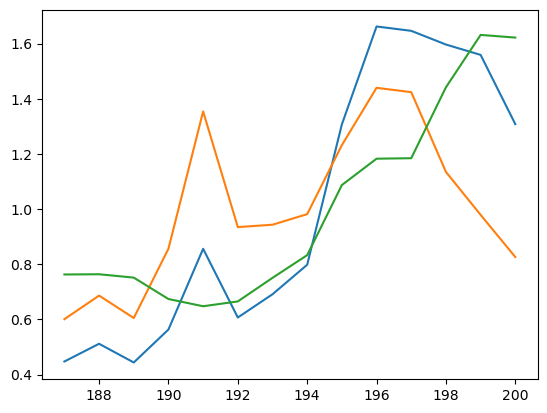

In [44]:
counting = speeches.loc[:,["word_count", "counter", "wind"]].groupby("wind").sum()
counting["wps"] = counting.word_count / counting.counter

counting["wps"] = counting["wps"] / counting["wps"].mean()
counting["counter"] = counting["counter"] / counting["counter"].mean()
counting["word_count"] = counting["word_count"] / counting["word_count"].mean()

plt.plot(counting)

## tests on sample data

In [24]:
sample_speeches, sample_speech_dict, sample_window_wordcount, sample_word_dict, sample_window_dict = ps.generate_sample_data()
tuple_dict = {(7, 15, 22): 2, (3, 4, 8): 4, (4, 66, 70): 2, (0, 9, 10): 3, (24, 58, 59): 2, (9, 10, 45): 1}

# cd.genNWiseCooccurenceDistribs(sspeech_lists, 3, sspeeches["wind2"], swordcount_window, sword_dict, frame=4, num_focal_words=3, num_context_words=75, make_sparse_arr=False)
wind_cooccur, total_cooccur = cd.genNWiseCooccurenceDistribs(sample_speech_dict, 3, sample_word_dict, frame=6, num_focal_words=100, num_context_words=100, tuple_dict=True)
wind_cooccur_pair, total_cooccur_pair = cd.genNWiseCooccurenceDistribs(sample_speech_dict, 2, sample_word_dict, frame=6, num_focal_words=100, num_context_words=100, tuple_dict=True)

100%|█████████████████████████████████████████████████| 22/22 [00:00<00:00, 42858.66it/s]
1it [00:00, 5841.65it/s]

length of the extended speech list 1


1: 0/1
memotuple size 48
memoframe size 48
dictionary size 64
length of the extended speech list 1
1: 0/22
memotuple size 48
memoframe size 48
dictionary size 64
length of the extended speech list 1
1: 0/1
memotuple size 48
memoframe size 48
dictionary size 64
length of the extended speech list 1
1: 0/22
memotuple size 48
memoframe size 48
dictionary size 64


In [25]:
d.printCooWordArr(sample_word_dict, wind_cooccur[1])
d.printCooWordArr(sample_word_dict, wind_cooccur[1])

['city', 'paris', 'streets']: 1
['city', 'paris', 'beauty']: 1
['city', 'paris', 'stopped']: 1
['city', 'paris', 'history']: 1
['city', 'tree', 'watching']: 1
['city', 'tree', 'rest']: 1
['city', 'tree', 'bench']: 1
['city', 'tree', 'stopped']: 1
['city', 'tree', 'history']: 1
['city', 'streets', 'beauty']: 1
['city', 'streets', 'history']: 1
['city', 'watching', 'rest']: 1
['city', 'watching', 'bench']: 1
['city', 'watching', 'stopped']: 1
['city', 'beauty', 'rest']: 1
['city', 'beauty', 'bench']: 1
['city', 'beauty', 'stopped']: 1
['city', 'beauty', 'history']: 1
['city', 'rest', 'bench']: 1
['city', 'rest', 'stopped']: 1
['city', 'rest', 'history']: 1
['city', 'bench', 'stopped']: 1
['city', 'bench', 'history']: 1
['city', 'stopped', 'history']: 1
['walked', 'paris', 'streets']: 1
['walked', 'paris', 'beauty']: 1
['walked', 'paris', 'cobblestone']: 1
['walked', 'streets', 'beauty']: 1
['walked', 'streets', 'cobblestone']: 1
['walked', 'beauty', 'cobblestone']: 1
['children', 'park',

In [22]:
print(total_cooccur)

{(7, 15, 22): 2, (0, 9, 10): 3, (3, 4, 8): 4, (24, 58, 59): 2, (9, 10, 45): 1, (4, 66, 70): 2}


In [8]:
[speech + "\n" for speech in sspeeches["speech"]]

['She looked out at the stunning blue sea from her balcony in Paris. Her girlfriend would be arriving tomorrow, and they planned to spend their vacation exploring the city together.\n',
 "Her stunning blue eyes looked almost transparent in the morning light. We had planned to spend tomorrow working, but that moment I couldn't resist asking her to take a day trip with me.\n",
 'The feeling of loss when he left the job was visceral, but eventually he learned to cope with it. As he walked home, he clutched his notebook and bag tightly, as if to hold on to the one relic from his last few years of toil.\n',
 'He absentmindedly twirled his bag in the stunning blue light, by the sea. He was lost in thought on the street, which gradually emptied out as rush hour ended, people settling into their desks.\n',
 'He and his wife had a difficult conversation by the fireplace, but afterward, their relationship felt stronger than ever. While they disagreed in their politics, he felt grateful that they

# Load data from pickle

In [3]:
with open("objects/speeches_full.pkl", "rb") as f:
    speeches = pkl.load(f)
    
with open("objects/speech_dict_full.pkl", "rb") as f:
    speech_dict = pkl.load(f)

In [1]:
with open("objects/speeches_mini.pkl", "rb") as f:
    speeches_mini = pkl.load(f)
    
with open("objects/speech_dict_mini.pkl", "rb") as f:
    speech_dict_small = pkl.load(f)

NameError: name 'pkl' is not defined

In [4]:
with open("objects/speeches_nano.pkl", "rb") as f:
    speeches_nano = pkl.load(f)
    
with open("objects/speech_dict_nano.pkl", "rb") as f:
    speech_dict_nano = pkl.load(f)

# Count up words

In [9]:
print({wind: len(lst) for wind, lst in speech_list_dict.items()})

{191: 41966, 193: 29054, 199: 30244, 196: 44766, 194: 30270, 190: 26230, 195: 38049, 197: 44035, 189: 18798, 200: 25177, 192: 28784, 188: 21565, 198: 35506, 187: 18219}


# Get contexts of words

In [ ]:
(context_pcts, context_pctvar, 
 context_counts, context_variances, 
 foc_dict, con_dict) = cd.genWordWindowContextDistribsStartToEnd(
                                                    speech_list_dict, 
                                                    word_dict, 
                                                    window_dict,
                                                    window_wordcount, 
                                                    frame=10, start_ind=0, end_ind=3500, top_m=10000, sample_equally=True, min_count=2000)

(3500,)


Process ForkPoolWorker-7:
Process ForkPoolWorker-131:
Process ForkPoolWorker-134:
Process ForkPoolWorker-135:
Process ForkPoolWorker-132:
Process ForkPoolWorker-137:
Process ForkPoolWorker-1:
Process ForkPoolWorker-133:
Process ForkPoolWorker-136:
Process ForkPoolWorker-130:
Process ForkPoolWorker-93:
Process ForkPoolWorker-126:
Process ForkPoolWorker-41:
Process ForkPoolWorker-38:
Process ForkPoolWorker-69:
Process ForkPoolWorker-59:
Process ForkPoolWorker-2:
Process ForkPoolWorker-120:
Process ForkPoolWorker-81:
Process ForkPoolWorker-3:
Process ForkPoolWorker-6:
Process ForkPoolWorker-67:
Process ForkPoolWorker-128:
Process ForkPoolWorker-16:
Process ForkPoolWorker-66:
Process ForkPoolWorker-98:
Process ForkPoolWorker-25:
Process ForkPoolWorker-110:
Process ForkPoolWorker-4:
Process ForkPoolWorker-22:
Process ForkPoolWorker-51:
Process ForkPoolWorker-90:
Process ForkPoolWorker-46:
Process ForkPoolWorker-49:
Process ForkPoolWorker-85:
Process ForkPoolWorker-42:
Process ForkPoolWorker

Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/victorvikram/anaconda3/envs/speech/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/victorvikram/anaconda3/envs/speech/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
Traceback (most recent call last):
  File "/home/victorvikram/anaconda3/envs/speech/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/home/victorvikram/anaconda3/envs/speech/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
Traceback (most recent call last):
Traceback (most recent call last

  File "/home/victorvikram/anaconda3/envs/speech/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/home/victorvikram/anaconda3/envs/speech/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/home/victorvikram/anaconda3/envs/speech/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/home/victorvikram/anaconda3/envs/speech/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/home/victorvikram/anaconda3/envs/speech/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/home/victorvikram/anaconda3/envs/speech/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/home/victorvikram/anaconda3/envs/speech/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/home/victorvikram/anaconda3/envs/speech/lib/python3.9/multiprocessing/proc

  File "/home/victorvikram/anaconda3/envs/speech/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/home/victorvikram/anaconda3/envs/speech/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/home/victorvikram/anaconda3/envs/speech/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/home/victorvikram/anaconda3/envs/speech/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/home/victorvikram/anaconda3/envs/speech/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/home/victorvikram/anaconda3/envs/speech/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/home/victorvikram/anaconda3/envs/speech/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/home/victorvikram/anaconda3/envs/speech/lib/python3.9/multiprocessing/proc

  File "/home/victorvikram/anaconda3/envs/speech/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/home/victorvikram/anaconda3/envs/speech/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/home/victorvikram/anaconda3/envs/speech/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/home/victorvikram/anaconda3/envs/speech/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/home/victorvikram/anaconda3/envs/speech/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/home/victorvikram/anaconda3/envs/speech/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/home/victorvikram/anaconda3/envs/speech/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*s

  File "/home/victorvikram/anaconda3/envs/speech/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/home/victorvikram/anaconda3/envs/speech/lib/python3.9/multiprocessing/queues.py", line 364, in get
    with self._rlock:
  File "/home/victorvikram/anaconda3/envs/speech/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/home/victorvikram/anaconda3/envs/speech/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/home/victorvikram/anaconda3/envs/speech/lib/python3.9/multiprocessing/queues.py", line 364, in get
    with self._rlock:
  File "/home/victorvikram/anaconda3/envs/speech/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/home/victorvikram/anaconda3/envs/speech/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._t

  File "/home/victorvikram/anaconda3/envs/speech/lib/python3.9/multiprocessing/queues.py", line 364, in get
    with self._rlock:
  File "/home/victorvikram/anaconda3/envs/speech/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/home/victorvikram/anaconda3/envs/speech/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/home/victorvikram/anaconda3/envs/speech/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/home/victorvikram/anaconda3/envs/speech/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/home/victorvikram/anaconda3/envs/speech/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/home/victorvikram/anaconda3/envs/speech/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/home/victorvikram/anaconda3/envs/speech/lib/python3.9/multiprocessing/queues

  File "/home/victorvikram/anaconda3/envs/speech/lib/python3.9/multiprocessing/queues.py", line 364, in get
    with self._rlock:
  File "/home/victorvikram/anaconda3/envs/speech/lib/python3.9/multiprocessing/queues.py", line 364, in get
    with self._rlock:
  File "/home/victorvikram/anaconda3/envs/speech/lib/python3.9/multiprocessing/queues.py", line 364, in get
    with self._rlock:
  File "/home/victorvikram/anaconda3/envs/speech/lib/python3.9/multiprocessing/queues.py", line 364, in get
    with self._rlock:
  File "/home/victorvikram/anaconda3/envs/speech/lib/python3.9/multiprocessing/queues.py", line 364, in get
    with self._rlock:
  File "/home/victorvikram/anaconda3/envs/speech/lib/python3.9/multiprocessing/queues.py", line 364, in get
    with self._rlock:
  File "/home/victorvikram/anaconda3/envs/speech/lib/python3.9/multiprocessing/queues.py", line 364, in get
    with self._rlock:
KeyboardInterrupt
  File "/home/victorvikram/anaconda3/envs/speech/lib/python3.9/multiproc

  File "/home/victorvikram/anaconda3/envs/speech/lib/python3.9/multiprocessing/queues.py", line 364, in get
    with self._rlock:
  File "/home/victorvikram/anaconda3/envs/speech/lib/python3.9/multiprocessing/queues.py", line 364, in get
    with self._rlock:
  File "/home/victorvikram/anaconda3/envs/speech/lib/python3.9/multiprocessing/queues.py", line 364, in get
    with self._rlock:
  File "/home/victorvikram/anaconda3/envs/speech/lib/python3.9/multiprocessing/queues.py", line 364, in get
    with self._rlock:
  File "/home/victorvikram/anaconda3/envs/speech/lib/python3.9/multiprocessing/queues.py", line 364, in get
    with self._rlock:
  File "/home/victorvikram/anaconda3/envs/speech/lib/python3.9/multiprocessing/queues.py", line 364, in get
    with self._rlock:
  File "/home/victorvikram/anaconda3/envs/speech/lib/python3.9/multiprocessing/queues.py", line 364, in get
    with self._rlock:
  File "/home/victorvikram/anaconda3/envs/speech/lib/python3.9/multiprocessing/queues.py",

  File "/home/victorvikram/anaconda3/envs/speech/lib/python3.9/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
  File "/home/victorvikram/anaconda3/envs/speech/lib/python3.9/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
  File "/home/victorvikram/anaconda3/envs/speech/lib/python3.9/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
  File "/home/victorvikram/anaconda3/envs/speech/lib/python3.9/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
  File "/home/victorvikram/anaconda3/envs/speech/lib/python3.9/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
KeyboardInterrupt
  File "/home/victorvikram/anaconda3/envs/speech/lib/python3.9/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
  File "/home/victorvikram/anaconda3/envs/speech/lib

  File "/home/victorvikram/anaconda3/envs/speech/lib/python3.9/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
KeyboardInterrupt
  File "/home/victorvikram/anaconda3/envs/speech/lib/python3.9/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
  File "/home/victorvikram/anaconda3/envs/speech/lib/python3.9/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
  File "/home/victorvikram/anaconda3/envs/speech/lib/python3.9/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
  File "/home/victorvikram/anaconda3/envs/speech/lib/python3.9/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
  File "/home/victorvikram/anaconda3/envs/speech/lib/python3.9/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
KeyboardInterrupt
  File "/home/victorvikram/anacond

  File "/home/victorvikram/anaconda3/envs/speech/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/home/victorvikram/anaconda3/envs/speech/lib/python3.9/multiprocessing/queues.py", line 364, in get
    with self._rlock:
  File "/home/victorvikram/anaconda3/envs/speech/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/home/victorvikram/anaconda3/envs/speech/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/home/victorvikram/anaconda3/envs/speech/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/home/victorvikram/anaconda3/envs/speech/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/home/victorvikram/anaconda3/envs/speech/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/home/victorvikram/anaconda3/envs/speech/lib/pyt

  File "/home/victorvikram/anaconda3/envs/speech/lib/python3.9/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
KeyboardInterrupt
  File "/home/victorvikram/anaconda3/envs/speech/lib/python3.9/multiprocessing/queues.py", line 364, in get
    with self._rlock:
KeyboardInterrupt
  File "/home/victorvikram/anaconda3/envs/speech/lib/python3.9/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
  File "/home/victorvikram/anaconda3/envs/speech/lib/python3.9/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
KeyboardInterrupt
KeyboardInterrupt
  File "/home/victorvikram/anaconda3/envs/speech/lib/python3.9/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
KeyboardInterrupt


## result one: window-by-window context change vs. long term context change

# Look at distribution on words and on speakers

In [5]:
speaker_words = speeches.loc[:,["speakerid", "word_count"]].groupby(by="speakerid").sum()

In [6]:
speaker_words.values

array([[ 81767],
       [103293],
       [163394],
       ...,
       [  2298],
       [  1107],
       [   733]], dtype=int64)

In [7]:
print(speaker_words.loc[:,"word_count"].mean())
speaker_words = speaker_words.sort_values("word_count", ascending=False)

55690.631429152265


## speaker distribution: slope is fairly mild

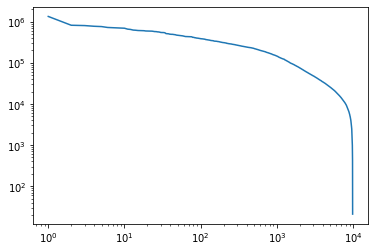

In [10]:
fig, ax = plt.subplots()
ax.plot(range(1, 9839), speaker_words.values.flatten())
ax.set_xticks([])
ax.set_yscale("log")
ax.set_xscale("log")
#ax.set_xticklabels([])

## word distribution

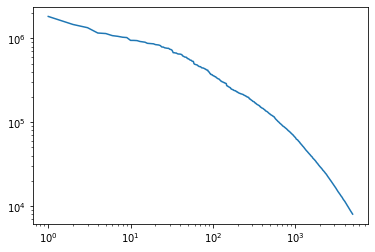

In [11]:
fig, ax = plt.subplots()

wordcount_total = wordcount_window.sum(axis=0)

ax.plot(range(1, 5001), wordcount_total[:5000])
ax.set_yscale("log")
ax.set_xscale("log")
#ax.set_xticklabels([])

## specific words

In [164]:
mini_words_of_interest = ["freedom", "rights", "responsibility", "fair", "justice"]
uncommon_words = ["equality", "honest", "integrity"]

mini_word_dict = {word: i for i, word in enumerate(mini_words_of_interest)}

In [165]:
(specific_context_pcts, specific_context_pctvar, 
 specific_context_counts, specific_context_variances, 
specific_foc_dict, specific_con_dict) = cd.genWordWindowContextDistribsSpecific(
                                                    mini_word_dict, 
                                                    speech_list,
                                                    speeches["wind"], 
                                                    word_dict, 
                                                    window_dict,
                                                    wordcount_window, 
                                                    frame=10, top_m=10000, sample_equally=True)

105815it [00:25, 4074.03it/s]

[[ 9808.]
 [ 9236.]
 [ 9740.]
 [ 9817.]
 [ 9632.]
 [ 9675.]
 [ 9888.]
 [ 9752.]
 [ 9439.]
 [ 9901.]
 [ 9882.]
 [ 9826.]
 [ 9426.]
 [ 9620.]
 [ 9524.]
 [ 9832.]
 [ 9937.]
 [ 9574.]
 [10168.]
 [ 9486.]
 [ 9839.]
 [ 9663.]
 [10016.]
 [ 9758.]
 [ 9336.]
 [ 9241.]
 [ 9892.]
 [10038.]
 [ 9466.]
 [ 9504.]
 [ 9518.]
 [ 9853.]
 [ 9668.]
 [10070.]
 [ 9685.]]


## all words above certain frequency

In [288]:
(lfull_context_pcts, lfull_context_pctvar, 
 lfull_context_counts, lfull_context_variances, 
 lfull_foc_dict, lfull_con_dict) = cd.genWordWindowContextDistribsStartToEnd(
                                                    long_speech_list,
                                                    long_speeches["wind"], 
                                                    lword_dict, 
                                                    lwindow_dict,
                                                    lwordcount_window, 
                                                    frame=10, start_ind=0, end_ind=4500, top_m=10000, sample_equally=True, min_count=2000)

0it [00:00, ?it/s]

(4500,)


2116282it [41:56, 841.10it/s] 


[[28301.]
 [28856.]
 [28651.]
 ...
 [33761.]
 [33807.]
 [34062.]]


## all words above certain frequency, symmetric

In [13]:
(symm_context_pcts, symm_context_pctvar, 
symm_context_counts, symm_context_variances, 
symm_foc_dict, symm_con_dict) = cd.genWordWindowContextDistribsStartToEnd(
                                                    speech_list,
                                                    speeches["wind"], 
                                                    word_dict, 
                                                    window_dict,
                                                    wordcount_window, 
                                                    frame=10, start_ind=0, end_ind=10000, top_m=10000, sample_equally=True, min_count=100, symmetric=True)

0it [00:00, ?it/s]

(10000,)


2116282it [23:41, 1489.12it/s]


[[[1325.]
  [1698.]
  [1728.]
  ...
  [1600.]
  [1454.]
  [1860.]]

 [[1289.]
  [1510.]
  [1597.]
  ...
  [1537.]
  [1719.]
  [1348.]]

 [[1281.]
  [1780.]
  [1802.]
  ...
  [1705.]
  [1506.]
  [1474.]]

 ...

 [[1547.]
  [1558.]
  [1915.]
  ...
  [1692.]
  [1874.]
  [2071.]]

 [[1558.]
  [1644.]
  [1719.]
  ...
  [1664.]
  [1494.]
  [1653.]]

 [[1444.]
  [1776.]
  [1886.]
  ...
  [1809.]
  [1522.]
  [1664.]]]


## common words

In [292]:
(common_context_pcts, common_context_pctvar, 
 common_context_counts, common_context_variances, 
 common_foc_dict, common_col_dict) = cd.genWordWindowContextDistribsStartToEnd(
                                                    speech_list,
                                                    speeches["wind"], 
                                                    word_dict, 
                                                    window_dict,
                                                    wordcount_window, 
                                                    frame=10, start_ind=50, end_ind=500, top_m=10000, sample_equally=True, min_count=100)
common_word_context_pcts.shape

117it [00:00, 1159.30it/s]

(450,)


105815it [01:29, 1180.45it/s]

[[[4197.]
  [4457.]
  [4715.]
  ...
  [4626.]
  [4656.]
  [4239.]]

 [[4688.]
  [4612.]
  [4089.]
  ...
  [4891.]
  [4439.]
  [4541.]]

 [[4649.]
  [4705.]
  [4431.]
  ...
  [4566.]
  [4679.]
  [4449.]]

 ...

 [[5109.]
  [4710.]
  [4671.]
  ...
  [4617.]
  [4818.]
  [4556.]]

 [[5020.]
  [4928.]
  [4964.]
  ...
  [4905.]
  [4747.]
  [4834.]]

 [[4875.]
  [4745.]
  [5035.]
  ...
  [4761.]
  [4461.]
  [4656.]]]


MemoryError: Unable to allocate 239. MiB for an array with shape (7, 448, 10000) and data type float64

# Get centralities of words

In [14]:
# symm_context_rolled = cd.roll_unrolled_arr(symm_context_pcts, len(window_dict) // 2, len(symm_foc_dict) // 2)
# symm_context_rolled.shape

MemoryError: Unable to allocate 43.1 TiB for an array with shape (7, 9460, 9460, 9460) and data type float64

In [15]:
word_centralities = no.centrality_by_layer(symm_context_pcts)

0
1
1
1
2
1
3
1
4
1
5
1
6
1


(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:title={'center':'Word centrality changes over time'}>)

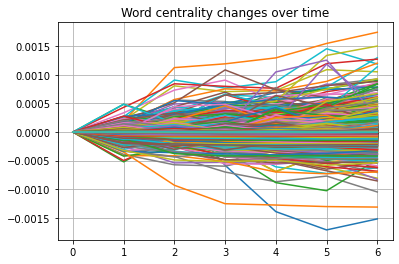

In [16]:
d.plot_column_change(word_centralities, title="Word centrality changes over time")

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 8.646e+06
Date:                Mon, 20 Mar 2023   Prob (F-statistic):               0.00
Time:                        23:54:21   Log-Likelihood:             6.2318e+05
No. Observations:               66220   AIC:                        -1.246e+06
Df Residuals:                   66218   BIC:                        -1.246e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.977e-05   8.23e-08    240.207      0.0

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:title={'center':'Centrality vs Frequency'}>)

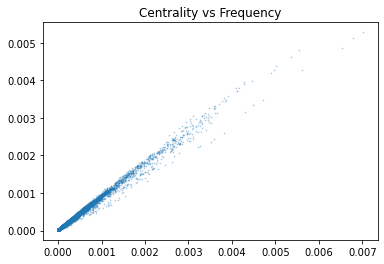

In [17]:
symm_indices = [word_dict[word] for word in symm_con_dict if isinstance(word, str)]
# print(word_net_indices)
relevant_wordcount_window_pct = wordcount_window_pct[:, symm_indices]

d.scatter(relevant_wordcount_window_pct.flatten(),  word_centralities.flatten(), title="Centrality vs Frequency", include_regression=True)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     40.25
Date:                Mon, 20 Mar 2023   Prob (F-statistic):           2.26e-10
Time:                        23:54:22   Log-Likelihood:             5.0269e+05
No. Observations:               56760   AIC:                        -1.005e+06
Df Residuals:                   56758   BIC:                        -1.005e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.287e-07    1.6e-07      2.684      0.0

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:title={'center':'Centrality change vs. centrality'}>)

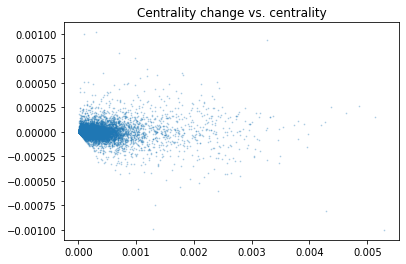

In [18]:
reg, shifted = dist.make_shift_row_arrs(word_centralities)
centrality_changes_yty = shifted - reg
# centrality_changes_yty_2 = word_centralities[1:,:] - word_centralities[:-1,:]
# assert (centrality_changes_yty == centrality_changes_yty_2).all()

d.scatter(word_centralities[:-1,:].flatten(), centrality_changes_yty[:,:].flatten(), title="Centrality change vs. centrality", include_regression=True)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     81.40
Date:                Mon, 20 Mar 2023   Prob (F-statistic):           1.90e-19
Time:                        23:54:22   Log-Likelihood:             4.9150e+05
No. Observations:               56760   AIC:                        -9.830e+05
Df Residuals:                   56758   BIC:                        -9.830e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.828e-07   1.89e-07      3.620      0.0

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:title={'center':'Frequency change vs frequency'}>)

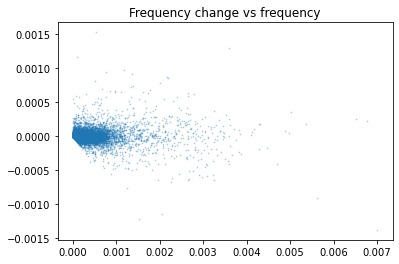

In [19]:
relevant_wordcount_window_pct_chng = relevant_wordcount_window_pct[1:,:] - relevant_wordcount_window_pct[:-1,:]
d.scatter(relevant_wordcount_window_pct[:-1,:].flatten(), relevant_wordcount_window_pct_chng.flatten(), title="Frequency change vs frequency", include_regression=True)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     54.42
Date:                Mon, 20 Mar 2023   Prob (F-statistic):           1.64e-13
Time:                        23:54:22   Log-Likelihood:             5.0270e+05
No. Observations:               56760   AIC:                        -1.005e+06
Df Residuals:                   56758   BIC:                        -1.005e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.064e-07   1.55e-07      2.625      0.0

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:title={'center':'Centrality change vs frequency'}>)

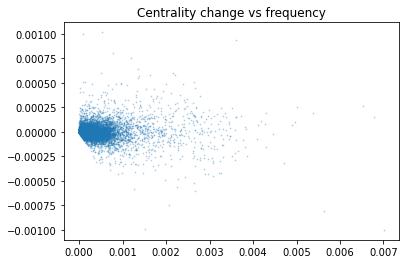

In [20]:
d.scatter(relevant_wordcount_window_pct[:-1,:].flatten(), centrality_changes_yty[:,:].flatten(), title="Centrality change vs frequency", include_regression=True)

In [624]:
no.betweenness_centrality(flat_adj_mat)

1


{0: 0.0011010739857005517,
 1: 0.0009234587263882558,
 2: 0.0009719071258458021,
 3: 0.001020703004356911,
 4: 0.0011461805502716855,
 5: 0.0010048573684139153,
 6: 0.0011687953825196722,
 7: 0.0007300331216919438,
 8: 0.001114856430617017,
 9: 0.0008464772325046878,
 10: 0.001071458586876041,
 11: 0.0008646150410800971,
 12: 0.0009727480923296904,
 13: 0.0008964826912514246,
 14: 0.0011410219456229526,
 15: 0.0009738676381996153,
 16: 0.0009597337778089088,
 17: 0.0009248885511612692,
 18: 0.0010569491310121388,
 19: 0.0009256644716462952,
 20: 0.0009495895755110634,
 21: 0.0011176700618071456,
 22: 0.001120187444384557,
 23: 0.0009674659833837534,
 24: 0.000914293984211585,
 25: 0.0009787978407279796,
 26: 0.0009649378328515253,
 27: 0.0009506613895347615,
 28: 0.001101099102768043,
 29: 0.0009552576912847206,
 30: 0.0009608924108621541,
 31: 0.0007983807597830656,
 32: 0.0007321481532490351,
 33: 0.0008639300993205118,
 34: 0.0008620176111666694,
 35: 0.0010817383487671335,
 36: 0.0

# Graph basic change relations

In [22]:
full_changes, full_change_summands = cd.compile_list_of_changes(full_context_pcts, len(full_foc_dict) // 2, len(window_dict) // 2)
full_changes_var, full_change_summands_var = cd.compile_list_of_changes(full_context_pcts, len(full_foc_dict) // 2, len(window_dict) // 2, comp_func=dist.make_shift_row_arrs, distance_metric=dist.calc_taxicab_var, context_vars=full_context_pctvar)

full_word_window_counts = cd.compile_list_of_frequencies(wordcount_window, full_foc_dict, word_dict, len(window_dict) // 2, normalize=True)

[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]]
[[   0    1    2 ... 3112 3134 3233]]


In [23]:
full_levels_pres, full_levels_summands = cd.compile_list_of_changes(full_context_pcts, len(full_foc_dict) // 2, len(window_dict) // 2, comp_func=dist.make_past_present_arrs, distance_metric=dist.calc_taxicab)
past, futu = dist.make_shift_row_arrs(full_levels_pres)
full_changes_pres = futu - past
full_changes_pres.shape

(5, 2396)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     19.03
Date:                Mon, 20 Mar 2023   Prob (F-statistic):           1.41e-05
Time:                        23:58:42   Log-Likelihood:                 2194.5
No. Observations:                1090   AIC:                            -4385.
Df Residuals:                    1088   BIC:                            -4375.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0087      0.011      0.775      0.4

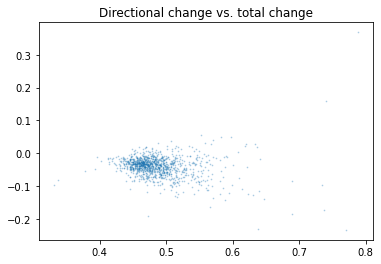

In [24]:
fig, ax = d.scatter(full_changes[:5,...].flatten(), full_changes_pres.flatten(), title="Directional change vs. total change", skip=11, include_regression=True)

In [ ]:
# num_windows = len(window_dict) // 2
# full_context_pcts_rolled = cd.roll_unrolled_arr(full_context_pcts, num_windows, len(full_foc_dict)//2)
# full_context_counts_rolled = cd.roll_unrolled_arr(full_context_counts, num_windows, len(full_foc_dict)//2)

In [25]:
len(full_con_dict)

20000

In [26]:
full_overunder = cd.calcOverUnderRepresentation(full_context_pcts, wordcount_window_pct, full_con_dict, word_dict, cutoff=0.00001)

C:\Users\vicvi\OneDrive\active\causality\speeches\display.py:86: RuntimeWarning: invalid value encountered in double_scalars
  


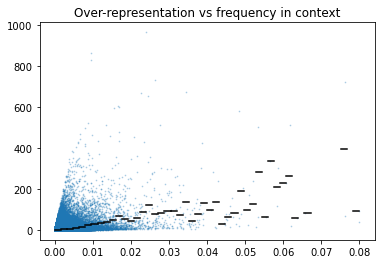

In [38]:
fig, ax = d.scatter(full_context_pcts.flatten(), full_overunder.flatten(), title="Over-representation vs frequency in context", average_bins=50, skip=11)
#ax.set_ylim(bottom=-10, top=50)

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:title={'center':'Frequency in context vs contribution to change'}>)

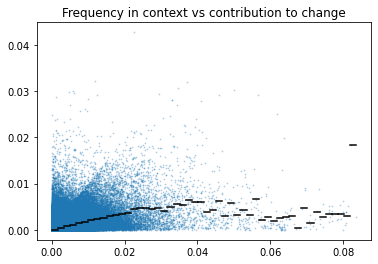

In [28]:
d.scatter(full_context_pcts[:6,:].flatten(), full_change_summands.flatten(), title="Frequency in context vs contribution to change", average_bins=50)

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:title={'center':'Frequency in context vs variance-aware change'}>)

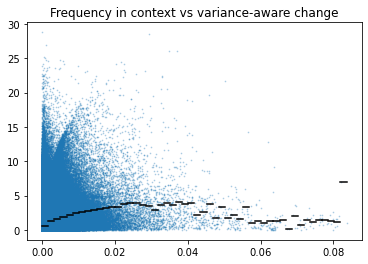

In [29]:
d.scatter(full_context_pcts[:6,:].flatten(), full_change_summands_var.flatten(), title="Frequency in context vs variance-aware change", average_bins=50)

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:title={'center':'Change vs over-representation in context'}>)

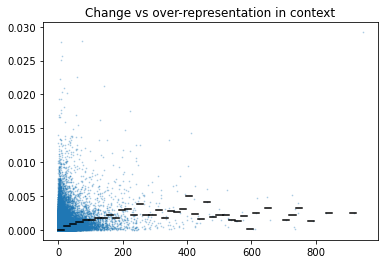

In [30]:
d.scatter(full_overunder[:6,:].flatten(), full_change_summands.flatten(), title="Change vs over-representation in context", average_bins=50, skip=10)

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:title={'center':'Variance-aware change vs over-representation in context'}>)

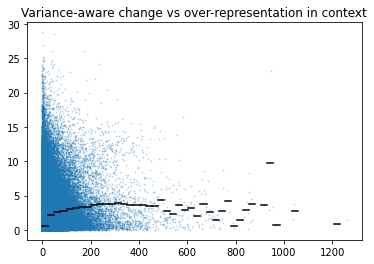

In [31]:
d.scatter(full_overunder[:6,:].flatten(), full_change_summands_var.flatten(), title="Variance-aware change vs over-representation in context", average_bins=50)

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:title={'center':'Variance-aware change vs over-representation (log) in context'}>)

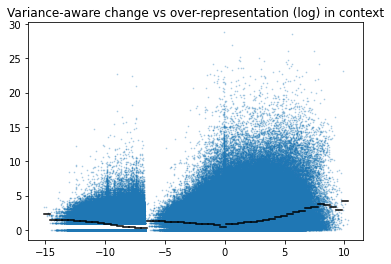

In [37]:
d.scatter(np.log2(full_overunder[:6,:].flatten()), full_change_summands_var.flatten(), title="Variance-aware change vs over-representation (log) in context", average_bins=50)

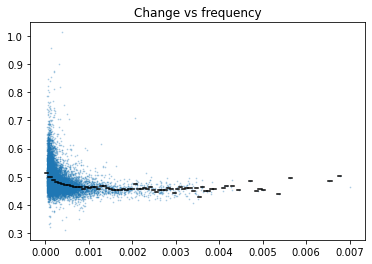

In [35]:
fig, ax = d.scatter(full_word_window_counts[:-1,:].flatten(), full_changes.flatten(), title="Change vs frequency", average_bins=100)

(0.0, 0.002)

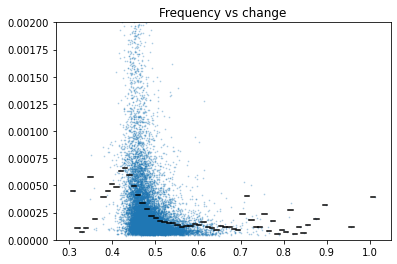

In [36]:
fig, ax = d.scatter(full_changes.flatten(), full_word_window_counts[:-1,:].flatten(), title="Frequency vs change", average_bins=100)
ax.set_ylim(bottom=0, top=0.002)

# Graph entropy relations

In [39]:
full_plugin_entropy = cd.entropy_by_last_dim(cd.nonzeroify(full_context_pcts))
full_nsb_entropy = cd.nsb_entropy_last_dim(full_context_counts)

(7, 2396, 10000)
(7, 2396)


In [40]:
full_nsb_entropy.shape

(7, 2396)

In [55]:
d.print_word_window_quantity_vector_flat(full_foc_dict, window_dict, full_nsb_entropy.flatten())

2853, 397, found, val: 8.116071290487431
457, 396, found, val: 8.11207742846889
880, 396, led, val: 8.109937712286285
1787, 396, al, val: 8.10640470642852
3276, 397, led, val: 8.10314225758011
4005, 397, noted, val: 8.102977755528407
11591, 400, resulted, val: 8.101241860605816
735, 396, whose, val: 8.100366265093973
10628, 400, thus, val: 8.096150836950558
2974, 397, known, val: 8.096005925730756
13024, 401, thus, val: 8.094557245023696
4403, 397, resulted, val: 8.091998601634886
4342, 397, furthermore, val: 8.091888033634426
5672, 398, led, val: 8.091423798263344
6799, 398, resulted, val: 8.09002921740721
2863, 397, often, val: 8.088468179263126
12352, 401, addition, val: 8.088017033355332
3681, 397, highly, val: 8.087911749967885
10464, 400, led, val: 8.087597015828164
8232, 399, thus, val: 8.087464436199193
3440, 397, thus, val: 8.086844542763842
2768, 397, addition, val: 8.086340168589512
5370, 398, known, val: 8.085968981487405
5249, 398, found, val: 8.085699097795375
467, 396, o

136, 396, life, val: 7.998323018749707
2822, 397, ability, val: 7.99831371689081
1240, 396, unique, val: 7.998223113900998
11468, 400, actual, val: 7.998220820350563
3933, 397, performance, val: 7.998107252403121
174, 396, still, val: 7.99807509323069
6150, 398, moved, val: 7.998049071613021
15767, 402, near, val: 7.997761534166976
3636, 397, unique, val: 7.997744224434574
6985, 398, modern, val: 7.997713194929102
632, 396, continued, val: 7.997700844269141
9157, 399, traditional, val: 7.997628654695825
11008, 400, caused, val: 7.997581617703362
6067, 398, leading, val: 7.997556294065124
698, 396, old, val: 7.997285913396944
1065, 396, developed, val: 7.9972817948000525
914, 396, various, val: 7.997064867041997
13803, 401, instance, val: 7.997058402444656
7021, 398, heavy, val: 7.9970550715867414
479, 396, large, val: 7.997043046039937
13417, 401, ultimately, val: 7.9970388609528165
1557, 396, shown, val: 7.996823659523696
7386, 399, used, val: 7.996805258882056
276, 396, major, val: 7

11351, 400, condition, val: 7.9350428072013015
607, 396, west, val: 7.935014809051343
3063, 397, view, val: 7.935002648926712
5503, 398, march, val: 7.934998206768119
12923, 401, key, val: 7.9349699728127066
845, 396, independent, val: 7.934963379186686
1431, 396, effects, val: 7.934838825565598
850, 396, safe, val: 7.934828841810537
7388, 399, already, val: 7.934827125441082
12411, 401, rather, val: 7.93478584422421
481, 396, cases, val: 7.9346029944939165
13792, 401, engaged, val: 7.934582488626163
11487, 400, powerful, val: 7.934562022775279
2008, 396, cold, val: 7.934527549833863
10084, 400, particularly, val: 7.934514915600776
2697, 397, across, val: 7.934448745454411
1841, 396, gain, val: 7.934395057150665
10395, 400, turn, val: 7.934382536178101
9807, 400, case, val: 7.934333087150843
16714, 402, holds, val: 7.93432411345663
227, 396, history, val: 7.934288367860525
14668, 402, given, val: 7.934283140049392
11933, 400, stopped, val: 7.934257007847654
1338, 396, permit, val: 7.93

7742, 399, effective, val: 7.9091128263017
1206, 396, press, val: 7.909092141873434
9024, 399, pursue, val: 7.909064811967902
5406, 398, responsible, val: 7.90901538986483
4732, 397, fails, val: 7.909010355559688
2005, 396, design, val: 7.9089322197205005
3908, 397, pointed, val: 7.908918716304622
3868, 397, named, val: 7.908865931714551
2178, 396, fast, val: 7.908854589840271
533, 396, require, val: 7.908832724624323
2447, 397, way, val: 7.908814555910039
291, 396, areas, val: 7.908770510168048
9395, 399, duties, val: 7.908759618226247
6237, 398, southern, val: 7.908758085660144
2426, 397, national, val: 7.908756540598678
9665, 400, system, val: 7.908726491866978
1581, 396, mass, val: 7.908637604244783
8633, 399, southern, val: 7.908624463344292
942, 396, numbers, val: 7.908579936322732
5019, 398, history, val: 7.90857694914115
8723, 399, acting, val: 7.908570107693093
10791, 400, events, val: 7.908570089614842
11517, 400, eight, val: 7.908567524463476
5958, 398, commercial, val: 7.90

1600, 396, quote, val: 7.88106401673217
5434, 398, basic, val: 7.881038347752217
12098, 401, number, val: 7.881003861720368
6623, 398, vast, val: 7.880953082494804
6397, 398, larger, val: 7.880931495457097
9582, 399, impressive, val: 7.880927828943131
12295, 401, far, val: 7.880927070238257
1333, 396, road, val: 7.880913033813588
5737, 398, representative, val: 7.880890622316075
13219, 401, sound, val: 7.880859153084708
447, 396, center, val: 7.880848510936193
14667, 402, areas, val: 7.880838754681364
4122, 397, accepted, val: 7.880818629344438
5693, 398, essential, val: 7.880802525056307
4155, 397, chicago, val: 7.880774255033504
16543, 402, encouraging, val: 7.880699907427369
3165, 397, seems, val: 7.880681048445143
10249, 400, age, val: 7.880662871498396
16110, 402, variety, val: 7.880622640166962
11766, 400, risks, val: 7.880601861200574
6759, 398, frank, val: 7.880581785005843
9622, 400, may, val: 7.8805646984525355
10718, 400, decided, val: 7.880546602344022
11064, 400, expected,

8318, 399, claims, val: 7.855914739042399
12810, 401, july, val: 7.855895341129579
12457, 401, involved, val: 7.855804485716373
11195, 400, movement, val: 7.855802881649896
10765, 400, developing, val: 7.855784518545655
11672, 400, normal, val: 7.855756979740009
10843, 400, im, val: 7.855674082272492
1146, 396, aware, val: 7.855669859033985
13306, 401, assist, val: 7.855593620767098
6051, 398, im, val: 7.855591412420487
10836, 400, limits, val: 7.855492247102178
15970, 402, summer, val: 7.855458201753247
12959, 401, soon, val: 7.855454234942738
12960, 401, mission, val: 7.855453290311856
15078, 402, show, val: 7.85544121556344
13432, 401, damage, val: 7.85542553172817
15494, 402, persons, val: 7.855425253182945
7819, 399, though, val: 7.855425040278798
6491, 398, calling, val: 7.855421736131989
2978, 397, review, val: 7.855399008668874
4605, 397, ignore, val: 7.855390501332603
9875, 400, areas, val: 7.855282991120461
14161, 401, understood, val: 7.855277358530765
12218, 401, around, va

5812, 398, hundreds, val: 7.8416871154606165
8180, 399, foundation, val: 7.841683591534459
11144, 400, closing, val: 7.841640441541025
11170, 400, notice, val: 7.841602154659519
4167, 397, owners, val: 7.841593620106551
13608, 401, involvement, val: 7.841562459673098
9750, 400, best, val: 7.841560879543651
2870, 397, asked, val: 7.841537427427044
7159, 398, jones, val: 7.841522456607824
5287, 398, difficult, val: 7.841510483492683
13652, 401, eastern, val: 7.84149429152717
5442, 398, treatment, val: 7.841483769671555
4212, 397, learning, val: 7.8414704394523245
14006, 401, yearold, val: 7.841437314389242
10345, 400, requirements, val: 7.841425364322147
13973, 401, crucial, val: 7.8414190880504515
5974, 398, fighting, val: 7.841364600134541
12146, 401, best, val: 7.841364460873047
9266, 399, accomplished, val: 7.8412789597447015
696, 396, thought, val: 7.841264698276398
3148, 397, violence, val: 7.841243253085586
6893, 398, founded, val: 7.841213076598988
6036, 398, creating, val: 7.841

15422, 402, apply, val: 7.826369189859017
3400, 397, lose, val: 7.826362596804667
4736, 397, achieving, val: 7.826353848793813
10487, 400, reports, val: 7.82631160632086
3288, 397, black, val: 7.82630712201471
945, 396, representative, val: 7.826305972293987
4698, 397, camp, val: 7.826291454127795
11071, 400, integrity, val: 7.826252176330384
13614, 401, demonstrated, val: 7.82622153296062
6518, 398, accepted, val: 7.8262114600469985
7946, 399, run, val: 7.82619230856778
2430, 397, know, val: 7.826183557680793
4759, 397, looks, val: 7.826178141635599
9938, 400, commission, val: 7.8261769232429454
474, 396, asked, val: 7.826175257569484
5399, 398, west, val: 7.826132688103771
8806, 399, seem, val: 7.826110617651246
3865, 397, issued, val: 7.826050037257722
11367, 400, treated, val: 7.826012568627261
6574, 398, speaking, val: 7.8259917387393
13099, 401, numerous, val: 7.82596316286343
6860, 398, treat, val: 7.82594185253823
7289, 399, policy, val: 7.825927249665683
9653, 400, every, val:

1601, 396, win, val: 7.813475662166449
13359, 401, television, val: 7.8134745908116665
9032, 399, advocate, val: 7.813468208062046
1365, 396, site, val: 7.813431882919905
15330, 402, reach, val: 7.8134295578296165
7248, 399, believe, val: 7.8133793632420945
1465, 396, accounts, val: 7.813350202266246
6897, 398, awarded, val: 7.813350043004715
14811, 402, critical, val: 7.813348879956555
2142, 396, memory, val: 7.813322595460158
3667, 397, grow, val: 7.813295238736907
5551, 398, goal, val: 7.813269081736942
5169, 398, away, val: 7.813239754000445
385, 396, benefit, val: 7.813235170609925
13971, 401, assessment, val: 7.81322532155203
12562, 401, review, val: 7.813210751889319
13292, 401, occur, val: 7.813205495965707
6267, 398, running, val: 7.813124391966254
9528, 399, achieving, val: 7.813121360164048
4106, 397, returned, val: 7.813109853472162
3929, 397, standing, val: 7.813093889538589
4756, 397, wealth, val: 7.8130617053090825
4124, 397, check, val: 7.813059176796244
7638, 399, actu

412, 396, north, val: 7.798286280027339
12862, 401, alone, val: 7.79827071212079
14143, 401, targeted, val: 7.798234500580066
5049, 398, real, val: 7.7982128111560005
9236, 399, prohibit, val: 7.798212412114801
2734, 397, safety, val: 7.79821005172504
8084, 399, term, val: 7.798201333586511
9996, 400, north, val: 7.798108372744425
676, 396, crisis, val: 7.798069166153279
8727, 399, scientific, val: 7.798061920345793
833, 396, dedicated, val: 7.797991454922284
9099, 399, violation, val: 7.797990616493081
7489, 399, across, val: 7.797967114780183
5475, 398, environment, val: 7.79796359386506
844, 396, happened, val: 7.7979355852556465
12383, 401, received, val: 7.797886117120291
7392, 399, control, val: 7.797883279451877
7271, 399, provide, val: 7.797875546452823
3968, 397, transfer, val: 7.797857545661686
6203, 398, considering, val: 7.797854332243915
15137, 402, requirements, val: 7.797830003597799
5130, 398, safety, val: 7.797825356462731
902, 396, difference, val: 7.79780800668159
95

10919, 400, huge, val: 7.7829429740572795
15882, 402, size, val: 7.782902847431293
13983, 401, nationwide, val: 7.782900041359519
7213, 399, make, val: 7.782869126961427
12772, 401, property, val: 7.782834750022079
13491, 401, paul, val: 7.782809596980176
12512, 401, legal, val: 7.782783943116939
3057, 397, leave, val: 7.7827786278131885
14787, 402, technology, val: 7.782775357505911
4286, 397, hall, val: 7.782770177153743
2701, 397, deal, val: 7.782748038368585
3973, 397, wonderful, val: 7.782705554679424
15457, 402, data, val: 7.782550819007807
15268, 402, black, val: 7.782546814175714
2378, 396, commissioner, val: 7.782545190656581
3676, 397, sales, val: 7.782526875479667
7176, 398, beach, val: 7.782488471285863
2671, 397, worked, val: 7.782483150737443
784, 396, questions, val: 7.782481385621876
15584, 402, play, val: 7.782480990729494
7151, 398, neighborhood, val: 7.782429569783574
3804, 397, resolve, val: 7.782395051476419
1311, 396, conclusion, val: 7.782380636942335
14705, 402,

6688, 398, patient, val: 7.771048019338983
13571, 401, suffering, val: 7.7710214357067535
10783, 400, fellow, val: 7.77096502882087
15548, 402, knew, val: 7.770876671315674
630, 396, parents, val: 7.7708703273609485
15551, 402, mentioned, val: 7.770865214897251
3067, 397, wanted, val: 7.770864298397655
11722, 400, deals, val: 7.770837501582261
12560, 401, statement, val: 7.7707628730916705
12338, 401, staff, val: 7.770759541886376
12321, 401, months, val: 7.7707407728341344
2705, 397, air, val: 7.770738234807482
11664, 400, lifetime, val: 7.770719266062916
1062, 396, deserve, val: 7.770713855327474
15222, 402, largest, val: 7.770689632992005
7172, 398, slow, val: 7.770667814409832
4236, 397, bottom, val: 7.770659282798324
442, 396, third, val: 7.770647495654023
7155, 398, looks, val: 7.770643912126472
3720, 397, remaining, val: 7.770592606905139
9904, 400, medical, val: 7.7705866109145045
3403, 397, burden, val: 7.770576912833353
16743, 402, jones, val: 7.7705186269017075
5228, 398, fo

13598, 401, seem, val: 7.743263306686401
14657, 402, lives, val: 7.74324914471417
7768, 399, statement, val: 7.743234751906458
4307, 397, violation, val: 7.74323393421239
13813, 401, expense, val: 7.7431469196305205
1829, 396, internal, val: 7.743124181664998
10602, 400, illegal, val: 7.7430958324989545
12391, 401, technology, val: 7.7430947128652665
9038, 399, fashion, val: 7.743082748847677
4493, 397, talks, val: 7.7430729491520704
10228, 400, governments, val: 7.743042260819354
609, 396, capital, val: 7.743041084684404
2198, 396, professor, val: 7.743021404206438
1893, 396, mandatory, val: 7.742997989911372
6573, 398, manufacturers, val: 7.742989525506998
6276, 398, thomas, val: 7.742983072919185
9330, 399, memory, val: 7.7429652027801215
9605, 400, united, val: 7.742961170683733
16084, 402, principle, val: 7.742923119614957
9154, 399, bay, val: 7.7428997166479645
16693, 402, unacceptable, val: 7.742865326135603
4159, 397, filed, val: 7.742776364753409
13621, 401, massive, val: 7.74

14437, 402, service, val: 7.720215932967046
14343, 401, looks, val: 7.7201829461288405
1461, 396, republic, val: 7.720173997037737
9279, 399, transition, val: 7.720119775441983
11398, 400, sit, val: 7.72010027699775
6376, 398, chemical, val: 7.720064450827939
376, 396, employees, val: 7.720030572814756
6835, 398, innovative, val: 7.720025615855194
8276, 399, woman, val: 7.7200029664490195
10663, 400, demand, val: 7.719980389212525
13103, 401, cooperation, val: 7.719949116855741
6288, 398, overseas, val: 7.7199483581784385
1898, 396, teaching, val: 7.719946451848438
15642, 402, todays, val: 7.719892919561685
8367, 399, love, val: 7.719890486225061
2214, 396, naval, val: 7.719873722292016
2433, 397, say, val: 7.719866190282868
7311, 399, rights, val: 7.7196766059106565
10794, 400, proposals, val: 7.719628749592582
10057, 400, lost, val: 7.719579791920124
5521, 398, regulations, val: 7.719577526480091
12771, 401, abuse, val: 7.719575031410073
6059, 398, independence, val: 7.71950672640193

9427, 399, depend, val: 7.7010325796570305
4139, 397, sites, val: 7.700992364324111
8386, 399, testimony, val: 7.700865602621032
831, 396, moment, val: 7.700793654716567
13320, 401, figure, val: 7.70078106907482
16745, 402, thoughtful, val: 7.700758741137834
3052, 397, commerce, val: 7.700733613217421
10178, 400, florida, val: 7.700723678805001
7686, 399, higher, val: 7.7007155648446926
8758, 399, alabama, val: 7.700656877295735
189, 396, something, val: 7.700652995880901
15237, 402, unless, val: 7.700635818457994
15016, 402, single, val: 7.700613246909318
7563, 399, agree, val: 7.7006109124762565
6141, 398, choose, val: 7.7005836546166
2784, 397, rate, val: 7.7005810052311405
16009, 402, somehow, val: 7.700443413447682
5596, 398, limit, val: 7.700438863080183
7339, 399, local, val: 7.700428632363565
9970, 400, democratic, val: 7.7004100263042625
6924, 398, litigation, val: 7.700402313476749
2381, 396, pieces, val: 7.70040122335465
6990, 398, professor, val: 7.700301543596707
9393, 399

14525, 402, district, val: 7.681778782508456
16081, 402, regime, val: 7.681772577853264
12340, 401, presidents, val: 7.6817511690721005
3786, 397, maryland, val: 7.681724286726967
11231, 400, efficient, val: 7.681704210919501
12982, 401, hospital, val: 7.681692179500462
9727, 400, cost, val: 7.681665436698595
16586, 402, saved, val: 7.681655532434657
8965, 399, contribute, val: 7.681607063783556
11698, 400, published, val: 7.681589902669858
14089, 401, saving, val: 7.681589571321796
5362, 398, considered, val: 7.681589566837244
11965, 400, pieces, val: 7.681578869832886
10958, 400, presented, val: 7.681534765397357
11949, 400, joseph, val: 7.681524274310557
12396, 401, reduce, val: 7.681497263547256
5566, 398, arms, val: 7.681477271924449
8116, 399, message, val: 7.6814120542011
12361, 401, freedom, val: 7.681352114621695
2029, 396, delegation, val: 7.681336603606012
3959, 397, net, val: 7.6813137835478615
11093, 400, sell, val: 7.681291599650481
5829, 398, river, val: 7.68128584396626

16029, 402, childrens, val: 7.650317605717761
10601, 400, wife, val: 7.6502578920748245
7363, 399, things, val: 7.650255474195939
13229, 401, born, val: 7.650155238038545
1931, 396, violent, val: 7.650118277745092
12366, 401, democratic, val: 7.650090773756738
13392, 401, promise, val: 7.650047532063585
10648, 400, massachusetts, val: 7.650032120487097
12115, 401, families, val: 7.649992085831259
11500, 400, miss, val: 7.64997687976122
14511, 402, families, val: 7.649930621222947
10339, 400, ohio, val: 7.649904220243715
8486, 399, frankly, val: 7.649839211520501
13148, 401, indicated, val: 7.649822909323265
14799, 402, fair, val: 7.649807248139248
11009, 400, skills, val: 7.649794653806035
6814, 398, advisory, val: 7.64978447731659
14241, 401, succeed, val: 7.649760584785502
14234, 401, delaware, val: 7.649647949288464
14455, 402, let, val: 7.649633328458536
2914, 397, title, val: 7.649628722218311
12673, 401, democracy, val: 7.649617050841229
10, 396, house, val: 7.6495548777678
11436

8166, 399, direction, val: 7.63088533574357
9855, 400, lot, val: 7.630847653066457
4818, 398, want, val: 7.630817909782261
3417, 397, markets, val: 7.630804418529378
5350, 398, rates, val: 7.630745267986686
6319, 398, generations, val: 7.630742522099988
9594, 400, house, val: 7.630741220990977
10950, 400, reading, val: 7.630720393311027
1761, 396, volunteer, val: 7.630623150508129
3672, 397, minnesota, val: 7.630572545344206
12017, 401, say, val: 7.630564836768491
15225, 402, constituents, val: 7.630475095341823
2285, 396, prosperity, val: 7.63037665062366
3059, 397, passage, val: 7.630362969247796
12648, 401, china, val: 7.630358008913961
5668, 398, wants, val: 7.630309528128993
2786, 397, ought, val: 7.630287037070047
302, 396, offered, val: 7.630285316094816
14517, 402, increase, val: 7.630266531370124
1578, 396, pretty, val: 7.630237420009365
1927, 396, volunteers, val: 7.630180238037704
3096, 397, hearings, val: 7.630174550846372
8544, 399, employee, val: 7.630144598534828
2435, 3

13827, 401, comment, val: 7.587664556234052
8710, 399, requested, val: 7.587635598841048
1545, 396, mississippi, val: 7.587635038573639
9429, 399, catholic, val: 7.587589658514884
7206, 399, going, val: 7.587525960964258
2148, 396, library, val: 7.587512454813166
6931, 398, engineers, val: 7.587482796230238
6669, 398, trading, val: 7.587429274427598
6135, 398, assistant, val: 7.587417129194665
14819, 402, pleased, val: 7.587409805701014
15447, 402, discussion, val: 7.587395441942194
6396, 398, incentives, val: 7.587346400830827
13567, 401, goods, val: 7.587315267530663
6158, 398, reading, val: 7.587310031405348
8949, 399, volunteer, val: 7.5872589034648446
16139, 402, filed, val: 7.5871806140056135
5063, 398, lot, val: 7.587056600318392
13670, 401, los, val: 7.5869925791483865
11574, 400, plants, val: 7.58695696003145
10472, 400, relations, val: 7.5869207694031715
7664, 399, college, val: 7.586917770933239
11901, 400, unacceptable, val: 7.58691559522935
12431, 401, enforcement, val: 7.

15395, 402, taxpayer, val: 7.540022746303132
16305, 402, rejected, val: 7.53999820469402
15663, 402, urban, val: 7.539994201751343
15407, 402, treasury, val: 7.53977938125549
4596, 397, wyoming, val: 7.539748339807275
14002, 401, advisory, val: 7.539533563535991
15618, 402, tough, val: 7.539517471454117
5606, 398, substitute, val: 7.539353148791077
7804, 399, rural, val: 7.539349376368241
7751, 399, farm, val: 7.539240062180653
7439, 399, friend, val: 7.538955188968604
15295, 402, guard, val: 7.538922463699511
10866, 400, prevention, val: 7.538893819172263
11134, 400, disabled, val: 7.538893682135441
5597, 398, reagan, val: 7.538765146256984
205, 396, senators, val: 7.538729878997201
14925, 402, introduced, val: 7.538633262650692
9704, 400, debate, val: 7.538622796946953
4083, 397, club, val: 7.538605157461573
9706, 400, energy, val: 7.538479114132666
11210, 400, expenses, val: 7.538434429830887
10559, 400, border, val: 7.538403555124155
13356, 401, recommendations, val: 7.538372474142

7524, 399, bipartisan, val: 7.465002939652073
13435, 401, wall, val: 7.464970250715929
10477, 400, introducing, val: 7.464814905732397
16138, 402, percentage, val: 7.4646505859682595
8325, 399, priorities, val: 7.464612597493282
4895, 398, floor, val: 7.464515472891252
7885, 399, loan, val: 7.464354485235878
12974, 401, type, val: 7.464299653870377
7272, 399, resolution, val: 7.464181921216072
10927, 400, assistant, val: 7.4640264603395385
9140, 399, confirmed, val: 7.463581499219349
10366, 400, sides, val: 7.4634537404320405
6453, 398, pleasure, val: 7.463303656898832
8803, 399, employer, val: 7.463165852081228
5128, 398, bipartisan, val: 7.463158345606106
14090, 401, rhode, val: 7.463139535389912
16541, 402, reject, val: 7.46301017819181
15792, 402, iowa, val: 7.462509226004883
15951, 402, doctors, val: 7.462063815120523
7941, 399, supreme, val: 7.462052222433275
15375, 402, teachers, val: 7.461974604588633
15756, 402, introduce, val: 7.46193877996712
11535, 400, uniform, val: 7.4618

1887, 396, medal, val: 7.181292027568701
7485, 399, deficit, val: 7.18010338078641
16121, 402, pro, val: 7.179342393388498
14332, 401, senates, val: 7.17917076036231
5120, 398, chair, val: 7.178238610329184
15720, 402, approval, val: 7.175995785354375
11536, 400, confirmed, val: 7.172078044001647
16436, 402, nutrition, val: 7.171811872424415
6863, 398, resolutions, val: 7.171526841371199
1706, 396, divided, val: 7.171218972178505
2724, 397, chair, val: 7.171167835950487
16235, 402, thursday, val: 7.1711634761136445
16401, 402, gasoline, val: 7.1710060943830385
4102, 397, divided, val: 7.170873197335626
3544, 397, medicaid, val: 7.1689136234530615
3377, 397, gentlewoman, val: 7.166735419688543
9501, 399, absent, val: 7.166589568657854
8438, 399, recognizes, val: 7.165959806613958
3251, 397, page, val: 7.163481868142422
13113, 401, minute, val: 7.162481802347277
15190, 402, substitute, val: 7.161914421167139
11013, 400, material, val: 7.159556229608796
5670, 398, tribute, val: 7.15529208

In [47]:
d.print_word_window_quantity_vector_flat(full_foc_dict, window_dict, full_plugin_entropy.flatten())

457, 398, money, val: 11.49274044771894
2853, 400, present, val: 11.489797010845157
880, 401, problem, val: 11.483640496129222
11591, 402, game, val: 11.480835092296841
4342, 398, final, val: 11.473504724731342
3276, 396, impact, val: 11.471712511198591
4005, 397, reserve, val: 11.470915949608262
10628, 398, fees, val: 11.468709077535252
13024, 400, neither, val: 11.468532262778178
735, 396, part, val: 11.466468449900313
4403, 396, domestic, val: 11.464602083137637
8232, 396, parts, val: 11.464256530954046
1787, 398, private, val: 11.464214949306855
3440, 399, individual, val: 11.462271517834502
6799, 398, news, val: 11.461632902757321
12352, 400, obtain, val: 11.460246709055822
3681, 402, leaders, val: 11.459418398619329
2768, 399, university, val: 11.45547752298356
13987, 397, stories, val: 11.454047552464024
10464, 402, broad, val: 11.453174540244788
2863, 396, nothing, val: 11.452625496348668
13926, 399, wide, val: 11.451134439680397
9195, 400, terrorist, val: 11.451010186971383
70

8153, 401, missile, val: 11.22529193717616
639, 398, order, val: 11.22528415502227
3275, 402, often, val: 11.225210442110301
631, 397, day, val: 11.225136953609024
11767, 396, civilian, val: 11.225037129412158
10883, 401, break, val: 11.224997109249713
6875, 397, moving, val: 11.22496650839444
12700, 398, sit, val: 11.224963920234662
13969, 400, danger, val: 11.224960140956554
8077, 402, residents, val: 11.224914691286006
6829, 400, border, val: 11.22487105289508
566, 402, come, val: 11.224839206607085
4685, 398, construction, val: 11.224837900880736
8496, 401, vietnam, val: 11.22483644358926
4371, 399, science, val: 11.224778303109963
13288, 398, teaching, val: 11.224775639143138
13037, 399, gentlemans, val: 11.224747381601585
15992, 400, waters, val: 11.22473504039358
4335, 398, committees, val: 11.224667037104602
5371, 398, treaty, val: 11.224600363921216
5983, 401, stated, val: 11.224566040822152
9599, 398, cutting, val: 11.224512975928613
10301, 400, deep, val: 11.22447964546068
1

13492, 399, volunteers, val: 11.12768351537411
8345, 397, six, val: 11.127658853922442
9269, 397, remaining, val: 11.127658395470215
5299, 396, finance, val: 11.127589397888645
10520, 402, denied, val: 11.127583040100632
11667, 401, worker, val: 11.127578926237302
10239, 401, presidential, val: 11.127578641139731
5207, 402, fully, val: 11.127573738446106
10343, 400, views, val: 11.127520861774455
5761, 396, clean, val: 11.127513801168794
5938, 398, regard, val: 11.127510929094395
170, 398, act, val: 11.12744946124085
16607, 399, tells, val: 11.127404089258293
6728, 397, achieve, val: 11.127378822809579
3977, 397, close, val: 11.12735595260444
1459, 399, simply, val: 11.12732417548488
5141, 399, reasons, val: 11.127294009980654
8208, 400, knew, val: 11.127252327766042
10028, 400, gun, val: 11.127240770952241
6876, 398, moving, val: 11.127231323869077
9391, 400, aircraft, val: 11.127209168910616
11561, 400, closely, val: 11.127168835335222
9343, 401, extraordinary, val: 11.12715279359862

8930, 401, leading, val: 11.038873474766739
13798, 397, appeared, val: 11.038864016935687
13133, 397, mayor, val: 11.038856750060674
14958, 402, starting, val: 11.038851293415433
7447, 402, infrastructure, val: 11.038817316290537
13452, 401, overwhelming, val: 11.038817226222914
7740, 401, outside, val: 11.038785055309024
1745, 398, three, val: 11.038777062578141
9578, 398, cosponsor, val: 11.038747638492296
14164, 399, devoted, val: 11.03874229532295
10049, 400, purchase, val: 11.03873837519769
5390, 396, waste, val: 11.038711324536688
7982, 398, veto, val: 11.038709887904757
3625, 402, farmers, val: 11.038640370937555
5261, 400, return, val: 11.03858367945656
9253, 402, none, val: 11.038567579303669
13307, 396, maine, val: 11.038549074967715
10128, 402, insert, val: 11.038533234270204
305, 400, tax, val: 11.038510173306134
14146, 402, agents, val: 11.038493631374969
6815, 400, approved, val: 11.038426360022106
11046, 396, pretty, val: 11.038395077538603
2626, 397, agree, val: 11.0383

12838, 396, brown, val: 10.948329124887179
5444, 401, table, val: 10.948266227618046
9543, 398, range, val: 10.948252650329138
14571, 400, michael, val: 10.948248139369957
9404, 399, assistant, val: 10.948183277475906
10535, 396, flexibility, val: 10.948173318857526
15220, 398, file, val: 10.948157934007344
9423, 397, adoption, val: 10.948110682304943
11408, 401, track, val: 10.948082405898198
5819, 398, moment, val: 10.948025268801265
10826, 400, improvements, val: 10.947905801867808
3135, 402, center, val: 10.947900887394953
8658, 402, activity, val: 10.94781128512116
12034, 397, sought, val: 10.947805195400493
9557, 398, site, val: 10.947658266475889
68, 401, today, val: 10.947636421307628
11400, 400, involvement, val: 10.947603086450686
4787, 402, environment, val: 10.94754234836335
6593, 402, criminal, val: 10.947535868540296
9467, 399, payment, val: 10.94752576460867
5576, 400, hour, val: 10.947483490095408
10795, 397, democrat, val: 10.947465015055199
11265, 398, noted, val: 10.

97, 402, senate, val: 10.871303019882598
14865, 400, expertise, val: 10.871273206831036
15946, 396, tool, val: 10.871271694763006
13242, 401, earth, val: 10.87125762002659
9838, 399, seeking, val: 10.871162797860434
3685, 399, printed, val: 10.871055242471321
658, 396, department, val: 10.871051549139551
9759, 397, regulation, val: 10.870982892786495
15048, 401, married, val: 10.870937927034909
6854, 397, soon, val: 10.87090445367451
3643, 399, hearing, val: 10.870834961416644
5947, 400, constituents, val: 10.87077856991661
3609, 400, concerns, val: 10.870739068694718
15795, 399, ship, val: 10.870680718230918
1623, 402, international, val: 10.870679909538087
10831, 398, solve, val: 10.870668399549393
1320, 400, job, val: 10.870657401872332
8537, 400, practices, val: 10.870539794677416
5680, 399, turn, val: 10.870507396339535
14918, 397, knowing, val: 10.870402550296019
5652, 399, loss, val: 10.870389812519832
7554, 397, demand, val: 10.870385590352086
13545, 396, flood, val: 10.8703743

11901, 397, materials, val: 10.750001509204374
9932, 402, portion, val: 10.74982392001864
2093, 396, thing, val: 10.749770685999753
6941, 400, officers, val: 10.749695251517515
9577, 397, cosponsor, val: 10.749608391224042
6741, 396, heart, val: 10.74953476977928
11930, 398, worlds, val: 10.749477484462815
10329, 400, running, val: 10.749219920096698
14591, 399, neighbors, val: 10.749141281278014
14178, 399, gasoline, val: 10.749129585546774
4414, 400, parents, val: 10.749011530963589
16448, 401, stopped, val: 10.74897853021819
12599, 402, threats, val: 10.748968089527903
13836, 400, minister, val: 10.748951428696518
6217, 397, relations, val: 10.74892366212751
3169, 401, proud, val: 10.748878472397625
14819, 396, honoring, val: 10.74885518576672
7345, 398, youth, val: 10.748751031418234
9896, 401, coal, val: 10.74864346204891
12668, 401, statistics, val: 10.748471982800357
11560, 399, closely, val: 10.74845849689407
11724, 402, argue, val: 10.748383634169146
8698, 400, tough, val: 10.

1164, 398, best, val: 10.43067924863859
16327, 399, killing, val: 10.430524960340065
16648, 398, commissioner, val: 10.430424954178221
10625, 402, david, val: 10.430010417318508
12903, 398, whereas, val: 10.429390580830793
4586, 397, policies, val: 10.429289217780365
821, 398, services, val: 10.429099958910268
785, 397, report, val: 10.428740332351238
4076, 398, review, val: 10.428605825501512
16504, 401, latest, val: 10.428123580221863
15189, 402, listening, val: 10.427881417116044
9305, 398, discuss, val: 10.427679281284574
14108, 399, rely, val: 10.427303492842237
6471, 399, ordered, val: 10.427245188467225
14950, 401, veteran, val: 10.426476759092552
9394, 396, hands, val: 10.426197573901252
14754, 401, buildings, val: 10.425673052212357
3536, 397, concern, val: 10.425548111230324
14320, 401, scientists, val: 10.425304934902783
13211, 398, medal, val: 10.425127945992871
16155, 402, checks, val: 10.425058717584399
1888, 401, several, val: 10.424151905772984
193, 400, program, val: 1

## change in entropy over time

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:title={'center':'Entropy change over time'}>)

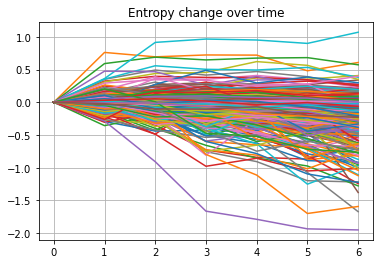

In [42]:
d.plot_column_change(full_nsb_entropy, title="Entropy change over time")

In [44]:
pres, futu = dist.make_shift_row_arrs(full_nsb_entropy)
changes = (futu - pres).flatten()
changes.sum() / len(changes)

-0.01972040377440254

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 1.113e+07
Date:                Tue, 21 Mar 2023   Prob (F-statistic):               0.00
Time:                        00:33:20   Log-Likelihood:                 48348.
No. Observations:               16772   AIC:                        -9.669e+04
Df Residuals:                   16770   BIC:                        -9.668e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0114      0.003     -3.470      0.0

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:title={'center':'plugin entropy vs. nsb estimate'}>)

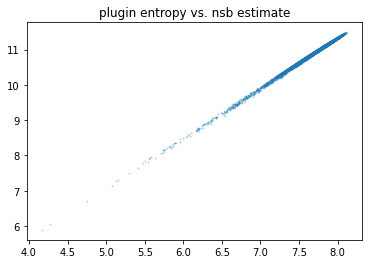

In [45]:
d.scatter(full_nsb_entropy.flatten(), full_plugin_entropy.flatten(), title="plugin entropy vs. nsb estimate", include_regression=True)

In [48]:
print(full_changes.shape)
full_nsb_entropy.shape

(6, 2396)


(7, 2396)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     108.0
Date:                Tue, 21 Mar 2023   Prob (F-statistic):           3.26e-25
Time:                        00:36:33   Log-Likelihood:                 24860.
No. Observations:               14376   AIC:                        -4.972e+04
Df Residuals:                   14374   BIC:                        -4.970e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6097      0.012     52.270      0.0

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:title={'center':'Context change vs. entropy'}>)

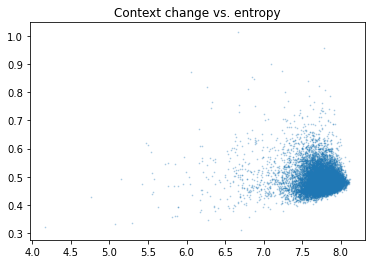

In [50]:
d.scatter(full_nsb_entropy[:-1,:].flatten(), full_changes.flatten(), title="Context change vs. entropy", include_regression=True)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     15.35
Date:                Tue, 21 Mar 2023   Prob (F-statistic):           9.49e-05
Time:                        00:37:17   Log-Likelihood:                 2192.7
No. Observations:                1090   AIC:                            -4381.
Df Residuals:                    1088   BIC:                            -4371.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1606      0.031     -5.222      0.0

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:title={'center':'Directional change vs. entropy'}>)

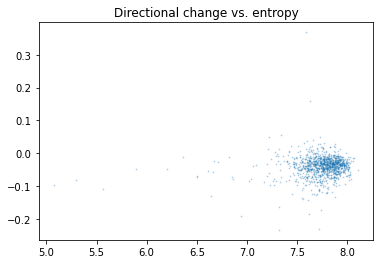

In [51]:
d.scatter(full_nsb_entropy[:-2,:].flatten(), full_changes_pres.flatten(), title="Directional change vs. entropy", skip=11, include_regression=True)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     19.46
Date:                Tue, 21 Mar 2023   Prob (F-statistic):           1.03e-05
Time:                        00:37:31   Log-Likelihood:                -264.04
No. Observations:               16772   AIC:                             532.1
Df Residuals:                   16770   BIC:                             547.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.7102      0.002   3332.070      0.0

C:\Users\vicvi\OneDrive\active\causality\speeches\display.py:86: RuntimeWarning: invalid value encountered in double_scalars
  val = relevant_ys.sum() / len(relevant_ys)


(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:title={'center':'Entropy vs. frequency'}>)

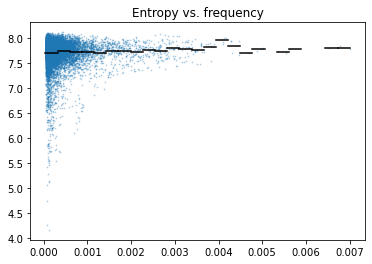

In [52]:
d.scatter(full_word_window_counts.flatten(), full_nsb_entropy.flatten(), title="Entropy vs. frequency", include_regression=True, average_bins=25)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     19.46
Date:                Tue, 21 Mar 2023   Prob (F-statistic):           1.03e-05
Time:                        00:37:37   Log-Likelihood:             1.0549e+05
No. Observations:               16772   AIC:                        -2.110e+05
Df Residuals:                   16770   BIC:                        -2.110e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0002      0.000     -1.531      0.1

C:\Users\vicvi\OneDrive\active\causality\speeches\display.py:86: RuntimeWarning: invalid value encountered in double_scalars
  val = relevant_ys.sum() / len(relevant_ys)


(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:title={'center':'Frequency vs. entropy'}>)

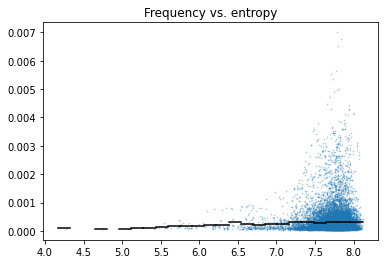

In [53]:
d.scatter(full_nsb_entropy.flatten(), full_word_window_counts.flatten(), title="Frequency vs. entropy", include_regression=True, average_bins=25)

In [ ]:
# num_windows = len(window_dict) // 2
# common_word_context_pcts_rolled =  cd.roll_unrolled_arr(common_word_context_pcts, num_windows, len(common_focal_word_dict)//2)
# word_window_entropies = cd.entropy_by_row(cd.nonzeroify(common_word_context_pcts_rolled))

## Look at the independent vs pairwise distributions, and how they differ

In [7]:
import time
t0 = time.time()
twind_cooccur_trip, ttotal_cooccur_trip = cd.genNWiseCooccurenceDistribs(speech_dict_nano, 3, tword_dict, frame=20, num_focal_words=500, num_context_words=1000, parallel=True, par_memo=False)
t1 = time.time()
twind_cooccur_pair, ttotal_cooccur_pair = cd.genNWiseCooccurenceDistribs(speech_dict_nano, 2, tword_dict, frame=20, num_focal_words=500, num_context_words=1000, parallel=True, par_memo=False)
t2 = time.time()

length of the extended speech list 14
199: 0/610
memotuple size 64
memoframe size 64
dictionary size 64
189: 0/364
memotuple size 64
memoframe size 64
dictionary size 64
192: 0/605
memotuple size 64
memoframe size 64
dictionary size 64
196: 0/860
memotuple size 64
memoframe size 64
dictionary size 64
191: 0/866
memotuple size 64
memoframe size 64
dictionary size 64
188: 0/408
memotuple size 64
memoframe size 64
dictionary size 64
200: 0/499
memotuple size 64
memoframe size 64
dictionary size 64
197: 0/891
memotuple size 64
memoframe size 64
dictionary size 64
198: 0/733
memotuple size 64
memoframe size 64
dictionary size 64
190: 0/498
memotuple size 64
memoframe size 64
dictionary size 64
195: 0/753
memotuple size 64
memoframe size 64
dictionary size 64
187: 0/370
memotuple size 64
memoframe size 64
dictionary size 64
194: 0/602
memotuple size 64
memoframe size 64
dictionary size 64
193: 0/594
memotuple size 64
memoframe size 64
dictionary size 64
length of the extended speech list 14


In [8]:
print(t1 - t0)
print(t2 - t1)

39.96431016921997
13.867145299911499


In [13]:
print(sys.getsizeof(ttotal_cooccur_trip))
ttotal_cooccur_trip_filtered = {tup: num for tup, num in ttotal_cooccur_trip.items() if num >= 2}
print(sys.getsizeof(ttotal_cooccur_trip_filtered))

671088736
167772256


In [8]:
import time
t0 = time.time()
wind_cooccur_trip, total_cooccur_trip = cd.genNWiseCooccurenceDistribs(speech_dict_small, 3, sword_dict, frame=20, num_focal_words=500, num_context_words=1000, parallel=True, par_memo=False, tuple_dict=ttotal_cooccur_trip)
t1 = time.time()
wind_cooccur_pair, total_cooccur_pair = cd.genNWiseCooccurenceDistribs(speech_dict_small, 2, sword_dict, frame=20, num_focal_words=500, num_context_words=1000, parallel=True, par_memo=False, tuple_dict=ttotal_cooccur_pair)
t2 = time.time()

length of the extended speech list 14
196: 0/44245
memotuple size 64
memoframe size 64
dictionary size 64
191: 0/41613
memotuple size 64
memoframe size 64
dictionary size 64
193: 0/29213
memotuple size 64
memoframe size 64
dictionary size 64
187: 0/18633
memotuple size 64
memoframe size 64
dictionary size 64
191: 1000/41613
memotuple size 2272
memoframe size 9312
dictionary size 20971608
194: 0/30238
memotuple size 64
memoframe size 64
dictionary size 64
193: 1000/29213
memotuple size 2272
memoframe size 9312
dictionary size 20971608
197: 0/43929
memotuple size 64
memoframe size 64
dictionary size 64
191: 2000/41613
memotuple size 2272
memoframe size 9312
dictionary size 20971608
196: 1000/44245
memotuple size 2272
memoframe size 9312
dictionary size 41943136
198: 0/35176
memotuple size 64
memoframe size 64
dictionary size 64
187: 1000/18633
memotuple size 2272
memoframe size 9312
dictionary size 20971608
188: 0/21533
memotuple size 64
memoframe size 64
dictionary size 64
191: 3000/416

197: 9000/43929
memotuple size 2272
memoframe size 36960
dictionary size 167772256
192: 20000/28997
memotuple size 2272
memoframe size 36960
dictionary size 167772256
196: 11000/44245
memotuple size 2272
memoframe size 36960
dictionary size 167772256
190: 18000/26556
memotuple size 2272
memoframe size 36960
dictionary size 167772256
193: 20000/29213
memotuple size 2272
memoframe size 36960
dictionary size 167772256
188: 17000/21533
memotuple size 2272
memoframe size 36960
dictionary size 167772256
194: 16000/30238
memotuple size 2272
memoframe size 36960
dictionary size 167772256
200: 6000/25629
memotuple size 2272
memoframe size 36960
dictionary size 167772256
191: 26000/41613
memotuple size 2272
memoframe size 36960
dictionary size 167772256
189: 16000/18775
memotuple size 2272
memoframe size 36960
dictionary size 167772256
195: 9000/38130
memotuple size 2272
memoframe size 36960
dictionary size 167772256
192: 21000/28997
memotuple size 2272
memoframe size 36960
dictionary size 16777

dictionary size 167772256
194: 26000/30238
memotuple size 2272
memoframe size 36960
dictionary size 335544408
198: 12000/35176
memotuple size 2272
memoframe size 36960
dictionary size 167772256
197: 16000/43929
memotuple size 2272
memoframe size 36960
dictionary size 335544408
199: 10000/29996
memotuple size 2272
memoframe size 36960
dictionary size 167772256
195: 16000/38130
memotuple size 2272
memoframe size 36960
dictionary size 167772256
194: 27000/30238
memotuple size 2272
memoframe size 36960
dictionary size 335544408
196: 19000/44245
memotuple size 2272
memoframe size 36960
dictionary size 335544408
200: 11000/25629
memotuple size 2272
memoframe size 36960
dictionary size 167772256
194: 28000/30238
memotuple size 2272
memoframe size 36960
dictionary size 335544408
195: 17000/38130
memotuple size 2272
memoframe size 36960
dictionary size 335544408
197: 17000/43929
memotuple size 2272
memoframe size 36960
dictionary size 335544408
198: 13000/35176
memotuple size 2272
memoframe siz

dictionary size 10485856
191: 12000/41613
memotuple size 1176190: 2000/26556

memotuple size 1176
memoframe size 9312memoframe size
dictionary size 5242968 
18520
dictionary size 10485856
197: 2000/43929
memotuple size 1176
memoframe size 18520
dictionary size 10485856
187: 9000/18633
memotuple size 1176
memoframe size 18520
dictionary size 10485856
196: 6000/44245
memotuple size 1176
memoframe size 18520
dictionary size 10485856
192: 3000/28997
memotuple size 1176
memoframe size 9312
dictionary size 10485856
188: 3000/21533
memotuple size 1176
memoframe size 9312
dictionary size 10485856
193: 9000/29213
memotuple size 1176
memoframe size 18520
dictionary size 10485856
189: 0/18775
memotuple size 64
memoframe size 64
dictionary size 64
190: 3000/26556
memotuple size 1176
memoframe size 9312191: 13000/41613
dictionary size 
10485856
memotuple size 1176
memoframe size 18520
dictionary size 10485856
194: 8000/30238
memotuple size 1176
memoframe size 18520
dictionary size 10485856
199: 0/2

memoframe size 36960
dictionary size 10485856
191: 34000/41613
memotuple size 1176
memoframe size 36960
dictionary size 10485856
190: 24000/26556
memotuple size 1176
memoframe size 36960
dictionary size 10485856
196: 15000/44245
memotuple size 1176
memoframe size 36960
dictionary size 10485856
192: 26000/28997
memotuple size 193: 26000/292131176

memoframe sizememotuple size  369601176

dictionary sizememoframe size  3696010485856

dictionary size 10485856
191: 35000/41613
memotuple size 1176
memoframe size 36960
dictionary size 10485856
194: 24000/30238
memotuple size 1176
memoframe size 36960
dictionary size 10485856
199: 7000/29996
memotuple size 1176
memoframe size 36960
dictionary size 10485856
190: 25000/26556
memotuple size 1176
memoframe size 36960
dictionary size 10485856
195: 11000/38130
memotuple size 1176
memoframe size 36960
dictionary size 10485856
198: 9000/35176
memotuple size 1176
memoframe size 36960
dictionary size 10485856
197: 12000/43929
memotuple size 1176
memofr

In [9]:
print(t1 - t0)
print(t2 - t1)

1218.8379213809967
210.75343227386475


In [10]:
import sys
print(sys.getsizeof(ttotal_cooccur_trip))
print(sys.getsizeof(ttotal_cooccur_pair))
print(sys.getsizeof(total_cooccur_trip))
print(sys.getsizeof(total_cooccur_pair))

671088736
20971608
671088736
20971608


In [12]:
len(total_cooccur_trip)

12427197

In [8]:
with open("objects/coOccurDict.pkl", "wb") as f:
    pkl.dump(coOccurDict, f)
    
with open("objects/coOccurDictPair.pkl", "wb") as f:
    pkl.dump(coOccurDictPair, f)

In [44]:
with open("objects/coOccurDict.pkl", "rb") as f:
    cooccur_dict = pkl.load(f)
    
with open("objects/coOccurDictPair.pkl", "rb") as f:
    cooccur_dict_pair = pkl.load(f)

In [35]:
cooccur_dict.keys()

dict_keys([191, 193, 199, 196, 194, 190, 195, 197, 189, 200, 192, 188, 198, 187])

In [43]:
distances, indepDistribs, trueDistribs = cd.calcDistribDiffsForEachWord(wind_cooccur_trip[200], wind_cooccur_pair[200])

d.print_word_quantity_vector(tword_dict, distances)

999, attorney: 0.0
665, leave: 0.0
666, hold: 0.0
667, leaders: 0.0
668, quite: 0.0
669, average: 0.0
670, share: 0.0
671, according: 0.0
672, established: 0.0
673, date: 0.0
674, treaty: 0.0
675, lost: 0.0
676, trust: 0.0
677, spent: 0.0
664, deficit: 0.0
678, seen: 0.0
680, training: 0.0
681, thousands: 0.0
682, hearing: 0.0
683, revenue: 0.0
684, big: 0.0
685, supreme: 0.0
686, five: 0.0
687, try: 0.0
688, though: 0.0
689, difficult: 0.0
690, fully: 0.0
691, whose: 0.0
692, included: 0.0
679, getting: 0.0
663, relations: 0.0
662, committees: 0.0
661, remember: 0.0
632, sent: 0.0
633, university: 0.0
634, higher: 0.0
635, create: 0.0
636, contract: 0.0
637, knows: 0.0
638, votes: 0.0
639, mind: 0.0
640, personal: 0.0
641, opposition: 0.0
642, bank: 0.0
643, vietnam: 0.0
644, recognize: 0.0
645, testimony: 0.0
646, legal: 0.0
647, changes: 0.0
648, domestic: 0.0
649, medical: 0.0
650, often: 0.0
651, prevent: 0.0
652, beginning: 0.0
653, single: 0.0
654, march: 0.0
655, permit: 0.0
65

In [13]:
distances, indepDistribs, trueDistribs = cd.calcDistribDiffsForEachWord(wind_cooccur_trip[200], wind_cooccur_pair[200])
d.print_word_quantity_vector(sword_dict, distances)

999, payments: 0.0
658, hour: 0.0
659, living: 0.0
660, pennsylvania: 0.0
661, university: 0.0
662, included: 0.0
663, quite: 0.0
664, actually: 0.0
665, operation: 0.0
666, ability: 0.0
667, name: 0.0
668, claims: 0.0
669, reasons: 0.0
670, tariff: 0.0
671, getting: 0.0
672, post: 0.0
673, carry: 0.0
674, seen: 0.0
675, spent: 0.0
676, domestic: 0.0
677, votes: 0.0
678, january: 0.0
679, lost: 0.0
680, corporation: 0.0
681, thousands: 0.0
682, john: 0.0
683, communities: 0.0
684, direct: 0.0
657, proposition: 0.0
685, doubt: 0.0
656, knows: 0.0
654, courts: 0.0
627, talk: 0.0
628, hand: 0.0
629, carolina: 0.0
630, try: 0.0
631, average: 0.0
632, date: 0.0
633, though: 0.0
634, sent: 0.0
635, employment: 0.0
636, hold: 0.0
637, difficult: 0.0
638, bank: 0.0
639, ways: 0.0
640, often: 0.0
641, talking: 0.0
642, agricultural: 0.0
643, understanding: 0.0
644, single: 0.0
645, cause: 0.0
646, nearly: 0.0
647, five: 0.0
648, welfare: 0.0
649, according: 0.0
650, share: 0.0
651, prevent: 0.0

(<Figure size 640x480 with 1 Axes>, <AxesSubplot:>)

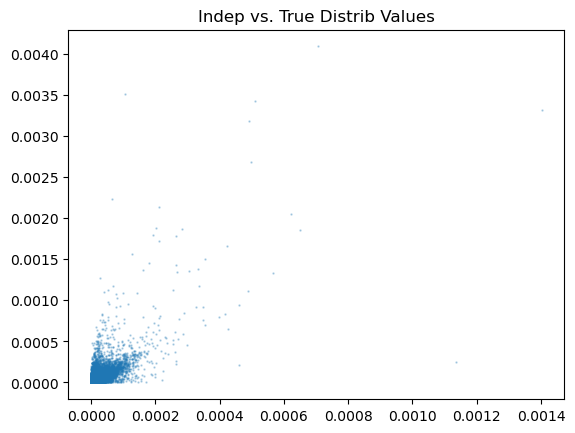

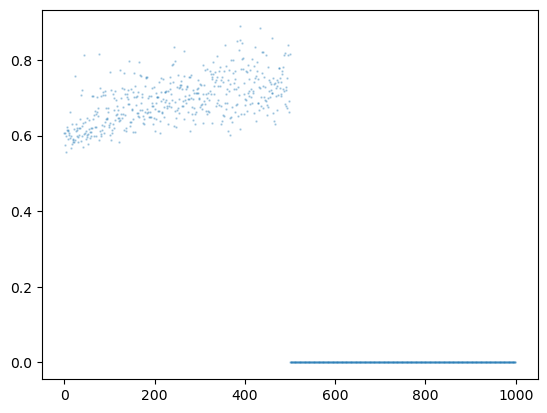

In [40]:
runningIndepDistrib = []
runningTrueDistrib = []

for indepDistrib, trueDistrib in zip(indepDistribs.values(), trueDistribs.values()):
    runningIndepDistrib += list(indepDistrib)
    runningTrueDistrib += list(trueDistrib)


d.scatter(runningIndepDistrib[::50], runningTrueDistrib[::50], title="Indep vs. True Distrib Values")
d.scatter(range(len(distances)), distances)

# Scraps

In [130]:
common_word_window_counts = cd.compile_list_of_frequencies(wordcount_window, common_focal_word_dict, word_dict, num_windows, normalize=True)

[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]]
[[ 50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67
   68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85
   86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103
  104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121
  122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139
  140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157
  158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175
  176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193
  194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211
  212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229
  230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247
  248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265
  266 267 268 269 270 271 272 273 274 275 276 277 278 279 280 281 282 283
  

In [128]:
word_window_entropies

array([[10.81537802, 10.64896758, 10.55831919, ..., 10.44097194,
        10.79731254, 10.79498871],
       [10.67039103, 10.68706696, 10.53761954, ..., 10.5734421 ,
        10.92350307, 10.76346611],
       [10.72195573, 10.52453385, 10.49921759, ..., 10.40276141,
        10.79859704, 10.69097841],
       [10.61004711, 10.53136616, 10.53691144, ..., 10.45677939,
        10.7777351 , 10.72802749],
       [10.69579565, 10.54712207, 10.57109042, ..., 10.4670678 ,
        10.76750662, 10.67762855],
       [10.62056262, 10.55546468, 10.40855122, ..., 10.4038934 ,
        10.74810915, 10.69547131]])

(7, 448)


C:\Users\vicvi\OneDrive\active\causality\speeches\display.py:83: RuntimeWarning: invalid value encountered in double_scalars
  val = relevant_ys.sum() / len(relevant_ys)


<AxesSubplot:>

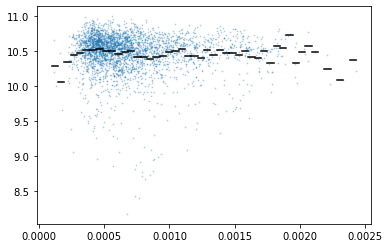

In [140]:
fig, ax = plt.subplots(1)


print(word_window_entropies.shape)
xs = common_word_window_counts.flatten()
ys = word_window_entropies.flatten()

ax.scatter(xs, ys, s=0.5, alpha=0.3)
d.plot_averages_on_scatter(ax, xs, ys, 50)

In [135]:
common_word_window_counts.shape

(7, 448)

<AxesSubplot:>

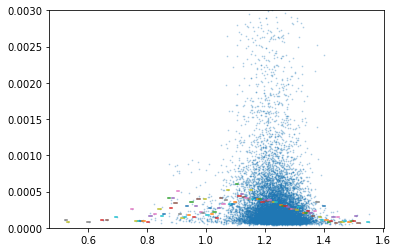

In [517]:
fig, ax = plt.subplots(1)
xs = word_window_counts_truncated.flatten()
ys = word_changes.flatten()


ax.scatter(ys, xs, s=0.5, alpha=0.3)
ax.set_ylim(bottom=0, top=0.003)
d.plot_averages_on_scatter(ax, ys, xs, 200)

<AxesSubplot:>

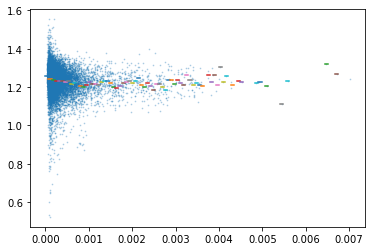

In [584]:
fig, ax = plt.subplots(1)
xs = word_window_counts_truncated.flatten()
ys = word_changes.flatten()


ax.scatter(xs, ys, s=0.5, alpha=0.3)
#ax.set_ylim(bottom=0.8, top=1.6)
#ax.set_xlim(left=0, right=0.003)
d.plot_averages_on_scatter(ax, xs, ys, 100)

In [406]:
context_dict

{'freedom': {'yty': array([0.81058714, 0.83044055, 0.84403345, 0.87850025, 0.78395921,
         0.79857223]),
  'ytp': array([0.943383  , 0.93513268, 0.88068393, 0.87806095, 0.83613196,
         0.79857223, 0.        ]),
  'yty_diff_makers': {396: [('+', 'freedom'),
    ('+', 'democracy'),
    ('-', 'religion'),
    ('+', 'one'),
    ('+', 'fighters'),
    ('-', 'rights'),
    ('-', 'nation'),
    ('-', 'soviet'),
    ('+', 'said'),
    ('-', 'religious')],
   397: [('-', 'fighters'),
    ('-', 'soviet'),
    ('+', 'act'),
    ('-', 'nicaragua'),
    ('-', 'freedom'),
    ('+', 'station'),
    ('+', 'space'),
    ('-', 'people'),
    ('+', 'world'),
    ('-', 'us')],
   398: [('+', 'freedom'),
    ('+', 'tax'),
    ('+', 'religious'),
    ('-', 'world'),
    ('+', 'farm'),
    ('+', 'every'),
    ('-', 'states'),
    ('-', 'soviet'),
    ('-', 'must'),
    ('-', 'space')],
   399: [('+', 'iraqi'),
    ('-', 'freedom'),
    ('+', 'iraq'),
    ('+', 'operation'),
    ('-', 'right'),
    

(3136, 30000)
(3136,)


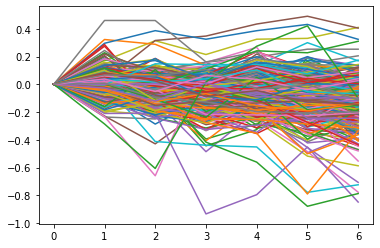

In [78]:
fig, ax = plt.subplots(1)
entropies = cd.entropy_by_row(cd.nonzeroify(common_word_context_pcts))

for i in range(len(entropies) // 7):
    rel_entropies = entropies[i * 7:i * 7 + 7] - entropies[i * 7]
    ax.plot(range(7), rel_entropies)

In [628]:
common_word_entropies = cd.entropy_by_row(cd.nonzeroify(common_word_context_pcts))

(3136, 30000)
(3136,)


In [685]:
print(common_word_context_pctvar.shape)
print(common_word_context_pcts.shape)

(3136, 30000)
(3136, 30000)


In [31]:
common_word_changes, cw_summands = cd.compile_list_of_changes(common_word_context_pcts, 448, 7, comp_func=dist.make_shift_row_arrs, distance_metric=dist.calc_taxicab)
common_word_changes_var_aware, cwva_summands = cd.compile_list_of_changes(common_word_context_pcts, 448, 7, comp_func=dist.make_shift_row_arrs, distance_metric=dist.calc_variation_aware_taxicab, context_vars=common_word_context_pctvar)

common_word_levels_pres, cwlp_summands = cd.compile_list_of_changes(common_word_context_pcts, 448, 7, comp_func=dist.make_past_present_arrs, distance_metric=dist.calc_taxicab)
futu, past = dist.make_shift_row_arrs(common_word_levels_pres)
common_word_changes_pres = futu - past

In [32]:
context_pcts_rolled = cd.roll_unrolled_arr(common_word_context_pcts, 7, 448)
context_pcts_rolled.shape

(7, 448, 30000)

In [39]:
wordcount_window_pct = wordcount_window / wordcount_window.sum(axis=1, keepdims=True)
print(wordcount_window_pct.shape)

(7, 50000)


In [53]:
context_overunder_rolled.shape

(7, 448, 30000)

In [698]:
cw_summands.shape

(6, 448, 30000)

<AxesSubplot:>

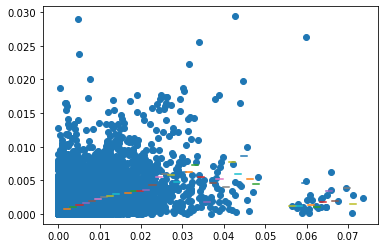

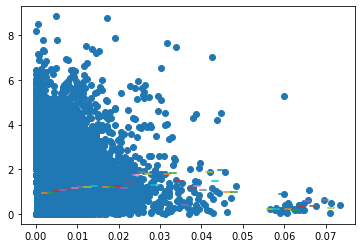

In [56]:
fig0, ax0 = plt.subplots(1)
xs = context_pcts_rolled[:6].flatten()[::]
ys = cw_summands.flatten()[::]
ax0.scatter(xs, ys)
d.plot_averages_on_scatter(ax0, xs, ys, 50)

fig1, ax1 = plt.subplots(1)
ys = cwva_summands.flatten()[::]
ax1.scatter(xs, ys)
d.plot_averages_on_scatter(ax1, xs, ys, 50)

C:\Users\vicvi\OneDrive\active\causality\speeches\display.py:83: RuntimeWarning: invalid value encountered in double_scalars
  val = relevant_ys.sum() / len(relevant_ys)


<AxesSubplot:>

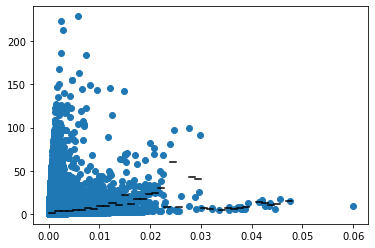

In [59]:
fig0, ax0 = plt.subplots(1)
xs = context_pcts_rolled.flatten()[::10]
ys = context_overunder_rolled.flatten()[::10]
ax0.scatter(xs, ys)
d.plot_averages_on_scatter(ax0, xs, ys, 50)

<AxesSubplot:>

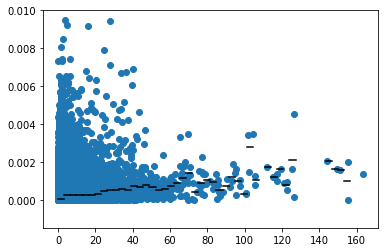

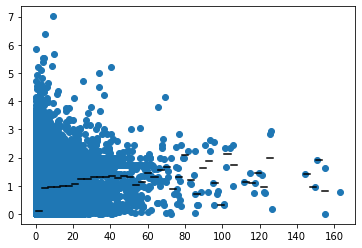

In [60]:
fig0, ax0 = plt.subplots(1)
xs = context_overunder_rolled[:6].flatten()[::20]
ys = cw_summands.flatten()[::20]
ax0.scatter(xs, ys)
ax0.set_ylim(top=0.01)
d.plot_averages_on_scatter(ax0, xs, ys, 50)

fig1, ax1 = plt.subplots(1)
ys = cwva_summands.flatten()[::20]
ax1.scatter(xs, ys)
d.plot_averages_on_scatter(ax1, xs, ys, 50)

In [697]:
common_word_window_counts = cd.compile_list_of_frequencies(wordcount_window, common_focal_word_dict, word_dict, 7, normalize=True)

[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]]
[[ 50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67
   68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85
   86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103
  104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121
  122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139
  140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157
  158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175
  176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193
  194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211
  212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229
  230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247
  248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265
  266 267 268 269 270 271 272 273 274 275 276 277 278 279 280 281 282 283
  

In [669]:
print(common_word_levels_pres[:,15:20])
print(common_word_changes[:,15:20])

[[1.12817822 1.02057225 0.9956167  1.02699135 1.08985311]
 [1.05357092 0.9952523  0.98069337 1.00171262 1.0419828 ]
 [1.04815098 0.97556644 0.92136422 0.94217996 1.01117091]
 [1.0156773  0.91247811 0.9498522  0.93691172 1.01320553]
 [0.97445935 0.94229392 0.91027905 0.91768717 0.94348682]
 [0.94831424 0.90729582 0.83605995 0.87778059 0.94618882]]
[[1.00917816 0.91010737 0.9180312  0.96671333 0.96766279]
 [0.97418045 0.9138202  0.87593631 0.94719749 0.93672898]
 [0.97604231 0.90541343 0.88122377 0.93654864 0.95916098]
 [0.98614146 0.92530364 0.90021247 0.93795791 0.92915971]
 [0.96125437 0.92000353 0.88414047 0.91694216 0.95203974]
 [0.94831424 0.90729582 0.83605995 0.87778059 0.94618882]]


common_word_entropies shape (3136,)
common_entropies_rolled_1 shape (7, 448)
(7, 448, 30000)
(7, 448)
common_entropies_rolled_2 shape (7, 448)
(6, 448)


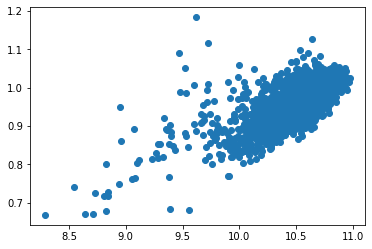

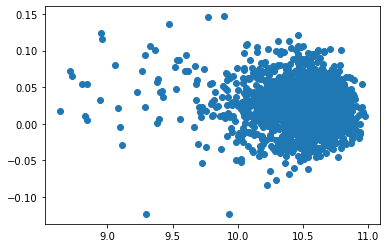

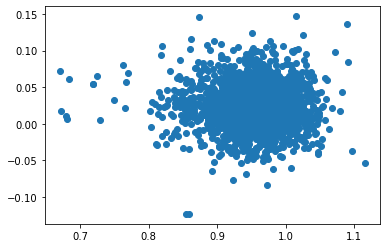

In [659]:
# hmm so it seems the directional evolution right now behaves very differently from the speed...
# of course, I'd need a lot more data to get conclusive results

print("common_word_entropies shape", common_word_entropies.shape)
common_entropies_rolled_1 = cd.roll_unrolled_arr(common_word_entropies, 7, 448)
print("common_entropies_rolled_1 shape", common_entropies_rolled_1.shape)
common_entropies_rolled_2 = cd.entropy_by_row(cd.nonzeroify(context_pcts_rolled))
print("common_entropies_rolled_2 shape", common_entropies_rolled_2.shape)
assert (common_entropies_rolled_1 == common_entropies_rolled_2).all()
common_entropies_rolled = common_entropies_rolled_1[:6,:]
print(common_entropies_rolled.shape)

fig0, ax0 = plt.subplots(1)
ax0.scatter(common_entropies_rolled.flatten(), common_word_changes.flatten())

fig1, ax1 = plt.subplots(1)
ax1.scatter(common_entropies_rolled[:5].flatten(), common_word_changes_pres.flatten())

fig2, ax2 = plt.subplots(1)
ax2.scatter(common_word_changes[:5].flatten(), common_word_changes_pres.flatten())

In [664]:
cd.do_regression(common_word_changes[:5].flatten(), common_word_changes_pres.flatten())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.011
Date:                Wed, 15 Mar 2023   Prob (F-statistic):              0.315
Time:                        14:57:59   Log-Likelihood:                 4770.4
No. Observations:                2240   AIC:                            -9537.
Df Residuals:                    2238   BIC:                            -9525.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0349      0.012      2.894      0.0

In [589]:
d.print_word_window_quantity_vector_flat(common_focal_word_dict, window_dict, entropies)

1450, 397, result, val: 10.974319786325992
1056, 402, including, val: 10.966642724827883
1052, 398, including, val: 10.951203360237708
2717, 397, found, val: 10.942126548609707
1050, 396, including, val: 10.936683282230922
2224, 401, addition, val: 10.930681819033847
2976, 397, often, val: 10.917061105213623
1449, 396, result, val: 10.916558487765254
2716, 396, found, val: 10.912135450396518
2979, 400, often, val: 10.908767448273544
1053, 399, including, val: 10.908703452623746
2975, 396, often, val: 10.908444710136164
2003, 397, become, val: 10.905019622048433
2722, 402, found, val: 10.904265762967537
3056, 400, based, val: 10.903780660719338
3033, 398, recently, val: 10.902256406047492
3122, 396, large, val: 10.898008693894116
1055, 401, including, val: 10.897454898817672
2718, 398, found, val: 10.896389079238995
2720, 400, found, val: 10.896133707427152
2981, 402, often, val: 10.895964888330155
2605, 397, recent, val: 10.895549819809963
2521, 397, called, val: 10.895518835840756
236

2989, 396, start, val: 10.458389968996299
2321, 400, employees, val: 10.457945285500514
1301, 402, week, val: 10.457808553874166
2541, 396, reduce, val: 10.457796650662145
1930, 401, trying, val: 10.457784120624142
2106, 402, months, val: 10.45760490621076
2500, 397, north, val: 10.457298179716807
598, 399, working, val: 10.457226260851867
2988, 402, consider, val: 10.457124976933546
2376, 399, offer, val: 10.457023123111117
590, 398, done, val: 10.456722120218913
519, 397, energy, val: 10.456616364266607
1383, 400, workers, val: 10.456523510280132
1265, 401, understand, val: 10.456262935928892
3119, 400, higher, val: 10.456234827905348
1878, 398, call, val: 10.456184659937378
614, 401, families, val: 10.455840434703239
1831, 400, deal, val: 10.455837813458935
2046, 398, union, val: 10.455520861527273
330, 397, point, val: 10.455510200982427
874, 402, ago, val: 10.45507123848631
1308, 402, might, val: 10.45477865815995
1266, 402, understand, val: 10.45440420887925
1013, 401, issues, va

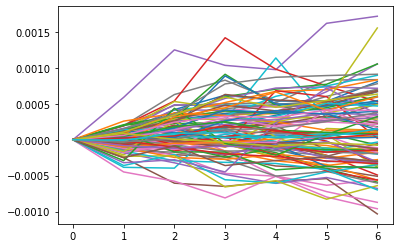

In [507]:
fig, ax = plt.subplots(1)
frequencies = wordcount_window[:,50:150] / wordcount_window.sum(axis=1, keepdims=True)
rel_frequencies = frequencies - frequencies[0:1,:]

for i in range(rel_frequencies.shape[1]):
    ax.plot(range(7), rel_frequencies[:,i])

In [397]:
unrolled_arr = np.array([["a1", "a2", "a3", "a4"], ["a5", "a6", "a7", "a8"], ["b1", "b2", "b3", "b4"], ["b5", "b6", "b7", "b8"], ["c1", "c2", "c3", "c4"], ["c5", "c6", "c7", "c8"]])
cd.roll_unrolled_arr(unrolled_arr, 2, 3)

array([[['a1', 'a2', 'a3', 'a4'],
        ['b1', 'b2', 'b3', 'b4'],
        ['c1', 'c2', 'c3', 'c4']],

       [['a5', 'a6', 'a7', 'a8'],
        ['b5', 'b6', 'b7', 'b8'],
        ['c5', 'c6', 'c7', 'c8']]], dtype='<U2')

In [310]:
[print(word_dict[ind]) for ind in range(100, 3000)]

school
rise
floor
war
policy
see
part
hope
put
economic
cannot
since
military
report
nations
yield
number
services
defense
record
process
debate
problem
rights
energy
long
small
future
jobs
home
funding
continue
spending
question
done
working
able
families
family
another
life
women
give
opportunity
increase
cost
look
district
urge
office
next
consent
funds
high
local
efforts
better
passed
foreign
leadership
whether
trade
rule
however
unanimous
place
general
best
conference
majority
amendments
things
economy
court
ago
minutes
still
needs
fiscal
dont
action
end
social
secretary
something
past
job
current
research
distinguished
plan
development
washington
interest
issues
problems
already
th
used
side
including
senators
benefits
agreement
simply
political
industry
control
information
never
reform
california
really
cut
area
leader
veterans
case
matter
little
force
within
section
history
international
days
strong
republican
body
costs
understand
second
less
citizens
rules
week
might
find
fri

quarter
entirely
fast
delaware
accurate
india
pentagon
destroy
bar
necessarily
investors
conservative
ending
newspaper
perform
implemented
port
pilot
contractors
freeze
showed
tool
willingness
defined
daughter
candidates
breast
convinced
ultimate
clarify
depend
search
objectives
fathers
deaths
attempts
art
versus
puerto
lie
conclude
encouraged
candidate
prisoners
rose
factors
waiver
modified
renewable
driving
acted
english
largely
grand
producing
catholic
extra
surely
scope
demonstration
biggest
season
relatively
nonprofit
sensitive
stimulus
rhetoric
abuses
dead
haiti
criminals
blue
initial
sitting
en
injury
presiding
reflects
criteria
directors
costly
tile
waters
guidance
charges
religion
succeed
trouble
broken
enemy
legislature
lakes
illness
unacceptable
disclosure
dole
ignore
adult
propose
blood
offset
elements
wisdom
twothirds
printing
perspective
cars
hardworking
worldwide
alcohol
solid
fuels
forms
selected
confirmation
trained
eliminating
signal
capable
allocation
electronic
drop

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [281]:
word_context_pcts[0:7]

array([[0.00340384, 0.01084367, 0.00325796, ..., 0.        , 0.        ,
        0.        ],
       [0.00459779, 0.01002083, 0.00436201, ..., 0.        , 0.        ,
        0.        ],
       [0.00422552, 0.00754558, 0.00410479, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.0033858 , 0.01047767, 0.00334004, ..., 0.        , 0.        ,
        0.        ],
       [0.0034824 , 0.00916422, 0.00482649, ..., 0.        , 0.        ,
        0.        ],
       [0.00403413, 0.00674942, 0.00387898, ..., 0.        , 0.        ,
        0.        ]])

In [333]:
distances, distance_summands, summand_signs = cd.time_series_differences_var_aware(word_context_pcts[0:7], word_context_pctvar[0:7])
over_under = cd.calcOverUnderRepresentation(wordcount_window, word_context_pcts[0:7], cutoff=0.0001)
# print(over_under)
core_indices = wc.get_highest_meeting_threshold(distance_summands, over_under[0:6], 2, top_n=10)

d.print_word_indices(word_dict, core_indices, window_dict=window_dict)

[[1.56313352       -inf       -inf ...       -inf       -inf       -inf]
 [0.15222377       -inf       -inf ...       -inf       -inf       -inf]
 [1.92735558       -inf       -inf ...       -inf       -inf       -inf]
 [1.59056475       -inf       -inf ...       -inf       -inf       -inf]
 [      -inf       -inf       -inf ...       -inf       -inf       -inf]
 [0.32508396       -inf       -inf ...       -inf       -inf       -inf]]
[[ 15  57 268 775  67  49 212 296  47 203]
 [325  50   9 279 165  44  35 890 168  83]
 [ 42  70  26   7 304 421 137 178  19 190]
 [630 129 385  65   7 501 132 371 181 237]
 [ 44 136 316 198 727 650 155  33  83 416]
 [388 179 338   8 101 102 404 237  51 113]]
396
['going', 'said', 'effort', 'chance', 'money', 'vote', 'really', 'thing', 'last', 'agreement']
397
['full', 'public', 'congress', 'pass', 'place', 'million', 'like', 'establish', 'conference', 'provide']
398
['tax', 'every', 'want', 'senator', 'taxes', 'nothing', 'families', 'fiscal', 'think', 'pl

In [370]:
context_dict = cd.gatherDataFromContextDistribs(mini_word_dict, word_context_pcts, word_dict, window_dict, distance_metric=cd.calc_taxicab)

(35, 50000)
0 7
7 14
14 21
21 28
28 35


In [251]:
arr1 = np.array([[1, 2, 3],[4, 5, 6]])
arr2 = np.array([[2, 1, 4],[3, 7, 6]])

arr1_var = np.array([[0.5, 0.1, 0.2],[0.3, 0.4, 0.1]])
arr2_var = np.array([[0.2, 0.2, 0.1],[0.4, 0.3, 0.2]])

arr = np.array([[0.5, 0.3, 0.6],[0.7, 0.1, 0.5],[0.8, 0.2, 0.6],[0.9, 0.3, 0.5]])
var_arr = np.array([[0.1, 0.2, 0.3],[0.5, 0.5, 0.4],[0.3, 0.1, 0.2],[0.2, 0.2, 0.3]])

In [217]:
word_context_pcts[0, 2]

0.0033758439609902473

In [334]:
wc.wordWeightArrayTopN(distance_summands[0:6], word_dict, window_dict, top_n=10, signs=summand_signs[0:6])

{396: [('+', 'going'),
  ('-', 'soviet'),
  ('+', 'chinese'),
  ('+', 'said'),
  ('+', 'effort'),
  ('-', 'due'),
  ('+', 'leadership'),
  ('+', 'democracy'),
  ('+', 'chance'),
  ('-', 'religious')],
 397: [('-', 'fighters'),
  ('-', 'nicaragua'),
  ('+', 'space'),
  ('+', 'station'),
  ('+', 'act'),
  ('-', 'aid'),
  ('-', 'contras'),
  ('+', 'entrances'),
  ('-', 'willing'),
  ('-', 'soviet')],
 398: [('-', 'space'),
  ('+', 'tax'),
  ('+', 'farm'),
  ('-', 'station'),
  ('+', 'freedom'),
  ('-', 'entrances'),
  ('+', 'founding'),
  ('-', 'soviet'),
  ('+', 'china'),
  ('-', 'clinic')],
 399: [('+', 'iraqi'),
  ('+', 'operation'),
  ('+', 'iraq'),
  ('+', 'enduring'),
  ('-', 'freedom'),
  ('-', 'tax'),
  ('+', 'remember'),
  ('-', 'want'),
  ('+', 'home'),
  ('+', 'sacrifice')],
 400: [('+', 'madam'),
  ('+', 'internet'),
  ('+', 'iran'),
  ('-', 'later'),
  ('-', 'new'),
  ('+', 'founding'),
  ('-', 'communism'),
  ('-', 'worship'),
  ('+', 'rather'),
  ('-', 'million')],
 401: [(

(0.4, 0.95)

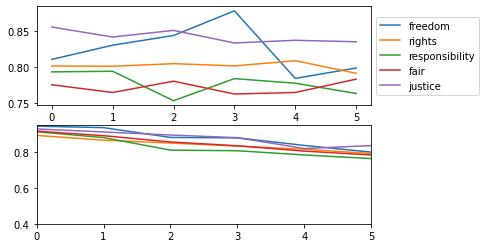

In [371]:
fig, axs = d.plotFromDict(context_dict, subkeys=["yty", "ytp"])

axs[0].legend(loc='center left', bbox_to_anchor=(1, 0.5))
axs[1].set_xlim(left=0, right=5)
axs[1].set_ylim(bottom=0.4, top=0.95)

(0.7, 0.85)

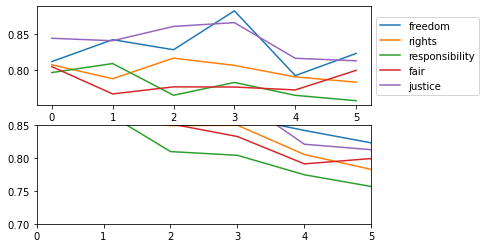

In [174]:
fig, axs = d.plotFromDict(context_dict, subkeys=["yty", "ytp"])

axs[0].legend(loc='center left', bbox_to_anchor=(1, 0.5))
axs[1].set_xlim(left=0, right=5)
axs[1].set_ylim(bottom=0.7, top=0.95)

In [99]:
context_dict

{'freedom': {'yty': array([0.2058324 , 0.24141232, 0.23764297, 0.25231431, 0.20328701,
         0.23426495]),
  'ytp': array([0.33731446, 0.32711739, 0.2985476 , 0.27849383, 0.24835956,
         0.23426495, 0.        ]),
  'yty_diff_makers': {396: ['flag',
    'democracy',
    'nicaragua',
    'soviet',
    'thle',
    'chinese',
    'glasnost',
    'arias',
    'contras',
    'prayer'],
   397: ['fighters',
    'nicaragua',
    'space',
    'station',
    'act',
    'contras',
    'sandinistas',
    'nicaraguan',
    'entrances',
    'clinic'],
   398: ['space',
    'station',
    'farm',
    'soviet',
    'religious',
    'farmers',
    'internet',
    'tax',
    'clinic',
    'baltic'],
   399: ['iraqi',
    'operation',
    'iraq',
    'enduring',
    'china',
    'farm',
    'afghanistan',
    'terrorism',
    'religious',
    'tax'],
   400: ['farm',
    'madam',
    'thats',
    'iran',
    'press',
    'broadcaster',
    'terrorism',
    'dont',
    'iranian',
    'saddam'],
  

In [48]:
import sparse
from scipy.sparse import coo_array
from scipy.sparse import csr_array

arr0 = np.zeros((10000, 10000))
arr1 = np.zeros((10000, 10000))

coords2d0 = (np.array([2100, 2200, 2300, 2400, 2500, 2600, 2700, 2800, 2900, 1000, 1100, 1200, 1300, 1400]), 
             np.array([9000, 8500, 8000, 7500, 7000, 6500, 6000, 5500, 5000, 4500, 4000, 3500, 3000, 2500]))

coords2d1 = (np.array([2100, 2200, 2300, 2400, 2500, 2600, 2700, 3100, 3200, 3300, 3400, 3500, 3600, 3700]), 
             np.array([9000, 8500, 8000, 7500, 7000, 6500, 6000, 4000, 3500, 3000, 2500, 2000, 1500, 1000]))

arr0[coords2d0] = range(1, len(coords2d0[0]) + 1)
arr1[coords2d1] = range(1, len(coords2d1[0]) + 1)

sparse_coo0 = sparse.COO(arr0)
scipy_coo0 = coo_array(arr0)
scipy_csr0 = csr_array(scipy_coo0)

sparse_coo1 = sparse.COO(arr1)
scipy_coo1 = coo_array(arr1)
scipy_csr1 = csr_array(scipy_coo1)

print("arr times")
%timeit arr0 + arr1
%timeit arr0 * arr1
%timeit arr0[2500:7500, 1000:3000]
%timeit arr0[2500:7500, 1000:3000] + arr1[2500:7500, 1000:3000]

print("sparse_coo times")
%timeit sparse_coo0 + sparse_coo1
%timeit sparse_coo0 * sparse_coo1
%timeit sparse_coo0[2500:7500, 1000:3000]
%timeit sparse_coo0[2500:7500, 1000:3000] + sparse_coo1[2500:7500, 1000:3000]
# %timeit sparse_coo0[3300, 2500] = 3

print("scipy_coo times")
%timeit scipy_coo0 + scipy_coo1
%timeit scipy_coo0 * scipy_coo1

print("scipy_csr times")
%timeit scipy_csr0 + scipy_csr1
%timeit scipy_csr0 * scipy_csr1
%timeit scipy_csr0[2500:7500, 1000:3000]
%timeit scipy_csr0[2500:7500, 1000:3000] + scipy_csr1[2500:7500, 1000:3000]
%timeit scipy_csr0[3300, 2500] = 3

arr times
104 ms ± 1.06 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
104 ms ± 21.8 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
222 ns ± 0.97 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)
13.6 ms ± 6.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
sparse_coo times
441 µs ± 4.67 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
273 µs ± 1.85 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
60.4 µs ± 637 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
492 µs ± 4.53 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
scipy_coo times
242 µs ± 1.5 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
266 µs ± 3.9 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
scipy_csr times
122 µs ± 398 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
145 µs ± 509 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
61.6 µs ± 463 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each

/home/victorvikram/anaconda3/envs/speech/lib/python3.9/site-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


35.4 µs ± 433 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [38]:
dist = [0.05]*10 + [0.01]*40 + [0.002]*50

lst1 = np.random.choice(range(100), size=(2000,), p=dist)
lst2 = np.random.choice(range(100), size=(2000,), p=dist)

kTuples1 = kt.findKTuplesFrameLst(3, lst1, 20, dct=False)
kTuples2 = kt.findKTuplesFrameLst(3, lst2, 20, dct=False)

In [39]:
def myfuncdct():
    dct1 = {}
    dct2 = {}
    cd.incrementAll(dct1, kTuples1)
    cd.incrementAll(dct2, kTuples2)
    
    cd.incrementWithDict(dct1, dct2)
    
def myfuncarr():
    coordArr1 = np.transpose(kTuples1)
    coords1, data1 = np.unique(coordArr1, axis=1, return_counts=True)
    coordArr2 = np.transpose(kTuples2)
    coords2, data2 = np.unique(coordArr2, axis=1, return_counts=True)
    coo1 = sparse.COO(coords=coords1, data=data1, shape=(100, 100, 100))
    coo2 = sparse.COO(coords=coords2, data=data2, shape=(100, 100, 100))
    
    coo = coo1 + coo2

In [40]:
%timeit myfuncdct()
%timeit myfuncarr()

311 ms ± 2.33 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
960 ms ± 4.22 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [66]:
cd.basicTestSequential()
cd.basicTest()

{'a': 'added!', 'b': 'added!', 0: 'worker0'}
{'a': 'added!', 'b': 'added!', 0: 'worker0'}
{'a': 'added!', 'b': 'added!', 0: 'worker0', 'c': 'added!', 'd': 'added!'}
